In [289]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

In [290]:
# Configuration and utility functions
import os
import warnings
from pathlib import Path

# Suppress openpyxl warnings for cleaner output
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# Define base paths
BASE_DIR = Path.cwd()
DATA_2025_DIR = BASE_DIR / "data_2025"
GRAPHS_DIR = BASE_DIR / "graphs"

# Create graphs directory if it doesn't exist
GRAPHS_DIR.mkdir(exist_ok=True)

# Utility function to check file existence
def check_file_exists(filepath):
    if not Path(filepath).exists():
        raise FileNotFoundError(f"Required file not found: {filepath}")
    return filepath

print(f"Base directory: {BASE_DIR}")
print(f"Data directory exists: {DATA_2025_DIR.exists()}")
print(f"Graphs directory exists: {GRAPHS_DIR.exists()}")

Base directory: /Users/krystof.volf/Desktop/projects/KRAJE_RUD
Data directory exists: True
Graphs directory exists: True


In [291]:
#### load 2025data from statnipokladna
df1=pd.read_excel("data_2025/2025_1.xlsx",header=5,sheet_name="MON1TOR EXPORT")
df2=pd.read_excel("data_2025/2025_2.xlsx",header=5,sheet_name="MON1TOR EXPORT")
df3=pd.read_excel("data_2025/2025_3.xlsx",header=5,sheet_name="MON1TOR EXPORT")
df25=pd.concat([df1, df2,df3], ignore_index=True)
# ### test: Can I infer Sesk and Podsesk kódy from Položka kód? - yes
# podsesk=[int(str(pol)[0:3]) for pol in df25.loc[:,"Položka (kód)"]]
# sesk=[int(str(pol)[0:2]) for pol in df25.loc[:,"Položka (kód)"]]
# test1=(df25.loc[:,"Podseskupení položek (kód)"]-podsesk).std()==0
# test2=(df25.loc[:,"Seskupení položek (kód) "]-sesk).std()==0
# if (test1==False) | (test2==False) : raise (ValueError)
a=df25['2025 (k 28.02.)'].sum()
### make číselníky:
## podsesk25
uniq=df25.loc[:,["Podseskupení položek (kód)","Podseskupení položek (název)"]].drop_duplicates()
podsesk25=dict(zip(uniq["Podseskupení položek (kód)"],uniq["Podseskupení položek (název)"]))
## sesk25
uniq=df25.loc[:,["Seskupení položek (kód) ","Seskupení položek (název)"]].drop_duplicates()
sesk25=dict(zip(uniq["Seskupení položek (kód) "],uniq["Seskupení položek (název)"]))
## pol25
uniq=df25.loc[:,["Položka (kód)","Položka (název)"]].drop_duplicates()
pol25=dict(zip(uniq["Položka (kód)"],uniq["Položka (název)"]))
## para25
uniq=df25.loc[:,["Paragraf (kód)","Paragraf (název)"]].drop_duplicates()
para25=dict(zip(uniq["Paragraf (kód)"],uniq["Paragraf (název)"]))
## small test - každý kód má právě jeden název
test3=len(df25.loc[:,["Podseskupení položek (kód)","Podseskupení položek (název)"]].drop_duplicates())-\
len(df25.loc[:,["Podseskupení položek (kód)"]].drop_duplicates())==0
test4=len(df25.loc[:,["Seskupení položek (kód) ","Seskupení položek (název)"]].drop_duplicates())-\
len(df25.loc[:,["Seskupení položek (kód) "]].drop_duplicates())==0
test5=len(df25.loc[:,["Položka (kód)","Položka (název)"]].drop_duplicates())-\
len(df25.loc[:,["Položka (kód)"]].drop_duplicates())==0
test6=len(df25.loc[:,["Paragraf (kód)","Paragraf (název)"]].drop_duplicates())-\
len(df25.loc[:,["Paragraf (kód)"]].drop_duplicates())==0
if (test3==False) | (test4==False) | (test5==False) | (test6==False) : raise (ValueError)
### rename & keep specific columns
df25cols={"Organizace (název)":"Kraj","Třída položek (název)":"Trida","Seskupení položek (kód) ":"Sesk","Podseskupení položek (kód)":"Podsesk",
"Položka (kód)":"Pol","Paragraf (kód)":"Para",
'2025 (k 28.02.)':"2025"} # chybi oproti SR "Zdroj (kód)":"Zdroj","Kapitola (název)":"Kapitola",
df25=df25.loc[:,df25cols.keys()].copy()
df25.columns=df25cols.values()
b=df25["2025"].sum()
if a!=b: raise (ValueError) #sum of výdaje holds

In [292]:
df25

,Kraj,Trida,Sesk,Podsesk,Pol,Para,2025
0,Olomoucký kraj,Daňové příjmy,11,111,1111,0,1.400000e+09
1,Olomoucký kraj,Daňové příjmy,11,111,1112,0,1.000000e+08
2,Olomoucký kraj,Daňové příjmy,11,111,1113,0,2.000000e+08
3,Olomoucký kraj,Daňové příjmy,11,112,1121,0,2.000000e+09
4,Olomoucký kraj,Daňové příjmy,12,121,1211,0,4.000000e+09
...,...,...,...,...,...,...,...
11004,Pardubický kraj,Kapitálové výdaje,64,642,6422,4357,0.000000e+00
11005,Pardubický kraj,Kapitálové výdaje,69,690,6901,3599,5.000000e+06
11006,Pardubický kraj,Kapitálové výdaje,69,690,6901,3639,1.070000e+08
11007,Pardubický kraj,Kapitálové výdaje,69,690,6901,3713,0.000000e+00


In [293]:
#### load 2014-2023data from statnipokladna 
df1=pd.read_excel("data_2025/2015-2024_1.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df2=pd.read_excel("data_2025/2015-2024_2.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df3=pd.read_excel("data_2025/2015-2024_3.xlsx",header=6,sheet_name="MON1TOR EXPORT")
df15=pd.concat([df1, df2,df3], ignore_index=True)

# ### test: Can I infer Sesk and Podsesk kódy from Položka kód? - yes
# podsesk=[int(str(pol)[0:3]) for pol in df15.loc[:,"Položka (kód)"]]
# sesk=[int(str(pol)[0:2]) for pol in df15.loc[:,"Položka (kód)"]]
# test1=(df15.loc[:,"Podseskupení položek (kód)"]-podsesk).std()==0
# test2=(df15.loc[:,"Seskupení položek (kód) "]-sesk).std()==0
# if (test1==False) | (test2==False) : raise (ValueError) 
a=df15['2024'].sum()


### make číselníky: jen jako addition k číselníkům 2024, dropujeme duplicitní názvy a necháváme ten poslední (2023)
## podsesk24
uniq=df15.loc[:,["Podseskupení položek (kód)","Podseskupení položek (název)"]].drop_duplicates(subset="Podseskupení položek (kód)",keep="last")
podsesk15=dict(zip(uniq["Podseskupení položek (kód)"],uniq["Podseskupení položek (název)"]))
## sesk24
uniq=df15.loc[:,["Seskupení položek (kód) ","Seskupení položek (název)"]].drop_duplicates(subset="Seskupení položek (kód) ",keep="last")
sesk15=dict(zip(uniq["Seskupení položek (kód) "],uniq["Seskupení položek (název)"]))
## pol24
uniq=df15.loc[:,["Položka (kód)","Položka (název)"]].drop_duplicates(subset="Položka (kód)",keep="last")
pol15=dict(zip(uniq["Položka (kód)"],uniq["Položka (název)"]))
## para24
uniq=df15.loc[:,["Paragraf (kód)","Paragraf (název)"]].drop_duplicates(subset="Paragraf (kód)",keep="last")
para15=dict(zip(uniq["Paragraf (kód)"],uniq["Paragraf (název)"]))


### rename & keep specific columns
df15cols={"Organizace (název)":"Kraj","Třída položek (název)":"Trida","Seskupení položek (kód) ":"Sesk","Podseskupení položek (kód)":"Podsesk",
        "Položka (kód)":"Pol","Paragraf (kód)":"Para",
         } # chybi oproti SR "Zdroj (kód)":"Zdroj","Kapitola (název)":"Kapitola",
years_list=['2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023','2024']
df15=df15.loc[:,list(df15cols.keys())+years_list].copy()
df15.columns=list(df15cols.values())+years_list

### merge together duplicate Pol & Para (I checked that sums hold)
df15=df15.groupby(["Kraj","Trida","Sesk","Podsesk","Pol","Para"]).sum().reset_index()
b=df15["2024"].sum()
if int(a)!=int(b): raise (ValueError) #sum of výdaje holds

In [294]:
### merge the two data 
df=df15.merge(df25,how="outer",validate="one_to_one").copy()

### replace NANs with 0
years=years_list+["2025"]
for year in years:
    df.loc[:,year]=df.loc[:,year].fillna(0)
    
### small check
c=df["2024"].sum()
if int(a)!=int(c): raise (ValueError) #sum of výdaje holds



In [295]:
### change in V2: Oddělat transfery na výdajové straně pro roky 2022-2024
df_vse=df.copy()

# Načtení VKT dat pro roky 2022-2024 z jednoho souboru
df_vkt_2224=pd.read_excel("data_2025/2022-24_VKT.xlsx",header=5,sheet_name="MON1TOR EXPORT")

# Kontrola sum pro všechny roky
a_2022=df_vkt_2224['2022'].sum()
a_2023=df_vkt_2224['2023'].sum()
a_2024=df_vkt_2224['2024'].sum()

# Přejmenování a výběr sloupců
df_vkt_2224_cols={"Organizace (název)":"Kraj","Třída položek výdaje  (název)":"Trida","Seskupení položek (kód) ":"Sesk",
                  "Podseskupení položek (kód)":"Podsesk","Položka výdaje (kód)":"Pol","Paragraf výdaje (kód)":"Para",
                  '2022':"2022 VKT", '2023':"2023 VKT", '2024':"2024 VKT"}
df_vkt_2224=df_vkt_2224.loc[:,df_vkt_2224_cols.keys()].copy()
df_vkt_2224.columns=df_vkt_2224_cols.values() 

# Kontrola sum
b_2022=df_vkt_2224["2022 VKT"].sum()
b_2023=df_vkt_2224["2023 VKT"].sum()
b_2024=df_vkt_2224["2024 VKT"].sum()
if a_2022!=b_2022 or a_2023!=b_2023 or a_2024!=b_2024: 
    raise ValueError(f"Sumy se neshodují: 2022: {a_2022} vs {b_2022}, 2023: {a_2023} vs {b_2023}, 2024: {a_2024} vs {b_2024}")

# Agregace dat
df_vkt_2224=df_vkt_2224.groupby(['Kraj', 'Trida', 'Sesk', 'Podsesk', 'Pol', 'Para']).sum().reset_index()

# Merge s hlavním datasetem a odečtení VKT pro všechny roky
df_old=df.copy()
df=df.merge(df_vkt_2224,on=['Kraj', 'Trida', 'Sesk', 'Podsesk', 'Pol', 'Para'],how="left",validate="one_to_one")

# Odečtení VKT pro každý rok
for year in ['2022', '2023', '2024']:
    df.loc[:,f'{year} VKT'] = df.loc[:,f'{year} VKT'].fillna(0)
    df.loc[:,year]=df.loc[:,year]-df.loc[:,f'{year} VKT']

In [296]:
### check: Podíl VKT na přijatých transferech pro všechny roky
df_check=pd.DataFrame({})
for year in ['2022', '2023', '2024']:
    for kraj in df.Kraj.unique():
        cond=(df.Sesk==41)|(df.Sesk==42)
        pkt=df.loc[(df.Kraj==kraj)&(cond),year].sum()
        vkt=df_vkt_2224.loc[df_vkt_2224.Kraj==kraj,f"{year} VKT"].sum()
        if pkt != 0:
            df_check.loc[f"ShareVKT_{year}",kraj]=vkt/pkt
        else:
            df_check.loc[f"ShareVKT_{year}",kraj]=0
df_check

,Hlavní město Praha,Jihomoravský kraj,Jihočeský kraj,Karlovarský kraj,Kraj Vysočina,Královéhradecký kraj,Liberecký kraj,Moravskoslezský kraj,Olomoucký kraj,Pardubický kraj,Plzeňský kraj,Středočeský kraj,Zlínský kraj,Ústecký kraj
ShareVKT_2022,0.997319,1.101656,0.980965,1.001456,0.968481,1.070353,0.914497,1.008094,0.971315,0.986643,0.982966,0.989517,0.966663,0.992958
ShareVKT_2023,0.888126,0.981227,0.989362,1.055354,0.977342,0.965937,0.975963,0.976574,0.954775,0.979158,0.962663,0.991462,0.976515,0.964112
ShareVKT_2024,0.873967,0.988025,0.997249,0.907160,0.974466,1.001013,0.956305,0.991396,0.960763,0.983316,0.987162,0.989256,0.988007,0.980249


In [297]:
### Oddělat transfery na příjmové straně
df_all=df.copy()
cond=(df.Sesk!=41)&(df.Sesk!=42)
df=df.loc[cond,:]

In [298]:
### filter out příjmy a výdaje
cond_vydaje=[t.endswith("výdaje") for t in df.Trida]
cond_prijmy=[not t.endswith("výdaje") for t in df.Trida]
df_v=df.loc[cond_vydaje,:]
df_p=df.loc[cond_prijmy,:]

In [299]:
### merge ciselniky (základ je rok 2025, kdyžtak to můžu i obrátit)
## seskupení
a=pd.DataFrame([sesk15],index=[2015]).T
b=pd.DataFrame([sesk25],index=[2025]).T
ab=a.merge(b,left_index=True,right_index=True,how="outer")
#nový číselník
cond=ab.loc[:,2025].isna()
ab.loc[cond,2025]=ab.loc[cond,2015].copy()
sesk_cis=dict(ab.loc[:,2025])

## podseskupení
a=pd.DataFrame([podsesk15],index=[2015]).T
b=pd.DataFrame([podsesk25],index=[2025]).T
ab=a.merge(b,left_index=True,right_index=True,how="outer")
#nový číselník
cond=ab.loc[:,2025].isna()
ab.loc[cond,2025]=ab.loc[cond,2015].copy()
podsesk_cis=dict(ab.loc[:,2025])

## položky
a=pd.DataFrame([pol15],index=[2015]).T
b=pd.DataFrame([pol25],index=[2025]).T
ab=a.merge(b,left_index=True,right_index=True,how="outer")
#nový číselník
cond=ab.loc[:,2025].isna()
ab.loc[cond,2025]=ab.loc[cond,2015].copy()
pol_cis=dict(ab.loc[:,2025])

## paragrafy
a=pd.DataFrame([para15],index=[2015]).T
b=pd.DataFrame([para25],index=[2025]).T
ab=a.merge(b,left_index=True,right_index=True,how="outer")
#nový číselník
cond=ab.loc[:,2025].isna()
ab.loc[cond,2025]=ab.loc[cond,2015].copy()
para_cis=dict(ab.loc[:,2025])

In [300]:
ab

,2015,2025
0,Pro příjmy (technický záznam),Pro příjmy (technický záznam)
1012,Podnikání a restrukturalizace v zemědělství a ...,Podnikání a restrukturalizace v zemědělství a ...
1014,"Ozdravování hospodářských zvířat, polních a sp...","Ozdravování hospodářských zvířat, polních a sp..."
1019,Ostatní zemědělská a potravinářská činnost a r...,Ostatní zemědělská a potravinářská činnost a r...
1029,Ostatní záležitosti regulace zemědělské produk...,Ostatní záležitosti regulace zemědělské produk...
...,...,...
6320,Pojištění funkčně nespecifikované,Pojištění funkčně nespecifikované
6330,Převody vlastním fondům v rozpočtech územní úr...,Převody vlastním fondům v rozpočtech územní úr...
6399,Ostatní finanční operace,Ostatní finanční operace
6402,Finanční vypořádání minulých let,Finanční vypořádání


In [301]:
df.head()

,Kraj,Trida,Sesk,Podsesk,Pol,Para,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2022 VKT,2023 VKT,2024 VKT
0,Hlavní město Praha,Běžné výdaje,50,501,5011,2141,0.0,0.0,0.0,0.0,0.0,0.00,0.0,705.15,1522.03,0.0,0.0,13397.77,28918.51,0.0
1,Hlavní město Praha,Běžné výdaje,50,501,5011,2169,0.0,0.0,0.0,183804.0,8822274.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
2,Hlavní město Praha,Běžné výdaje,50,501,5011,2212,3774149.0,3563855.0,3466686.0,4246960.0,2409107.0,3892792.16,4010846.0,4188436.00,4746763.00,4786098.0,0.0,0.00,0.00,0.0
3,Hlavní město Praha,Běžné výdaje,50,501,5011,2291,0.0,0.0,0.0,0.0,0.0,122400.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
4,Hlavní město Praha,Běžné výdaje,50,501,5011,2299,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,2149357.0,0.0,0.00,0.00,0.0


### 1.1. Load data from ČSÚ

In [302]:
kraje=df.Kraj.unique()
kraje=np.array(['Hlavní město Praha', 'Středočeský kraj', 'Jihočeský kraj', #z RUD filu, podle NUTS3
       'Plzeňský kraj', 'Karlovarský kraj', 'Ústecký kraj',
       'Liberecký kraj', 'Královéhradecký kraj', 'Pardubický kraj',
       'Kraj Vysočina', 'Jihomoravský kraj', 'Olomoucký kraj',
       'Zlínský kraj', 'Moravskoslezský kraj'])
cond=[kraj not in ["Hlavní město Praha"] for kraj in kraje] #Removing Praha
kraje=kraje[cond]
yearsint=[int(year) for year in years]
obyv=pd.DataFrame({})
hdp=pd.DataFrame({})
for kraj in kraje:
    if kraj[0:3]=="Jih":
        a=kraj[0:5]
    else:
        a=kraj[0:3]
    if a=="Mor":
        df_aux=pd.read_excel(f"data_2025/{a}.xlsx",header=1,index_col=0)
    else:
        df_aux=pd.read_excel(f"data_2025/{a}.xlsx",header=2,index_col=0)
    #rename
    cond1=[i.startswith("Střední stav obyvatel") for i in df_aux.index.astype("str")]
    cond2=[i.startswith("Hrubý domácí produkt") for i in df_aux.index.astype("str")]
    df_aux=df_aux.rename(index={df_aux.index[cond1][0]:"Počet obyvatel",df_aux.index[cond2][0]:"HDP"},columns=dict(zip(yearsint,years)))
    #check
    if np.array(cond1).sum()!=1 or np.array(cond2).sum()!=1: raise (ValueError)
    obyv.loc[kraj,years[:-2]]=df_aux.loc["Počet obyvatel",years[:-2]]
    hdp.loc[kraj,years[:-2]]=df_aux.loc["HDP",years[:-2]]
#nový ordering krajů
year="2024"
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df1=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df1=df1.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
kraje=list(pd.DataFrame(df1).sort_values(by=0,ascending=False).index)

In [303]:
df_p

,Kraj,Trida,Sesk,Podsesk,Pol,Para,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2022 VKT,2023 VKT,2024 VKT
4286,Hlavní město Praha,Daňové příjmy,11,111,1111,0,9.185903e+09,1.087487e+10,1.238080e+10,1.400233e+10,1.585322e+10,1.509500e+10,1.130695e+10,1.184224e+10,1.429745e+10,1.590408e+10,0.0,0.0,0.0,0.0
4287,Hlavní město Praha,Daňové příjmy,11,111,1112,0,1.049079e+09,1.280198e+09,3.280855e+08,3.205381e+08,4.265451e+08,2.402434e+08,7.269293e+08,1.062101e+09,1.173585e+09,1.153357e+09,0.0,0.0,0.0,0.0
4288,Hlavní město Praha,Daňové příjmy,11,111,1113,0,1.099641e+09,1.126494e+09,1.128331e+09,1.266098e+09,1.439040e+09,1.466469e+09,1.884876e+09,2.361189e+09,3.384794e+09,3.585355e+09,0.0,0.0,0.0,0.0
4289,Hlavní město Praha,Daňové příjmy,11,112,1121,0,1.021026e+10,1.164215e+10,1.201798e+10,1.162384e+10,1.340180e+10,1.097887e+10,1.590471e+10,1.783835e+10,2.458453e+10,2.222360e+10,0.0,0.0,0.0,0.0
4290,Hlavní město Praha,Daňové příjmy,11,112,1122,0,1.667376e+09,1.220216e+09,1.122574e+09,1.683562e+09,1.478913e+09,1.203274e+09,1.095086e+09,1.091344e+09,1.938650e+09,2.772112e+09,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32157,Ústecký kraj,Nedaňové příjmy,24,241,2412,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+06,0.000000e+00,0.0,0.0,0.0,0.0
32158,Ústecký kraj,Nedaňové příjmy,24,242,2420,0,0.000000e+00,4.600000e+06,0.000000e+00,6.200000e+05,4.253540e+06,0.000000e+00,0.000000e+00,3.462881e+07,1.383741e+07,1.000000e+06,0.0,0.0,0.0,0.0
32159,Ústecký kraj,Nedaňové příjmy,24,244,2441,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.170230e+04,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
32160,Ústecký kraj,Nedaňové příjmy,24,245,2451,0,0.000000e+00,0.000000e+00,1.665000e+06,0.000000e+00,1.500000e+06,6.000000e+06,0.000000e+00,5.100000e+05,5.005384e+06,2.190000e+07,0.0,0.0,0.0,0.0


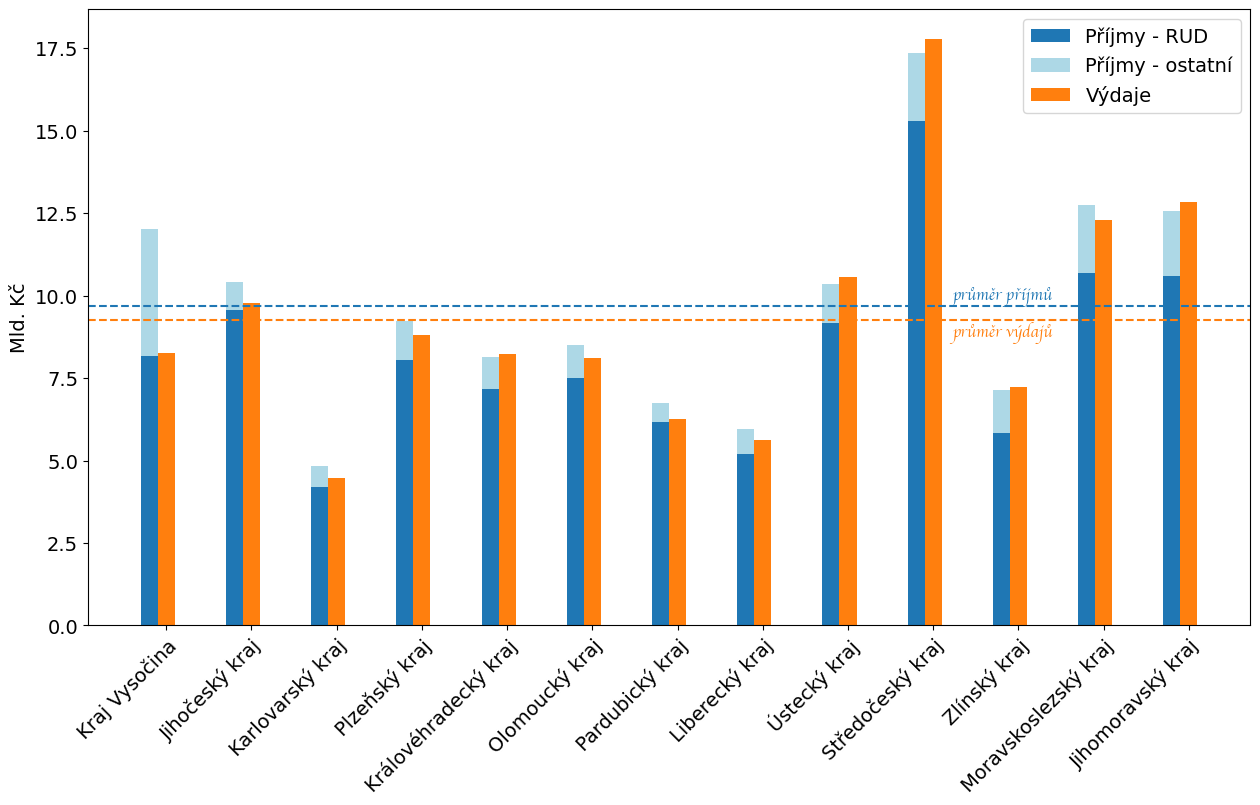

In [304]:
figsize=(15,8)
fontsize=14
year="2024"
df1=df_v.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df2=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
#prijmy RUD
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df3=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)

#graph
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=figsize)

# Set position of bar on X axis
barWidth = 0.2

br=np.arange(len(kraje))
for i in range(2):
    if i==1:
        br=[x + barWidth for x in br]
        ax.bar(br,df1.loc[kraje,year]/10**9,width = barWidth,label=f"Výdaje")
    else:
        ax.bar(br,df3.loc[kraje,year]/10**9,width = barWidth,label=f"Příjmy - RUD")
        ax.bar(br,(df2.loc[kraje,year]-df3.loc[kraje,year])/10**9,bottom=df3.loc[kraje,year]/10**9, width = barWidth,label=f"Příjmy - ostatní",color="lightblue")

hline1=np.average(df1.reindex(kraje)/10**9) #,weights=obyv.loc[:,["2022"]].reindex(kraje)
hline2=np.average(df2.reindex(kraje)/10**9) #,weights=obyv.loc[:,["2022"]].reindex(kraje)
ax.axhline(y=hline1, color="tab:orange", linestyle='--')
ax.text(x=ax.get_xlim()[1]-3.5,y=hline1-0.5,s="průměr výdajů",color="tab:orange",fontsize="small",fontfamily="cursive")
ax.axhline(y=hline2, color="tab:blue", linestyle='--')
ax.text(x=ax.get_xlim()[1]-3.5,y=hline2+0.2,s="průměr příjmů",color="tab:blue",fontsize="small",fontfamily="cursive")

#fmt = '%.0f %%'
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))
ax.set_ylabel("Mld. Kč")
ax.set_xticks([r + barWidth for r in range(len(kraje))],
        kraje,rotation=45,ha="right",rotation_mode="anchor")
ax.legend()
plt.savefig("graphs/graf_1.jpg",dpi=300,bbox_inches="tight")
df_exl=(df1/10**9).rename(columns={year:f"Výdaje"}).join(((df2-df3)/10**9).rename(columns={year:f"Příjmy - ostatní"})).join((df3/10**9).rename(columns={year:f"Příjmy - RUD"}))
df_exl.to_excel("graphs/graf_1.xlsx")
plt.show()

In [305]:
# Display the data used for graf_1.jpg
print("=== DATA USED FOR GRAF_1.JPG ===")
print(f"Year: {year}")
print(f"Regions (kraje): {kraje}")
print()

print("1. EXPENSES (df1) - Total expenses by region:")
print("Shape:", df1.shape)
print(df1)
print()

print("2. TOTAL INCOME (df2) - All income by region:")
print("Shape:", df2.shape)
print(df2)
print()

print("3. RUD INCOME (df3) - Income from RUD only:")
print("Shape:", df3.shape)
print(df3)
print()

print("4. OTHER INCOME (df2-df3) - Non-RUD income:")
other_income = df2 - df3
print(other_income)
print()

print("5. FINAL EXCEL DATA (df_exl) - Data saved to Excel:")
print("This is what gets saved to graphs/graf_1.xlsx")
print(df_exl)
print()

print("6. SUMMARY (in billions CZK):")
summary_data = pd.DataFrame({
    'Expenses': df1[year] / 10**9,
    'RUD_Income': df3[year] / 10**9,
    'Other_Income': (df2[year] - df3[year]) / 10**9,
    'Total_Income': df2[year] / 10**9
})
print(summary_data.round(2))

=== DATA USED FOR GRAF_1.JPG ===
Year: 2024
Regions (kraje): ['Kraj Vysočina', 'Jihočeský kraj', 'Karlovarský kraj', 'Plzeňský kraj', 'Královéhradecký kraj', 'Olomoucký kraj', 'Pardubický kraj', 'Liberecký kraj', 'Ústecký kraj', 'Středočeský kraj', 'Zlínský kraj', 'Moravskoslezský kraj', 'Jihomoravský kraj']

1. EXPENSES (df1) - Total expenses by region:
Shape: (13, 1)
                              2024
Kraj                              
Kraj Vysočina         8.261734e+09
Jihočeský kraj        9.772438e+09
Karlovarský kraj      4.475685e+09
Plzeňský kraj         8.795196e+09
Královéhradecký kraj  8.243967e+09
Olomoucký kraj        8.109245e+09
Pardubický kraj       6.259935e+09
Liberecký kraj        5.632095e+09
Ústecký kraj          1.057663e+10
Středočeský kraj      1.779104e+10
Zlínský kraj          7.236952e+09
Moravskoslezský kraj  1.228103e+10
Jihomoravský kraj     1.283362e+10

2. TOTAL INCOME (df2) - All income by region:
Shape: (13, 1)
                              2024
Kraj  

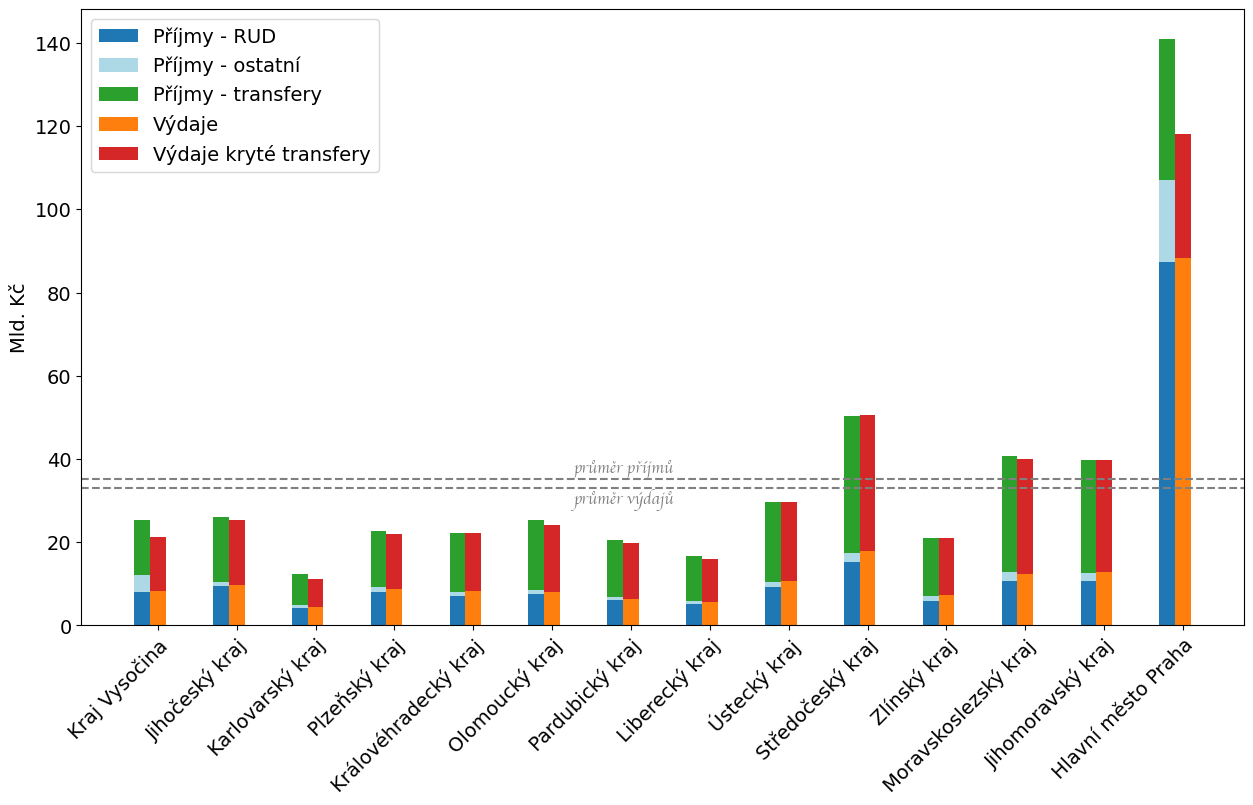

In [306]:
##do Appendixu i s transfery (a Prahou?)
kraje.append("Hlavní město Praha")
figsize=(15,8)
fontsize=14
year="2024"
df1=df_v.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df2=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
#prijmy RUD
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df3=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
#VKT
df4=df_v.loc[:,["Kraj",f"{year} VKT"]].groupby("Kraj").sum().reindex(kraje)
df4=df4.rename(columns={f"{year} VKT":year})
#transferove prijmy
cond_tr=(df_all.Sesk==41)|(df_all.Sesk==42)
df5=df_all.loc[cond_tr,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)

#graph
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=figsize)

# Set position of bar on X axis
barWidth = 0.2

br=np.arange(len(kraje))
for i in range(2):
    if i==1:
        br=[x + barWidth for x in br]
        ax.bar(br,df1.loc[kraje,year]/10**9,width = barWidth,label=f"Výdaje")
        ax.bar(br,df4.loc[kraje,year]/10**9,bottom=df1.loc[kraje,year]/10**9,width = barWidth,label=f"Výdaje kryté transfery",color="tab:red")
    else:
        ax.bar(br,df3.loc[kraje,year]/10**9,width = barWidth,label=f"Příjmy - RUD")
        ax.bar(br,(df2.loc[kraje,year]-df3.loc[kraje,year])/10**9,bottom=df3.loc[kraje,year]/10**9, width = barWidth,label=f"Příjmy - ostatní",color="lightblue")
        ax.bar(br,df5.loc[kraje,year]/10**9,bottom=df2.loc[kraje,year]/10**9, width = barWidth,label=f"Příjmy - transfery",color="tab:green")
hline1=np.average((df1.reindex(kraje)+df4.reindex(kraje))/10**9) #,weights=obyv.loc[:,["2022"]].reindex(kraje)
hline2=np.average((df2.reindex(kraje)+df5.reindex(kraje))/10**9) #,weights=obyv.loc[:,["2022"]].reindex(kraje)
ax.axhline(y=hline1, color="grey", linestyle='--')
ax.text(x=ax.get_xlim()[1]-8.5,y=hline1-3.5,s="průměr výdajů",color="grey",fontsize="small",fontfamily="cursive")
ax.axhline(y=hline2, color="grey", linestyle='--')
ax.text(x=ax.get_xlim()[1]-8.5,y=hline2+1.6,s="průměr příjmů",color="grey",fontsize="small",fontfamily="cursive")

#fmt = '%.0f %%'
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))
ax.set_ylabel("Mld. Kč")
ax.set_xticks([r + barWidth for r in range(len(kraje))],
        kraje,rotation=45,ha="right",rotation_mode="anchor")
ax.legend()
plt.savefig("graphs/graf_A1.jpg",dpi=300,bbox_inches="tight")
df_exl=(df1/10**9).rename(columns={year:f"Výdaje"}).join(((df2-df3)/10**9).rename(columns={year:f"Příjmy - ostatní"})).join((df3/10**9).rename(columns={year:f"Příjmy - RUD"}))\
                                    .join((df4/10**9).rename(columns={year:f"Výdaje kryté transfery"})).join((df5/10**9).rename(columns={year:f"Příjmy - transfery"}))
df_exl.to_excel("graphs/graf_A1.xlsx")
kraje.remove("Hlavní město Praha")
plt.show()

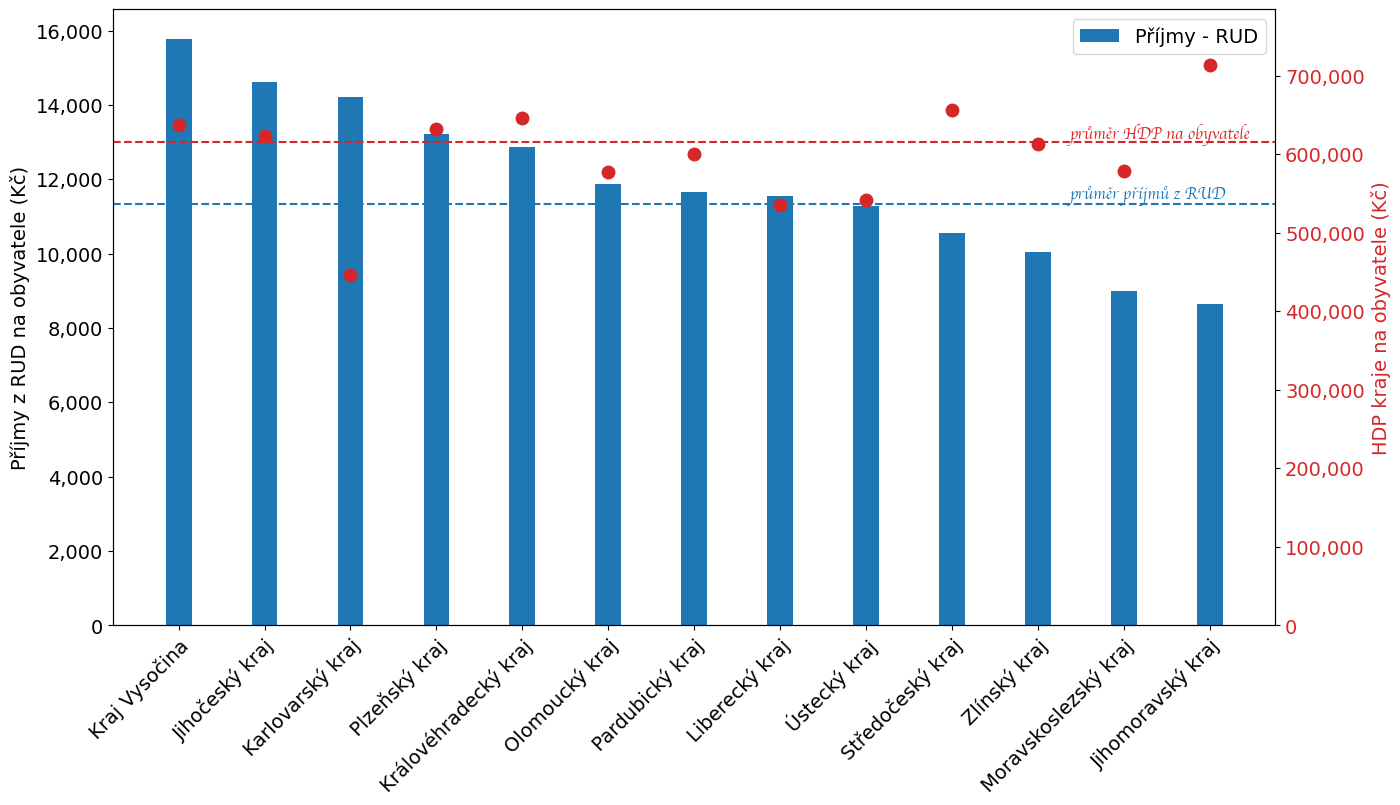

In [307]:
### RUD na obyv vs HDP na obyv
year="2024"
df1=df_v.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df2=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df3=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)

#graph
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})

# Set position of bar on X axis
barWidth = 0.2

br=np.arange(len(kraje))
for i in range(2):
    if i==1:
        br=[x + barWidth for x in br]
        df3.loc[kraje,year]=df3.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
        ax.bar(br,df3.loc[kraje,year],width = barWidth*1.5,label=f"Příjmy - RUD")
    else:
        True
        #df2.loc[kraje,year]=df2.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
        #ax.bar(br,df2.loc[kraje,year],width = barWidth,label=f"Příjmy {year}")

y2=(hdp.loc[:,"2023"])*(739500/704140)*(10**6)/obyv.loc[:,"2023"]
y2=y2.reindex(kraje)
ax2=ax.twinx()
ax2col="tab:red"
ax2.set_ylabel('HDP kraje na obyvatele (Kč)', color = ax2col) 
ax2.plot(np.arange(len(kraje))+0.2, y2, color = ax2col,marker='o', linestyle='none',markersize=9)
ax2.tick_params(axis ='y', labelcolor = ax2col)
ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.grid(False)

hline1=np.average(df3.reindex(kraje),weights=obyv.loc[:,["2023"]].reindex(kraje))
ax.axhline(y=hline1, color="tab:blue", linestyle='--')
ax.text(x=ax.get_xlim()[1]-2.4,y=hline1+150,s="průměr příjmů z RUD",color="tab:blue",fontsize="small",fontfamily="cursive")
hline2=np.average(pd.DataFrame(y2).reindex(kraje),weights=obyv.loc[:,["2023"]].reindex(kraje))
ax2.axhline(y=hline2, color="tab:red", linestyle='--')
ax2.text(x=ax.get_xlim()[1]-2.4,y=hline2+4500,s="průměr HDP na obyvatele",color="tab:red",fontsize="small",fontfamily="cursive")
ax2.set_ylim(top=y2.max()*1.1,bottom=0)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Příjmy z RUD na obyvatele (Kč)")
ax.set_xticks([r + barWidth for r in range(len(kraje))],
        kraje,rotation=45,ha="right",rotation_mode="anchor")
ax.legend()
plt.savefig("graphs/graf_2a_old.jpg",dpi=300,bbox_inches="tight")
df_exl=df3.rename(columns={year:f"Příjmy z RUD na obyvatele (Kč)"}).join(pd.DataFrame(y2).rename(columns={"2023":"HDP kraje na obyvatele (Kč)"}))
df_exl.to_excel("graphs/graf_2a_old.xlsx")
df_2a=df_exl.copy()
plt.show()

In [308]:
df3

,2024
Kraj,
Kraj Vysočina,15778.017998
Jihočeský kraj,14627.790403
Karlovarský kraj,14218.800662
Plzeňský kraj,13206.028141
Královéhradecký kraj,12865.118888
Olomoucký kraj,11860.422960
Pardubický kraj,11645.889754
Liberecký kraj,11552.010640
Ústecký kraj,11272.870444


In [309]:
# Po spuštění kódu přidejte:
print("Celkové výdaje 2024:", df1[year].sum() / 10**9, "mld. Kč")
print("Celkové příjmy 2024:", df2[year].sum() / 10**9, "mld. Kč")
print("Příjmy z RUD 2024:", df3[year].sum() / 10**9, "mld. Kč")
print("VKT 2024:", df4[year].sum() / 10**9, "mld. Kč")

Celkové výdaje 2024: 120.26957550619998 mld. Kč
Celkové příjmy 2024: 126.03560026892 mld. Kč
Příjmy z RUD 2024: 0.00015527817634073361 mld. Kč
VKT 2024: 252.53775718609998 mld. Kč


In [310]:
# Vypište data pro jeden kraj
print(df_exl.loc['Jihomoravský kraj'])

Příjmy z RUD na obyvatele (Kč)      8657.428678
HDP kraje na obyvatele (Kč)       712858.668551
Name: Jihomoravský kraj, dtype: object


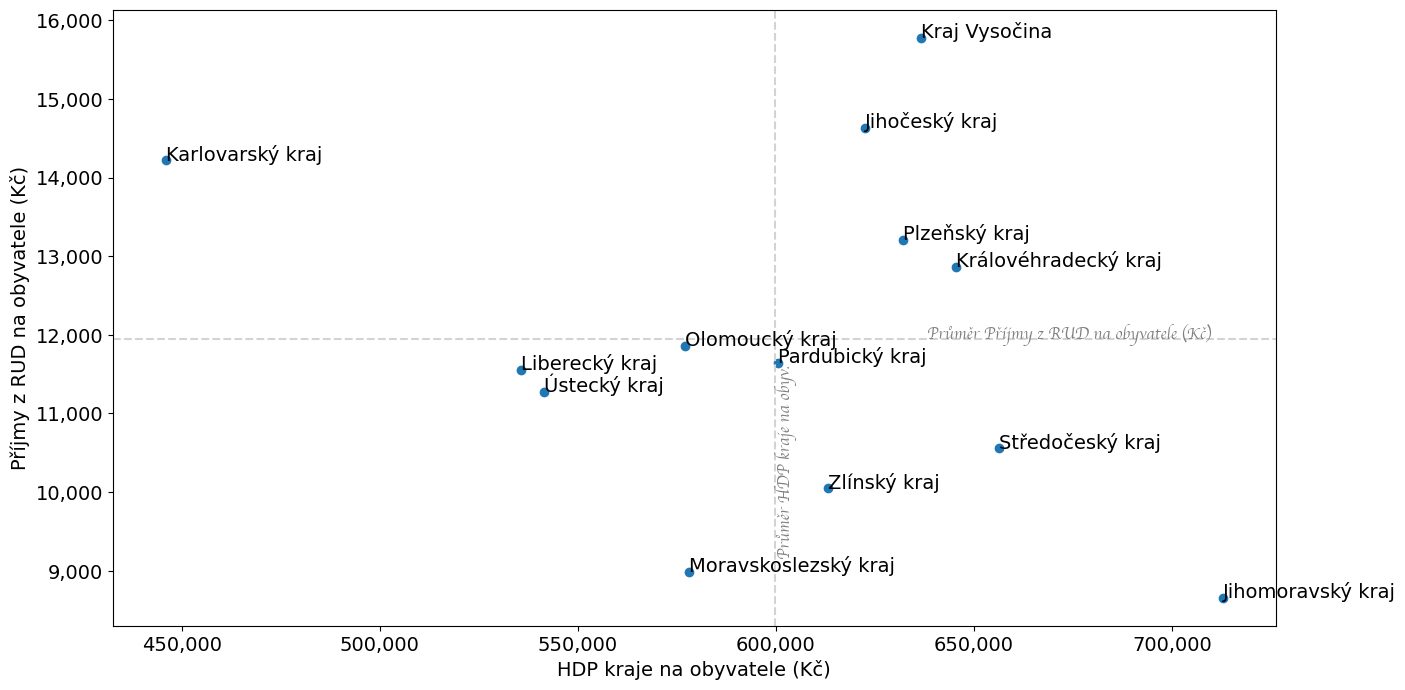

In [311]:
### RUD na obyv vs HDP na obyv - scatter
y=df_2a.loc[:,"Příjmy z RUD na obyvatele (Kč)"]
x=df_2a.loc[:,"HDP kraje na obyvatele (Kč)"]
n=df_2a.index

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y)

for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
        
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.12),s=f"Průměr {x.name[0:17]}.",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
plt.savefig("graphs/graf_2a.jpg",dpi=300,bbox_inches="tight")
df_exl=pd.DataFrame(y).join(pd.DataFrame(x))
df_exl.to_excel("graphs/graf_2a.xlsx")
plt.show()

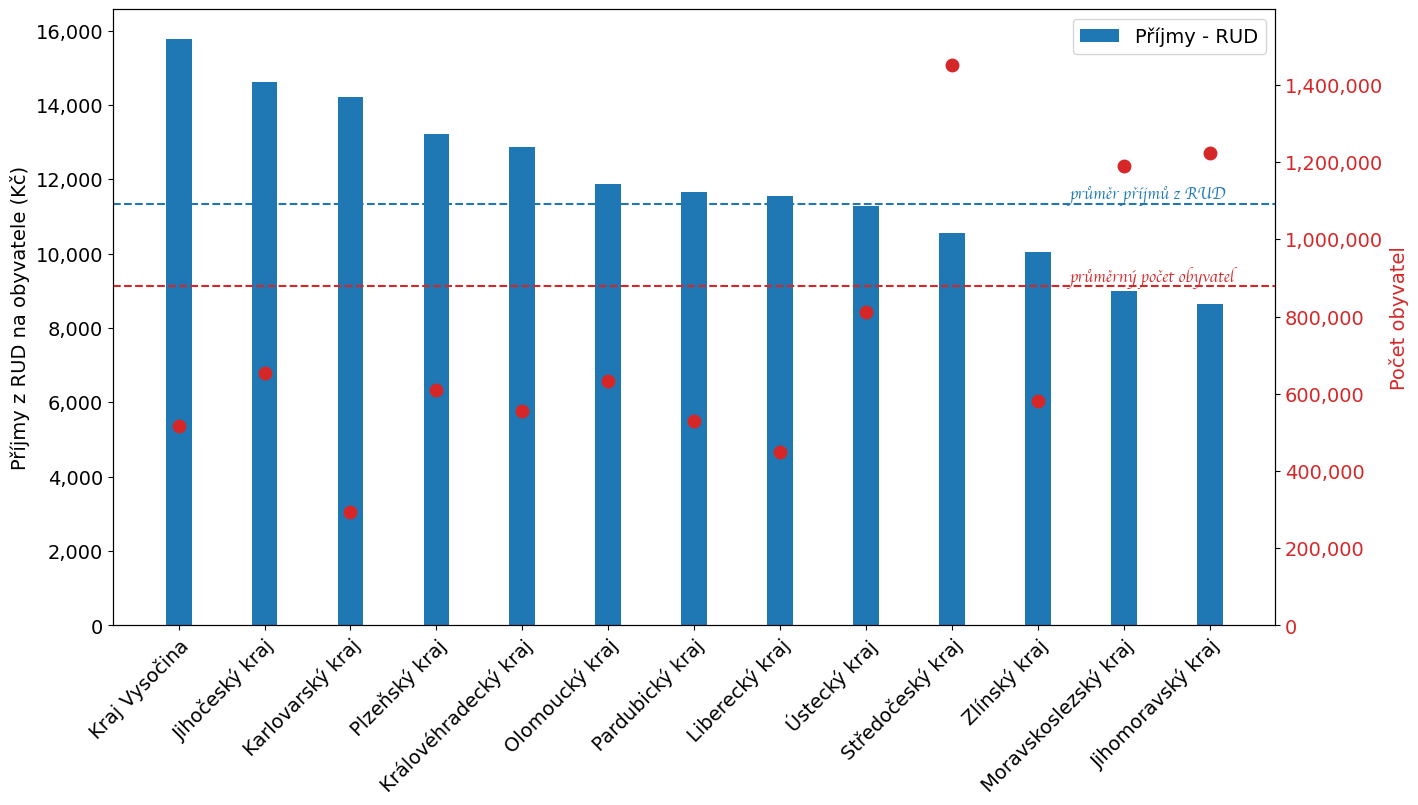

In [312]:
### RUD na obyv vs počet obyv
year="2024"
df1=df_v.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
df2=df_p.loc[:,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)
cond_rud=(df_p.Pol==1111)|(df_p.Pol==1112)|(df_p.Pol==1113)|(df_p.Pol==1121)|(df_p.Pol==1211)
df3=df_p.loc[cond_rud,["Kraj",year]].groupby("Kraj").sum().reindex(kraje)

#graph
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})

# Set position of bar on X axis
barWidth = 0.2

br=np.arange(len(kraje))
for i in range(2):
    if i==1:
        br=[x + barWidth for x in br]
        df3.loc[kraje,year]=df3.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
        ax.bar(br,df3.loc[kraje,year],width = barWidth*1.5,label=f"Příjmy - RUD")
    else:
        True
        #df2.loc[kraje,year]=df2.loc[kraje,year]/obyv.loc[kraje,str(int(year)-1)].astype(float)
        #ax.bar(br,df2.loc[kraje,year],width = barWidth,label=f"Příjmy {year}")

y2=obyv.loc[:,"2023"]
y2=y2.reindex(kraje)
ax2=ax.twinx()
ax2col="tab:red"
ax2.set_ylabel('Počet obyvatel', color = ax2col) 
ax2.plot(np.arange(len(kraje))+0.2, y2, color = ax2col,marker='o', linestyle='none',markersize=9)
ax2.tick_params(axis ='y', labelcolor = ax2col)
ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.grid(False)

hline1=np.average(df3.reindex(kraje),weights=obyv.loc[:,["2023"]].reindex(kraje))
ax.axhline(y=hline1, color="tab:blue", linestyle='--')
ax.text(x=ax.get_xlim()[1]-2.4,y=hline1+150,s="průměr příjmů z RUD",color="tab:blue",fontsize="small",fontfamily="cursive")
hline2=np.average(pd.DataFrame(y2).reindex(kraje),weights=obyv.loc[:,["2023"]].reindex(kraje))
ax2.axhline(y=hline2, color="tab:red", linestyle='--')
ax2.text(x=ax.get_xlim()[1]-2.4,y=hline2+11500,s="průměrný počet obyvatel",color="tab:red",fontsize="small",fontfamily="cursive")
ax2.set_ylim(top=y2.max()*1.1,bottom=0)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Příjmy z RUD na obyvatele (Kč)")
ax.set_xticks([r + barWidth for r in range(len(kraje))],
        kraje,rotation=45,ha="right",rotation_mode="anchor")
ax.legend()
plt.savefig("graphs/graf_2b_old.jpg",dpi=300,bbox_inches="tight")
df_exl=df3.rename(columns={year:f"Příjmy z RUD na obyvatele (Kč)"}).join(pd.DataFrame(y2).rename(columns={"2023":"Počet obyvatel"}))
df_exl.to_excel("graphs/graf_2b_old.xlsx")
df_2b=df_exl.copy()
plt.show()

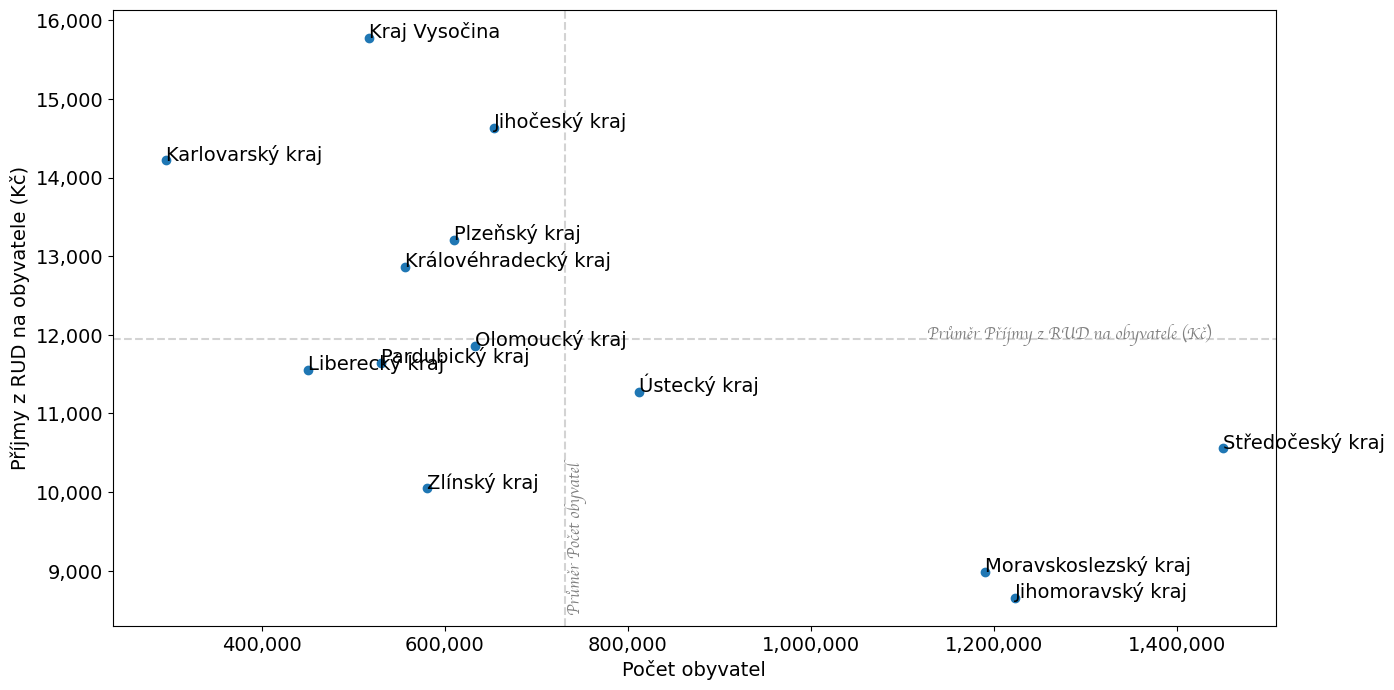

In [313]:
### RUD na obyv vs počet obyv - scatter
y=df_2b.loc[:,"Příjmy z RUD na obyvatele (Kč)"]
x=df_2b.loc[:,"Počet obyvatel"]
n=df_2b.index

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y)

for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
        
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.03),s=f"Průměr {x.name}",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
plt.savefig("graphs/graf_2b.jpg",dpi=300,bbox_inches="tight")
df_exl=pd.DataFrame(y).join(pd.DataFrame(x))
df_exl.to_excel("graphs/graf_2b.xlsx")
plt.show()

In [314]:
df

,Kraj,Trida,Sesk,Podsesk,Pol,Para,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2022 VKT,2023 VKT,2024 VKT
0,Hlavní město Praha,Běžné výdaje,50,501,5011,2141,0.0,0.0,0.0,0.0,0.0,0.00,0.0,705.15,1522.03,0.0,0.0,13397.77,28918.51,0.0
1,Hlavní město Praha,Běžné výdaje,50,501,5011,2169,0.0,0.0,0.0,183804.0,8822274.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
2,Hlavní město Praha,Běžné výdaje,50,501,5011,2212,3774149.0,3563855.0,3466686.0,4246960.0,2409107.0,3892792.16,4010846.0,4188436.00,4746763.00,4786098.0,0.0,0.00,0.00,0.0
3,Hlavní město Praha,Běžné výdaje,50,501,5011,2291,0.0,0.0,0.0,0.0,0.0,122400.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
4,Hlavní město Praha,Běžné výdaje,50,501,5011,2299,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,2149357.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32157,Ústecký kraj,Nedaňové příjmy,24,241,2412,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,3000000.00,0.0,0.0,0.00,0.00,0.0
32158,Ústecký kraj,Nedaňové příjmy,24,242,2420,0,0.0,4600000.0,0.0,620000.0,4253540.0,0.00,0.0,34628810.00,13837407.00,1000000.0,0.0,0.00,0.00,0.0
32159,Ústecký kraj,Nedaňové příjmy,24,244,2441,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,41702.30,0.00,0.0,0.0,0.00,0.00,0.0
32160,Ústecký kraj,Nedaňové příjmy,24,245,2451,0,0.0,0.0,1665000.0,0.0,1500000.0,6000000.00,0.0,510000.00,5005384.00,21900000.0,0.0,0.00,0.00,0.0


In [315]:
df_2b

,Příjmy z RUD na obyvatele (Kč),Počet obyvatel
Kraj,,
Kraj Vysočina,15778.017998,517019.0
Jihočeský kraj,14627.790403,654078.0
Karlovarský kraj,14218.800662,294964.0
Plzeňský kraj,13206.028141,610148.0
Královéhradecký kraj,12865.118888,556633.0
Olomoucký kraj,11860.422960,632790.0
Pardubický kraj,11645.889754,530238.0
Liberecký kraj,11552.010640,450450
Ústecký kraj,11272.870444,812776.0


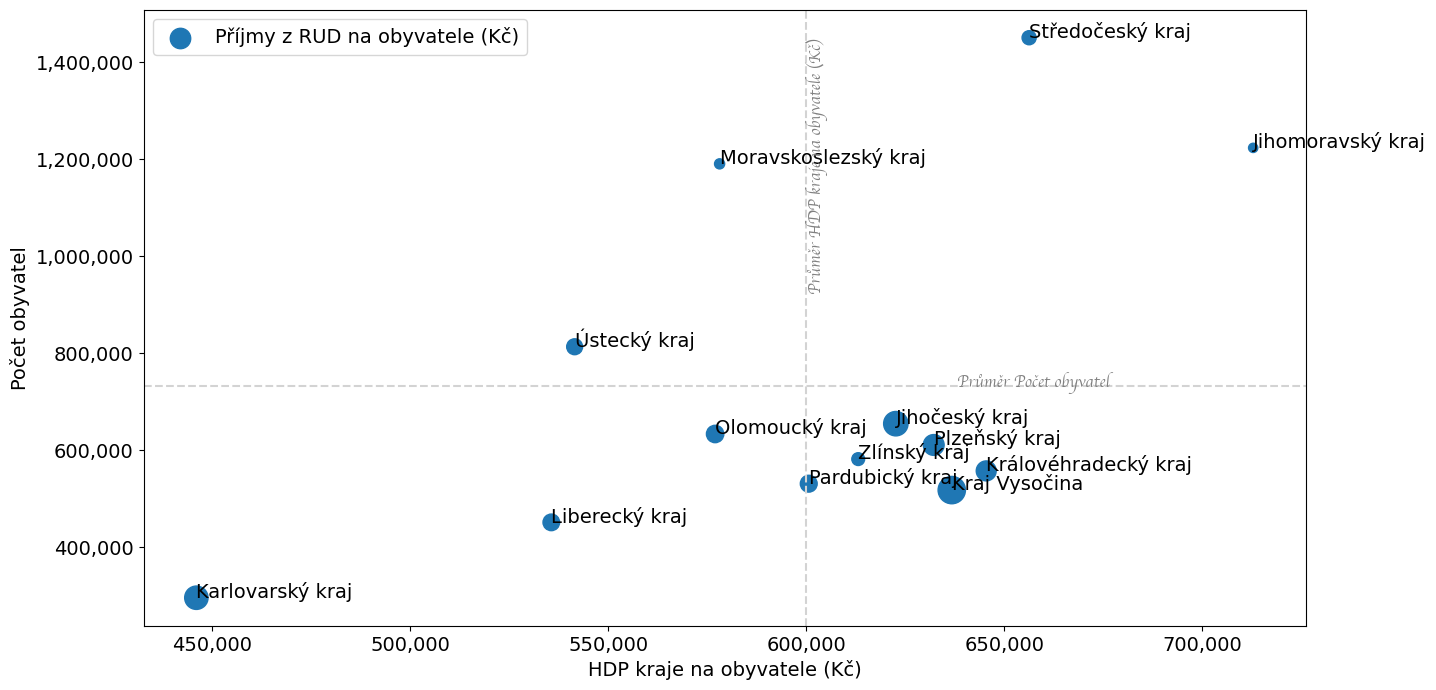

In [316]:
### počet obyv a HDP na obyv, a tloušťka pointu bude RUD na obyv - scatter
x=df_2a.loc[:,"HDP kraje na obyvatele (Kč)"]
y=df_2b.loc[:,"Počet obyvatel"]
s=df_2a.loc[:,"Příjmy z RUD na obyvatele (Kč)"]
n=df_2b.index

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y,s=((s/100-50)**2)/30,label="Příjmy z RUD na obyvatele (Kč)")
for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
        
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.55),s=f"Průměr {x.name}",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
ax.legend()
plt.savefig("graphs/graf_2c_nedavat.jpg",dpi=300,bbox_inches="tight")
plt.show()

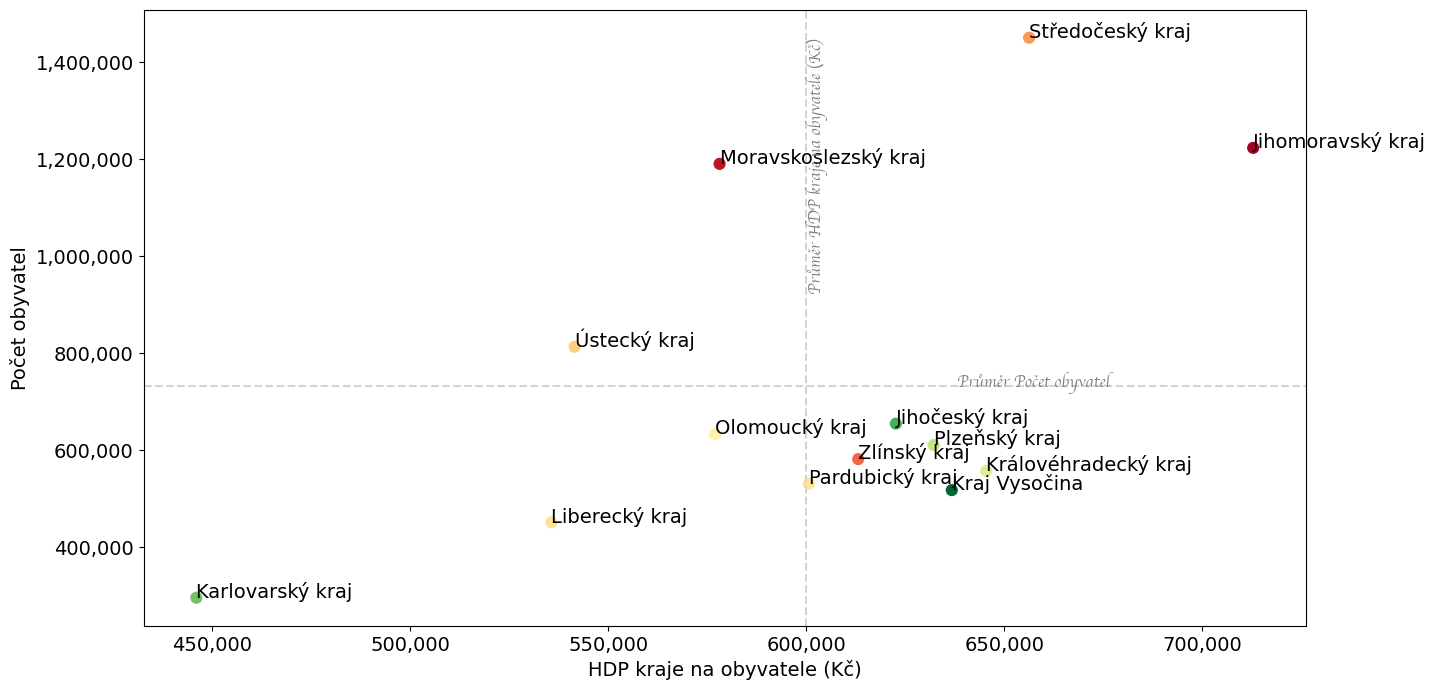

In [317]:
### počet obyv a HDP na obyv, a tloušťka pointu bude RUD na obyv - scatter
x=df_2a.loc[:,"HDP kraje na obyvatele (Kč)"]
y=df_2b.loc[:,"Počet obyvatel"]
s=df_2a.loc[:,"Příjmy z RUD na obyvatele (Kč)"]
n=df_2b.index

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
ax.scatter(x, y,s=60,c=s,cmap="RdYlGn",label="Příjmy z RUD na obyvatele (Kč)") #c=((s/100-50)**2)/30
for i, txt in enumerate(n):
    if txt[0:3]=="Jih":
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
    else:
        ax.annotate(txt, (x.iloc[i], y.iloc[i]))
        
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel(x.name)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel(y.name)
ax.axhline(y=y.mean(), color="lightgrey", linestyle='--')
ax.text(x=(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.7),y=y.mean(),s=f"Průměr {y.name}",color="grey",fontsize="small",fontfamily="cursive")
ax.axvline(x=x.mean(), color="lightgrey", linestyle='--')
ax.text(x=x.mean(),y=(ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.55),s=f"Průměr {x.name}",color="grey",fontsize="small",rotation="vertical",fontfamily="cursive")
plt.show()

In [318]:
### Trida2 - nová kategorizace
trida2_cis=sesk_cis.copy()
for dataf in [df,df_v,df_p]:
    dataf.loc[:,"Trida2"]=dataf.loc[:,"Sesk"].copy()
    
    ### Příjmy
    ##Daně
    cond=(dataf.Sesk>10) & (dataf.Sesk<20)
    dataf.loc[cond,"Trida2"]=1
    trida2_cis[1]="Daňové příjmy" #jsou tam i správní poplatky
    ##Nedaně
    #cond=dataf.Sesk==21 #prijem z vlastni cinosti - malo
    cond=(dataf.Sesk>20)&(dataf.Sesk<30)
    dataf.loc[cond,"Trida2"]=2
    trida2_cis[2]="Nedaňové příjmy" #všechny
    ##Prodej - 
    cond=(dataf.Sesk>30) & (dataf.Sesk<40)
    dataf.loc[cond,"Trida2"]=2 #Davame do Nedanovych prijmu
    ##Transfery - zvlášť
#     for pol in [4116]: #4111,4112,4113, #4116: Klíčová položka, ideálně k něčemu napárovat
#         cond=dataf.Pol==pol
#         dataf.loc[cond,"Trida2"]=pol
  
    ### Výdaje (důležité nechat condition že Trida je 5 nebo 6, jinak hrozí přepsání příjmů teoreticky - ale asi ne, příjmy nemají paragrafy)
    ##Nejdřív ostatní běžné výdaje
    cond=(dataf.Trida=="Běžné výdaje")
    dataf.loc[cond,"Trida2"]=5000
    trida2_cis[5000]="Ostatní výdaje"
    ##Ostatní kapitálové výdaje - zde spolu s běžnými
    cond1=(dataf.Trida=="Kapitálové výdaje")
    dataf.loc[cond1,"Trida2"]=5000
    #trida2_cis[6000]="Ostatní kapitálové výdaje" 
    ##Školství #### Zakladni skolství: Pol 5339, Neinv. transfery *cizím* příspěv. org.; Střední školství: 5336, Neinv. tr. zřízeným přísp. org.
    condsk=(dataf.Para>=3111)&(dataf.Para<=3299)
    dataf.loc[((cond)|(cond1))&(condsk),"Trida2"]=501
    trida2_cis[501]="Školství a vzdělávání"
    ##Doprava 1
    condd=(dataf.Para==2212)
    dataf.loc[((cond)|(cond1))&(condd),"Trida2"]=502
    trida2_cis[502]="Silnice" 
    ##Doprava 2
    condd2=(dataf.Para==2221)|(dataf.Para==2292)|(dataf.Para==2294)|(dataf.Para==2295)
    dataf.loc[((cond)|(cond1))&(condd2),"Trida2"]=503
    trida2_cis[503]="Veřejná doprava" 
    ##Sociální služby
    condsoc=(dataf.Para>=4311)&(dataf.Para<=4399)
    dataf.loc[((cond)|(cond1))&(condsoc),"Trida2"]=504
    trida2_cis[504]="Sociální služby"
    ##Zdravotnictví - zrovna tady by to chtělo rozdělení na investice? Ale nezabrušoval bych asi...
    condzdr=(dataf.Para>=3511)&(dataf.Para<=3599)
    dataf.loc[((cond)|(cond1))&(condzdr),"Trida2"]=505
    trida2_cis[505]="Zdravotnictví"  
    ##Veřejná správa
    condvs=(dataf.Para>=6112)&(dataf.Para<=6219)
    dataf.loc[((cond)|(cond1))&(condvs),"Trida2"]=506
    trida2_cis[506]="Veřejná správa"
#     ##Humanitární pomoc
#     condkul=(dataf.Para>=6221)&(dataf.Para<=6229)
#     dataf.loc[((cond)|(cond1))&(condkul),"Trida2"]=507
#     trida2_cis[507]="Humanitární pomoc"
    ##Kultura
    condkul=(dataf.Para>=3311)&(dataf.Para<=3399)
    dataf.loc[((cond)|(cond1))&(condkul),"Trida2"]=508
    trida2_cis[508]="Kultura"
#     ##Odpady
#     condkul=(dataf.Para>=3721)&(dataf.Para<=3729)
#     dataf.loc[((cond)|(cond1))&(condkul),"Trida2"]=509
#     trida2_cis[509]="Odpady"
#     ##Bezpečnost
#     condkul=(dataf.Para>=5311)&(dataf.Para<=5311)
#     dataf.loc[((cond)|(cond1))&(condkul),"Trida2"]=510
#     trida2_cis[510]="Bezpečnost"


/var/folders/21/9sgz05gj4hjc50r7fbd5pcgw0000gn/T/ipykernel_3298/655181657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.loc[:,"Trida2"]=dataf.loc[:,"Sesk"].copy()
/var/folders/21/9sgz05gj4hjc50r7fbd5pcgw0000gn/T/ipykernel_3298/655181657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf.loc[:,"Trida2"]=dataf.loc[:,"Sesk"].copy()


In [319]:
### Vytvoření df_graph_v a df_graph_p pro rok 2024
year = "2024"
df_graph_p = pd.DataFrame({})
df_graph_v = pd.DataFrame({})

for kraj in kraje:
    df_aux1 = df_p.loc[df_p.Kraj==kraj,[year,"Trida2"]].groupby("Trida2").sum().rename(columns={year:kraj})
    for ind in df_aux1.index:
        df_graph_p.loc[ind,kraj] = df_aux1.loc[ind,kraj]
    
    df_aux2 = df_v.loc[df_v.Kraj==kraj,[year,"Trida2"]].groupby("Trida2").sum().rename(columns={year:kraj})
    for ind in df_aux2.index:
        df_graph_v.loc[ind,kraj] = df_aux2.loc[ind,kraj]

print("df_graph_v a df_graph_p vytvořeny pro rok 2024")

df_graph_v a df_graph_p vytvořeny pro rok 2024


In [320]:
df_graph_p


,Kraj Vysočina,Jihočeský kraj,Karlovarský kraj,Plzeňský kraj,Královéhradecký kraj,Olomoucký kraj,Pardubický kraj,Liberecký kraj,Ústecký kraj,Středočeský kraj,Zlínský kraj,Moravskoslezský kraj,Jihomoravský kraj
1,8.247616e+09,9.666801e+09,4.274110e+09,8.121927e+09,7.260929e+09,7.583570e+09,6.294848e+09,5.289571e+09,9.302171e+09,1.546782e+10,5.970345e+09,1.087715e+10,1.079090e+10
2,3.783117e+09,7.477151e+08,5.733016e+08,1.105772e+09,8.956807e+08,9.104099e+08,4.396318e+08,6.611889e+08,1.038148e+09,1.889423e+09,1.172812e+09,1.879498e+09,1.791151e+09


In [321]:
# Zkontrolujte hodnotu pro Jihočeský kraj, Školství, rok 2024
kontrola = df_v.loc[
    (df_v.Kraj=="Jihočeský kraj") & 
    (df_v.Trida2==501),
    "2024"
].sum()

print(f"Školství Jihočeský kraj 2024: {kontrola:,.0f} Kč")

Školství Jihočeský kraj 2024: 1,567,550,332 Kč


In [322]:
# Filtrujeme výdaje pro Plzeňský kraj, paragraf 2212, rok 2024
plzen_silnice = df_v.loc[
    (df_v.Kraj == "Plzeňský kraj") & 
    (df_v.Para == 2212) &
    ((df_v.Trida == "Běžné výdaje") | (df_v.Trida == "Kapitálové výdaje"))
]

# Vypíšeme relevantní sloupce
print("Plzeňský kraj - Silnice (paragraf 2212) - rok 2024:")
print("="*80)
print(f"Počet řádků: {len(plzen_silnice)}")
print(f"Celková suma 2024: {plzen_silnice['2024'].sum():,.0f} Kč")
print("\nDetail všech položek:")
print(plzen_silnice[["Trida", "Sesk", "Podsesk", "Pol", "Para", "2024"]])

# Nebo pokud chcete vidět i názvy:
print("\n" + "="*80)
print("S názvy položek:")
for idx, row in plzen_silnice.iterrows():
    print(f"Třída: {row['Trida']}")
    print(f"  Položka {row['Pol']}: {pol_cis.get(row['Pol'], 'Neznámý název')}")
    print(f"  Částka 2024: {row['2024']:,.0f} Kč")
    print("-"*40)

Plzeňský kraj - Silnice (paragraf 2212) - rok 2024:
Počet řádků: 31
Celková suma 2024: 1,983,605,027 Kč

Detail všech položek:
                   Trida  Sesk  Podsesk   Pol  Para          2024
24388       Běžné výdaje    51      513  5137  2212  0.000000e+00
24425       Běžné výdaje    51      513  5139  2212  0.000000e+00
24469       Běžné výdaje    51      514  5141  2212  0.000000e+00
24508       Běžné výdaje    51      516  5161  2212  2.150000e+02
24514       Běžné výdaje    51      516  5162  2212  0.000000e+00
24537       Běžné výdaje    51      516  5164  2212  2.465000e+04
24567       Běžné výdaje    51      516  5166  2212  0.000000e+00
24614       Běžné výdaje    51      516  5168  2212  0.000000e+00
24635       Běžné výdaje    51      516  5169  2212  0.000000e+00
24712       Běžné výdaje    51      517  5171  2212  0.000000e+00
24804       Běžné výdaje    51      518  5189  2212  0.000000e+00
24806       Běžné výdaje    51      519  5191  2212  0.000000e+00
24808       Běž

In [323]:
df_graph_v

,Kraj Vysočina,Jihočeský kraj,Karlovarský kraj,Plzeňský kraj,Královéhradecký kraj,Olomoucký kraj,Pardubický kraj,Liberecký kraj,Ústecký kraj,Středočeský kraj,Zlínský kraj,Moravskoslezský kraj,Jihomoravský kraj
501,1.014679e+09,1.567550e+09,7.352505e+08,1.272015e+09,1.096760e+09,1.097195e+09,8.090921e+08,6.168520e+08,2.014334e+09,1.475677e+09,8.869706e+08,2.075948e+09,2.215112e+09
502,2.157867e+09,2.319944e+09,7.838002e+08,1.983605e+09,1.738402e+09,1.308684e+09,1.845873e+09,1.357585e+09,1.801146e+09,4.711016e+09,1.240607e+09,1.738342e+09,2.463094e+09
503,1.733055e+09,1.919635e+09,9.081637e+08,1.728656e+09,1.230635e+09,2.128392e+09,1.275178e+09,1.115917e+09,2.478005e+09,5.395910e+09,1.658135e+09,2.307240e+09,2.802215e+09
504,3.087270e+08,9.134852e+08,3.323588e+08,4.734827e+08,7.245144e+08,5.459158e+08,2.312243e+08,2.558925e+08,7.874381e+08,8.003819e+08,7.746024e+08,1.167947e+09,1.002943e+09
505,9.302585e+08,8.557425e+08,5.594004e+08,1.267190e+09,1.519908e+09,6.334630e+08,6.122328e+08,6.323768e+08,1.263892e+09,2.303642e+09,6.735168e+08,1.608035e+09,1.551435e+09
506,5.326814e+08,5.812684e+08,4.811701e+08,6.363846e+08,6.211249e+08,8.844029e+08,6.369973e+08,4.534269e+08,7.668657e+08,1.087756e+09,6.065087e+08,7.513797e+08,9.022345e+08
508,3.598600e+08,7.097954e+08,3.301653e+08,7.202709e+08,4.309866e+08,5.822357e+08,3.448976e+08,2.951484e+08,5.557223e+08,7.917448e+08,4.837446e+08,7.241416e+08,4.649332e+08
5000,1.224607e+09,9.050173e+08,3.453763e+08,7.135911e+08,8.816373e+08,9.289559e+08,5.044393e+08,9.048969e+08,9.092312e+08,1.224915e+09,9.128673e+08,1.907999e+09,1.431651e+09


In [324]:
# Zkontrolujte v df_p místo df_v
pol_5336_prijmy = df_p.loc[
    (df_p.Kraj == "Plzeňský kraj") & 
    (df_p.Para == 2212) &
    (df_p.Pol == 5336)
]

print("Položka 5336 v PŘÍJMECH (df_p):")
print(pol_5336_prijmy)
if len(pol_5336_prijmy) > 0:
    print(f"Suma: {pol_5336_prijmy['2024'].sum():,.2f} Kč")

Položka 5336 v PŘÍJMECH (df_p):
Empty DataFrame
Columns: [Kraj, Trida, Sesk, Podsesk, Pol, Para, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2022 VKT, 2023 VKT, 2024 VKT, Trida2]
Index: []

[0 rows x 21 columns]


In [325]:
def kontrola_vydaju(kraj, paragraf_od, paragraf_do, rok="2024"):
    """
    Zobrazí všechny výdaje pro daný kraj a rozsah paragrafů
    """
    data = df_v.loc[
        (df_v.Kraj == kraj) & 
        (df_v.Para >= paragraf_od) &
        (df_v.Para <= paragraf_do) &
        ((df_v.Trida == "Běžné výdaje") | (df_v.Trida == "Kapitálové výdaje"))
    ]
    
    print(f"{kraj} - Paragrafy {paragraf_od}-{paragraf_do} - rok {rok}:")
    print("="*207)
    print(f"Počet položek: {len(data)}")
    print(f"Celková suma: {data[rok].sum():,.0f} Kč")
    print("\nDetail:")
    print(data[["Trida", "Para", "Pol", rok]])
    
    return data

# Použití:
kontrola_vydaju("Plzeňský kraj", 2212, 2212, "2024")  # Jen paragraf 2212
kontrola_vydaju("Jihočeský kraj", 3111, 3299, "2024")  # Školství

Plzeňský kraj - Paragrafy 2212-2212 - rok 2024:
Počet položek: 31
Celková suma: 1,983,605,027 Kč

Detail:
                   Trida  Para   Pol          2024
24388       Běžné výdaje  2212  5137  0.000000e+00
24425       Běžné výdaje  2212  5139  0.000000e+00
24469       Běžné výdaje  2212  5141  0.000000e+00
24508       Běžné výdaje  2212  5161  2.150000e+02
24514       Běžné výdaje  2212  5162  0.000000e+00
24537       Běžné výdaje  2212  5164  2.465000e+04
24567       Běžné výdaje  2212  5166  0.000000e+00
24614       Běžné výdaje  2212  5168  0.000000e+00
24635       Běžné výdaje  2212  5169  0.000000e+00
24712       Běžné výdaje  2212  5171  0.000000e+00
24804       Běžné výdaje  2212  5189  0.000000e+00
24806       Běžné výdaje  2212  5191  0.000000e+00
24808       Běžné výdaje  2212  5192  0.000000e+00
25156       Běžné výdaje  2212  5321  1.868700e+07
25263       Běžné výdaje  2212  5331  8.551427e+08
25308       Běžné výdaje  2212  5336  5.960464e-08
25361       Běžné výdaje  2

,Kraj,Trida,Sesk,Podsesk,Pol,Para,2015,2016,2017,2018,...,2020,2021,2022,2023,2024,2025,2022 VKT,2023 VKT,2024 VKT,Trida2
8616,Jihočeský kraj,Běžné výdaje,50,501,5011,3299,7161770.0,1756170.0,1937711.0,2804066.40,...,3447103.40,4670347.00,971775.02,846156.37,339606.40,0.0,3592184.98,3503796.63,1712577.60,501
8637,Jihočeský kraj,Běžné výdaje,50,502,5021,3299,148107.0,195287.0,36308.0,0.00,...,11515.00,6110.00,4794.00,25380.00,13161.50,0.0,91086.00,35720.00,63562.50,501
8658,Jihočeský kraj,Běžné výdaje,50,503,5031,3299,1809804.0,439058.0,484431.0,701017.86,...,854874.54,1158241.95,240998.67,209846.24,82857.53,0.0,890856.22,868935.54,422950.39,501
8679,Jihočeský kraj,Běžné výdaje,50,503,5032,3299,651519.0,158049.0,174393.0,252330.90,...,310227.40,420275.00,87448.37,76143.28,30065.40,0.0,323254.63,315298.72,153471.60,501
8699,Jihočeský kraj,Běžné výdaje,50,503,5038,3299,29525.0,7378.0,8137.0,11773.87,...,14472.64,19609.10,4091.30,3558.68,1403.24,0.0,15080.82,14715.97,7162.87,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,Jihočeský kraj,Kapitálové výdaje,69,690,6909,3127,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,115546640.0,0.00,0.00,0.00,501
10211,Jihočeský kraj,Kapitálové výdaje,69,690,6909,3139,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,501
10212,Jihočeský kraj,Kapitálové výdaje,69,690,6909,3150,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,8244320.0,0.00,0.00,0.00,501
10213,Jihočeský kraj,Kapitálové výdaje,69,690,6909,3239,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,41900000.0,0.00,0.00,0.00,501


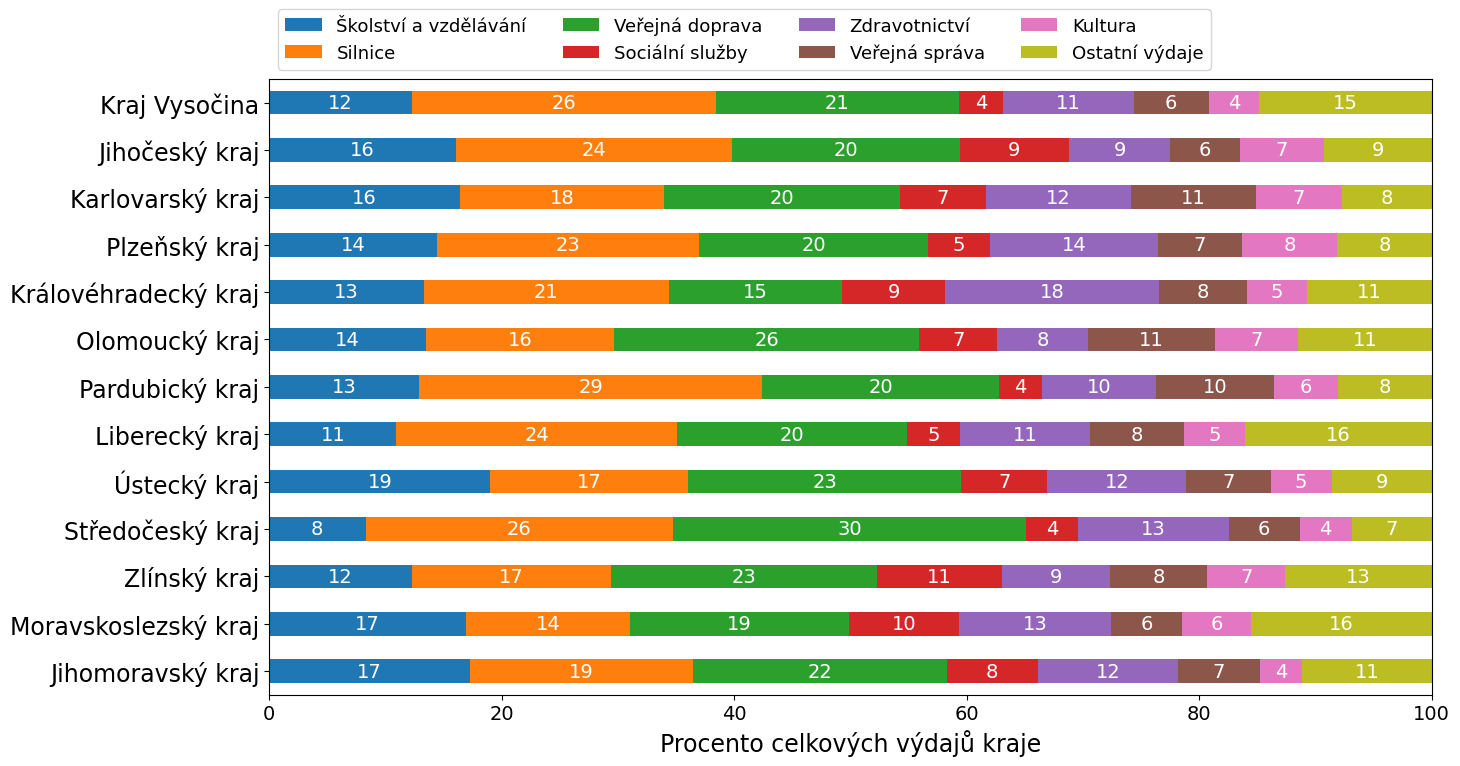

In [326]:
### stacked graf struktura výdajů s Prahou
kraje.append("Hlavní město Praha")
data=df_graph_v/df_graph_v.sum(axis=0)*100
data=data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
plt.savefig("graphs/graf_A6a_DP.png",bbox_inches='tight')
data.rename(index=trida2_cis).to_excel(f"graphs/graf_A6a_DP.xlsx")
kraje.remove("Hlavní město Praha")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

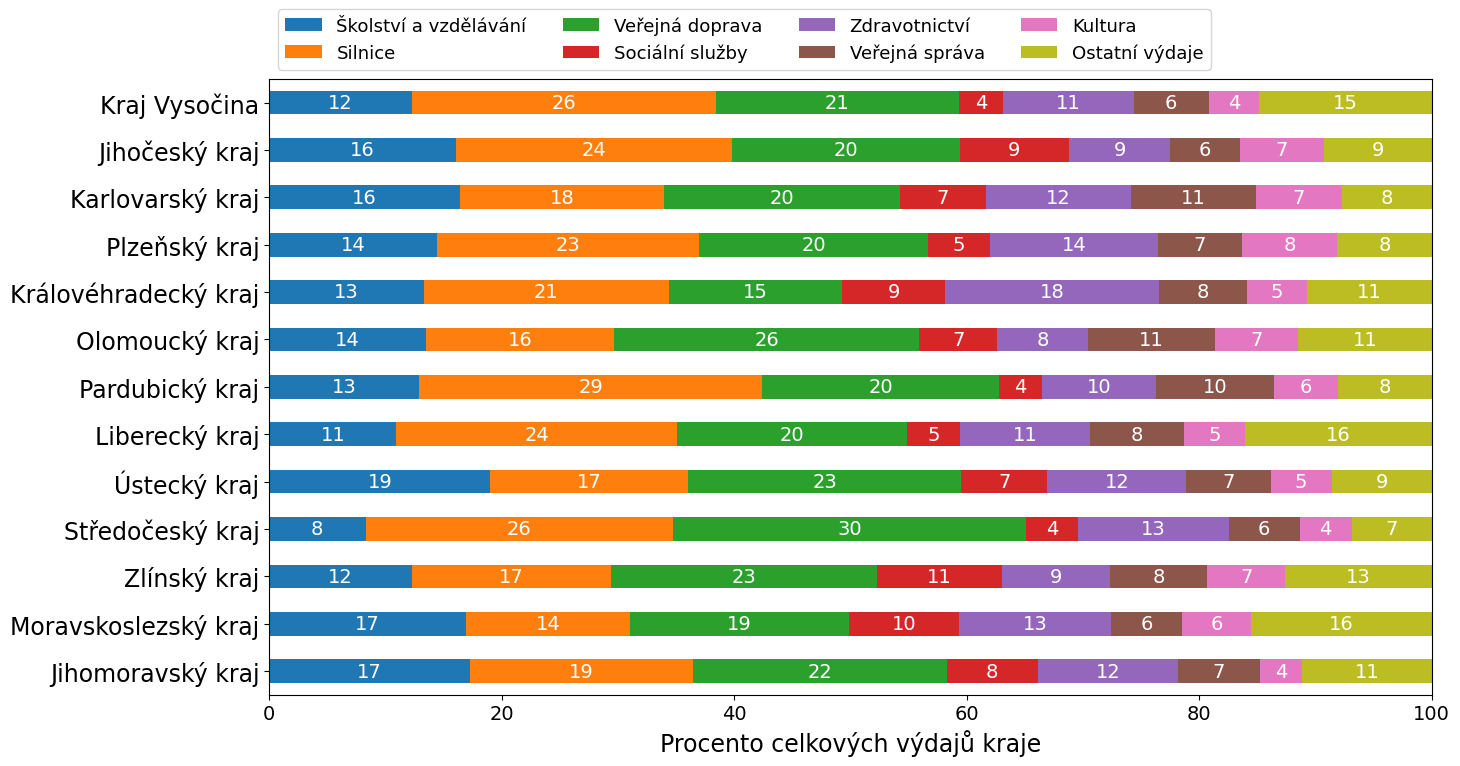

In [327]:
### stacked graf struktura výdajů
data=df_graph_v.loc[:,kraje]/df_graph_v.loc[:,kraje].sum(axis=0)*100
data=data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
plt.savefig("graphs/graf_6.png",bbox_inches='tight')
data.rename(index=trida2_cis).to_excel(f"graphs/graf_6.xlsx")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

In [328]:
### Průměrná struktura výdajů za roky 2022-2024
# Vytvoření df_graph_v pro jednotlivé roky
df_graph_v_years = {}
percentages_years = {}

for year in ['2022', '2023', '2024']:
    df_graph_v_year = pd.DataFrame({})
    for kraj in kraje:
        df_aux = df_v.loc[df_v.Kraj==kraj,[year,"Trida2"]].groupby("Trida2").sum().rename(columns={year:kraj})
        for ind in df_aux.index:
            df_graph_v_year.loc[ind,kraj] = df_aux.loc[ind,kraj]
    
    # Uložení dat a výpočet procent
    df_graph_v_years[year] = df_graph_v_year
    percentages_years[year] = df_graph_v_year.loc[:,kraje] / df_graph_v_year.loc[:,kraje].sum(axis=0) * 100

# Výpočet průměru procentních podílů přes všechny 3 roky
avg_percentages = pd.DataFrame({})
for kraj in kraje:
    avg_percentages[kraj] = sum([percentages_years[year][kraj] for year in ['2022', '2023', '2024']]) / 3

print("Průměrné procentní podíly výdajů za roky 2022-2024:")
print(avg_percentages)

Průměrné procentní podíly výdajů za roky 2022-2024:
      Kraj Vysočina  Jihočeský kraj  Karlovarský kraj  Plzeňský kraj  \
501       11.943838       14.171581         11.005667      13.830781   
502       22.526073       25.080287         14.608714      25.287854   
503       18.922541       19.341058         19.996564      18.576738   
504        5.270585        8.471725          8.302730       5.608014   
505       11.947761        9.755542         16.042462      12.674246   
506        7.323155        6.072976          9.756567       7.524889   
508        3.831495        6.330617         11.678711       8.114941   
5000      18.234552       10.776215          8.608585       8.382538   

      Královéhradecký kraj  Olomoucký kraj  Pardubický kraj  Liberecký kraj  \
501              13.464224       11.151759        12.308439       11.774573   
502              19.800377       16.827885        25.452886       21.506464   
503              15.680257       26.675879        19.410766   

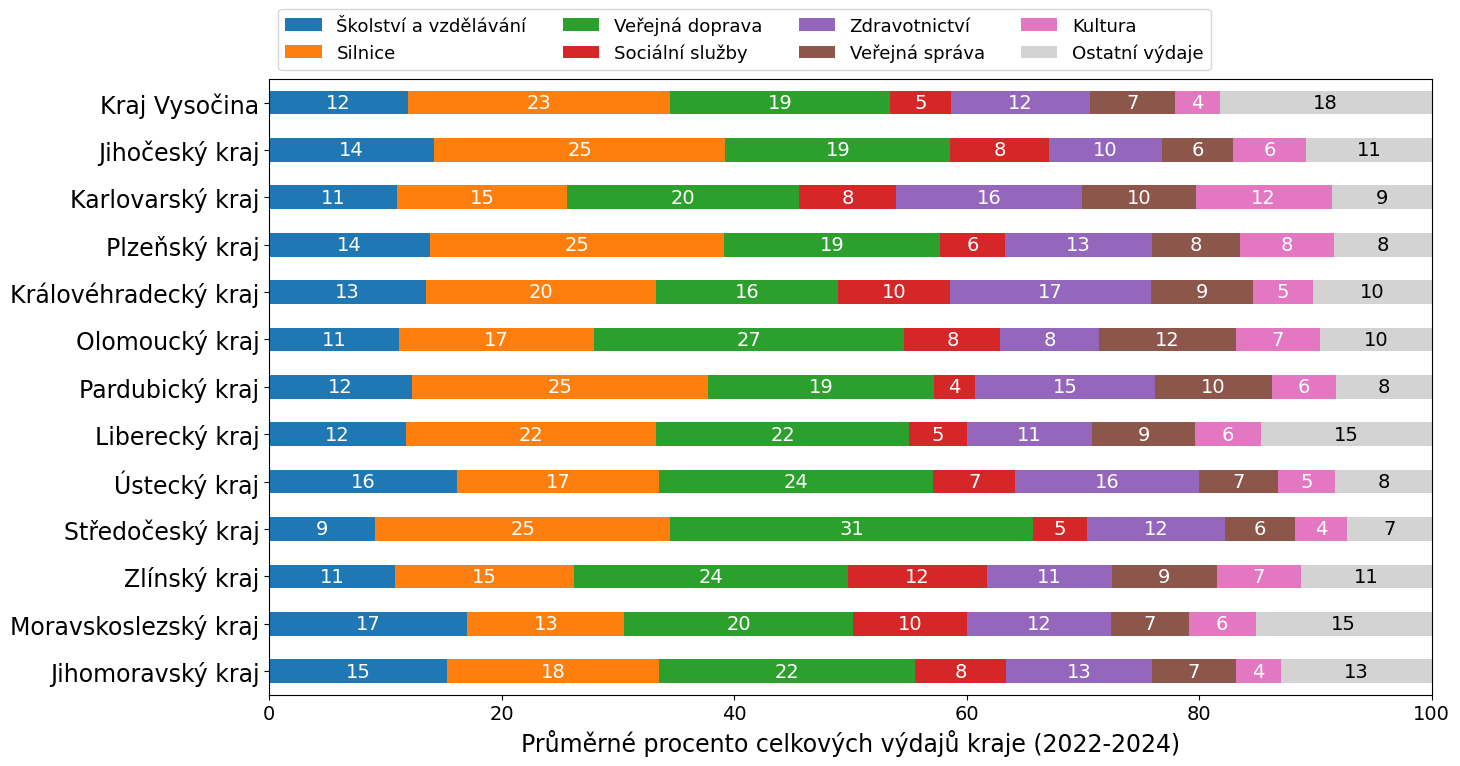

In [329]:
### Graf průměrné struktury výdajů 2022-2024 (bez Prahy)
data = avg_percentages
data = data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum = data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
labels = data.columns
y = np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní" or kap==5000: #set manual color
        color="lightgrey"
    else:
        color=category_colors[i]
    
    rects = ax.barh(y, widths, left=starts, height=0.5, label=trida2_cis[kap], color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    ax.bar_label(rects, label_type='center', color=text_color, labels=np.round(np.array(data.iloc[i,:]),0).astype(int))    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5, bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels, size=size1)    
ax.legend(ncol=4, bbox_to_anchor=(0, 1), loc='lower left', fontsize=13.1)
ax.set_xlabel("Průměrné procento celkových výdajů kraje (2022-2024)", size=size1)
plt.savefig("graphs/graf_6_avg_2022-2024.png", bbox_inches='tight')
data.rename(index=trida2_cis).to_excel("graphs/graf_6_avg_2022-2024.xlsx")
plt.show()

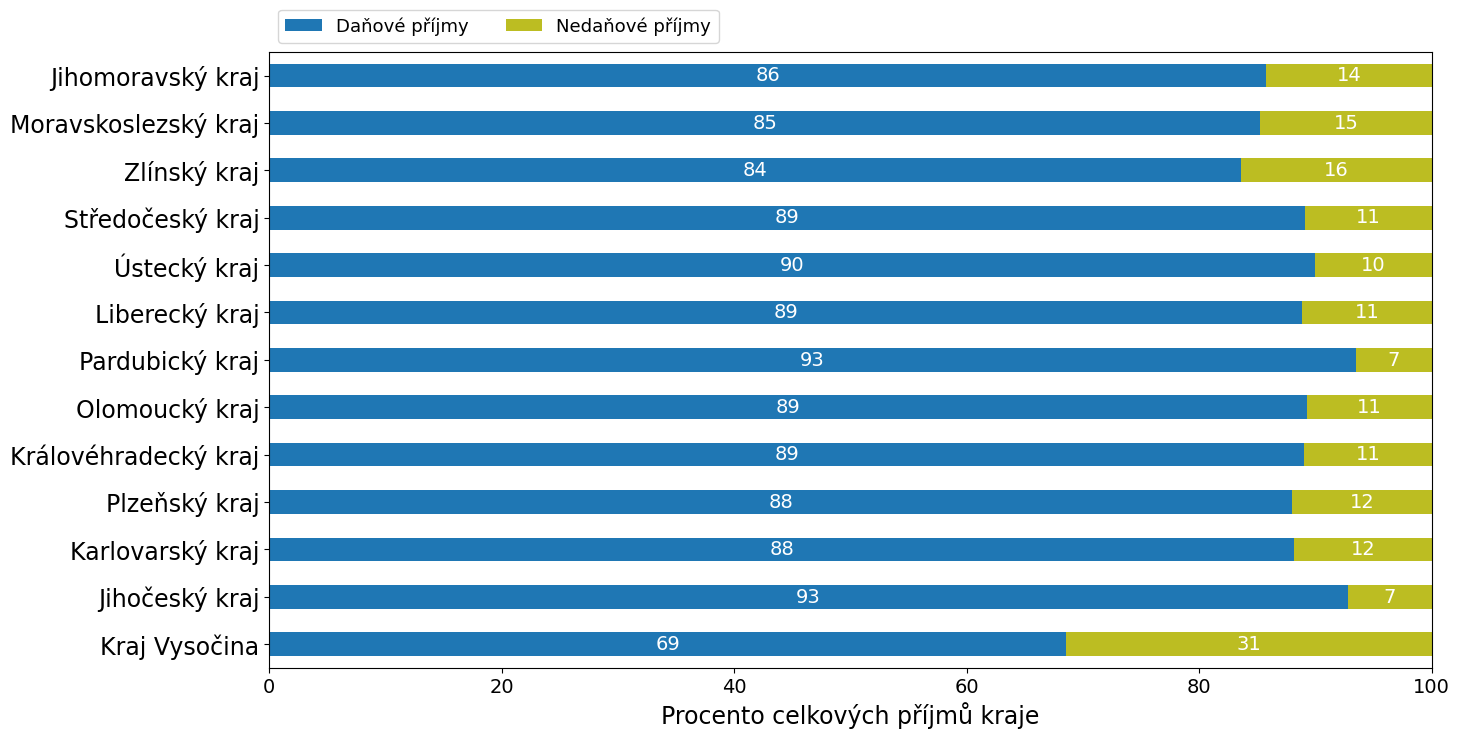

In [330]:
### stacked graf struktura příjmů
data=df_graph_p/df_graph_p.sum(axis=0)*100
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))  
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=int(len(data.index)/1), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových příjmů kraje",size=size1)
#plt.savefig("graphs/graf_2.png",bbox_inches='tight')
#data.rename(index=trida2_cis).to_excel(f"graphs/graf_2.xlsx")
plt.show()

In [331]:
df_vkt=df_v.copy()
df_vkt.loc[:,"2024 BEZVKT"]=df_vkt.loc[:,"2024"].copy()
df_vkt.loc[:,"2024"]=df_vkt.loc[:,"2024"]+df_vkt.loc[:,"2024 VKT"]

In [332]:
kraje.append("Hlavní město Praha")

In [333]:
df_graph_vkt=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vkt.loc[df_vkt.Kraj==kraj,["2024","Trida2"]].groupby("Trida2").sum().rename(columns={"2024":kraj})
    for ind in df_aux.index:
        df_graph_vkt.loc[ind,kraj]=df_aux.loc[ind,kraj]
#většinou jsou VKT o něco menší než investiční plus neinvestiční přijaté transfery, což je asi encouraging. Výjimka je Karlovarský kraj.

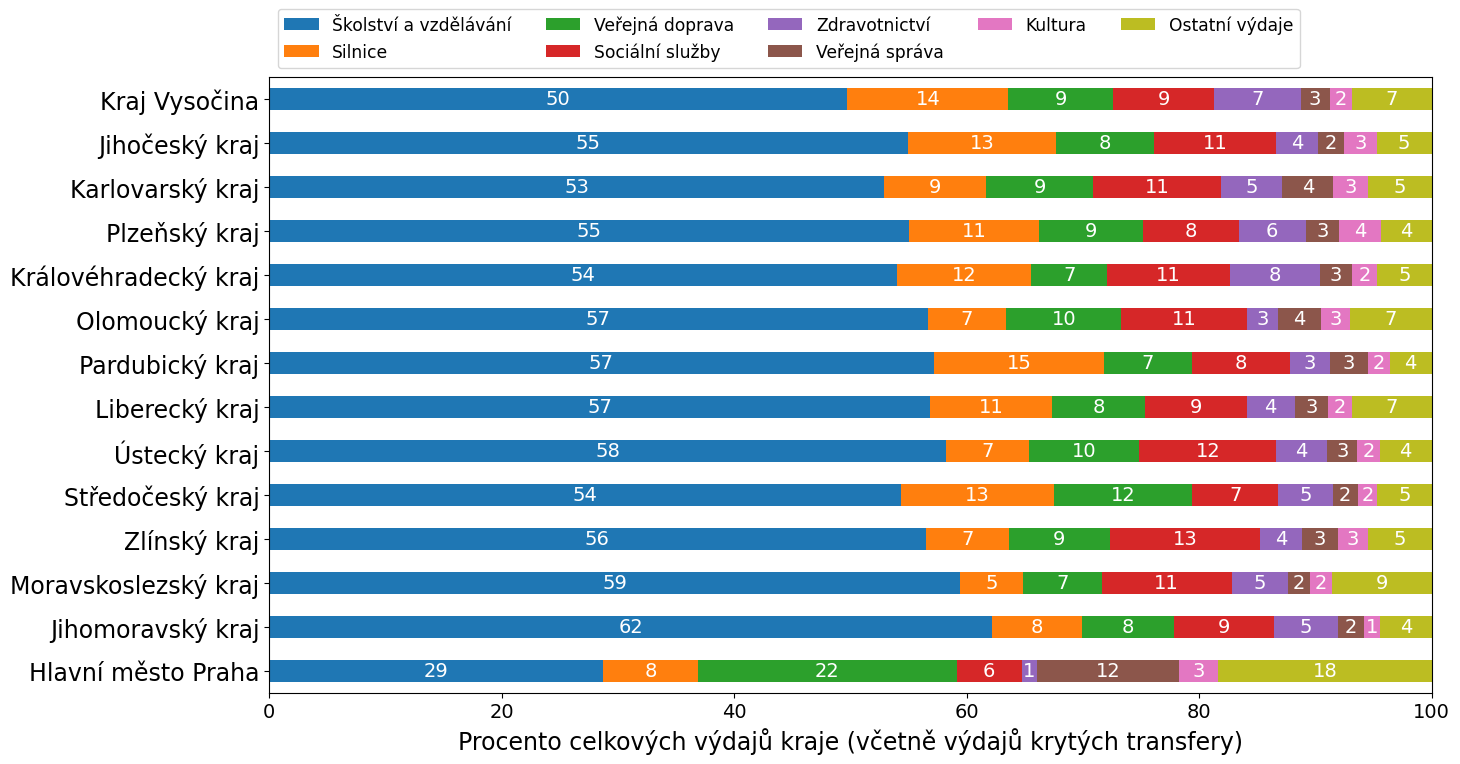

In [334]:
### stacked graf
data=df_graph_vkt/df_graph_vkt.sum(axis=0)*100
data=data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap==99999: #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="white"
    ax.bar_label(rects, label_type='center', color=text_color,labels=np.round(np.array(data.iloc[i,:]),0).astype(int))    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=5, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=12.3)
ax.set_xlabel("Procento celkových výdajů kraje (včetně výdajů krytých transfery)",size=size1)
plt.savefig("graphs/graf_A6b.png",bbox_inches='tight')
data.rename(index=trida2_cis).to_excel(f"graphs/graf_A6b.xlsx")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

/var/folders/21/9sgz05gj4hjc50r7fbd5pcgw0000gn/T/ipykernel_3298/1363800.py:49: RuntimeWarning: invalid value encountered in cast
  a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)


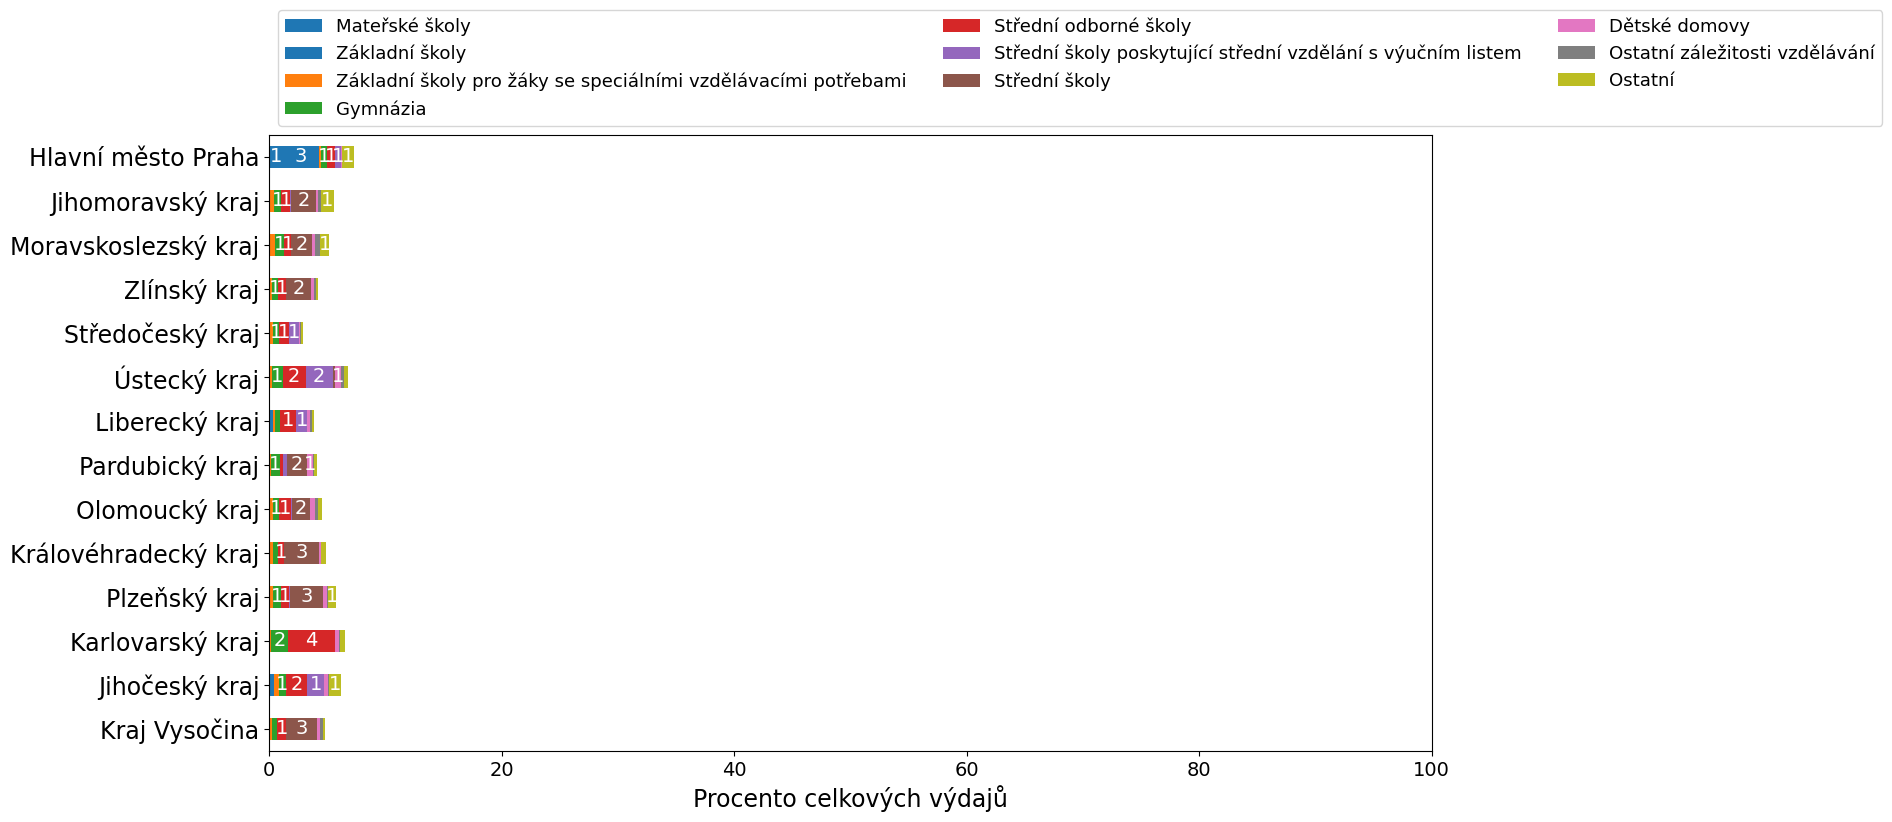

In [335]:
###Skolstvi - closer look
year="2024 BEZVKT"
df_vv=df_vkt.loc[df_vkt.Trida2==501,:].copy()
trida3_cis=para_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Para"].copy()
trida3_cis[9999]="Ostatní"

#merge small polo
for para in df_vv.Trida3.unique():
    if (df_vv.loc[df_vv.Trida3==para,year].sum())<0.5*(10**9):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]
    
### actual graph
data=df_graph_vv/df_graph_vkt.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů",size=size1)
plt.show()

/var/folders/21/9sgz05gj4hjc50r7fbd5pcgw0000gn/T/ipykernel_3298/2058963945.py:49: RuntimeWarning: invalid value encountered in cast
  a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)


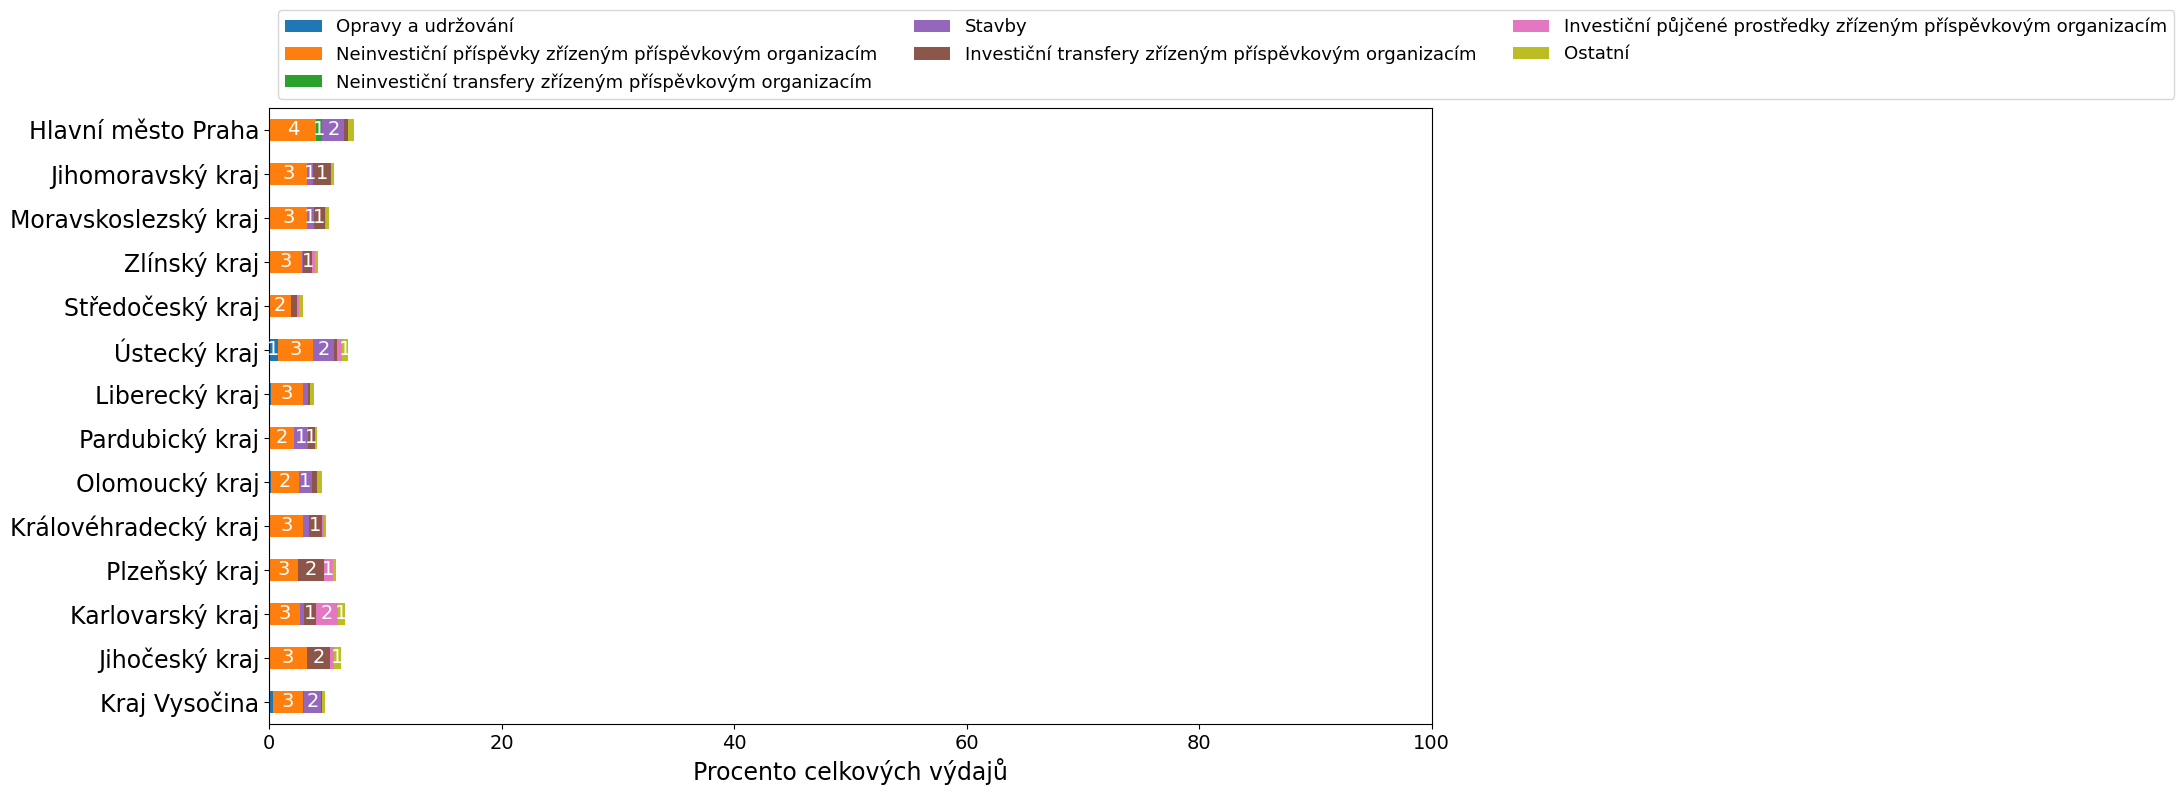

In [336]:
###Skolstvi - closer look
year="2024 BEZVKT"
df_vv=df_vkt.loc[df_vkt.Trida2==501,:].copy()
trida3_cis=pol_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Pol"].copy()
trida3_cis[9999]="Ostatní"

#merge small polo
for para in df_vv.Trida3.unique():
    if (df_vv.loc[df_vv.Trida3==para,year].sum())<0.5*(10**9):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]
    
### actual graph
data=df_graph_vv/df_graph_vkt.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů",size=size1)
plt.show()

In [337]:
#### jen výdaje kryté transfery
df_graph_bezvkt=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vkt.loc[df_vkt.Kraj==kraj,["2024 VKT","Trida2"]].groupby("Trida2").sum().rename(columns={"2024 VKT":kraj})
    for ind in df_aux.index:
        df_graph_bezvkt.loc[ind,kraj]=df_aux.loc[ind,kraj]
    df_graph_bezvkt.loc[99999,kraj]=df_vkt.loc[df_vkt.Kraj==kraj,"2024 BEZVKT"].sum()
trida2_cis[99999]="Výdaje nekryté transfery"
df_graph_bezvkt=df_graph_bezvkt.sort_index()

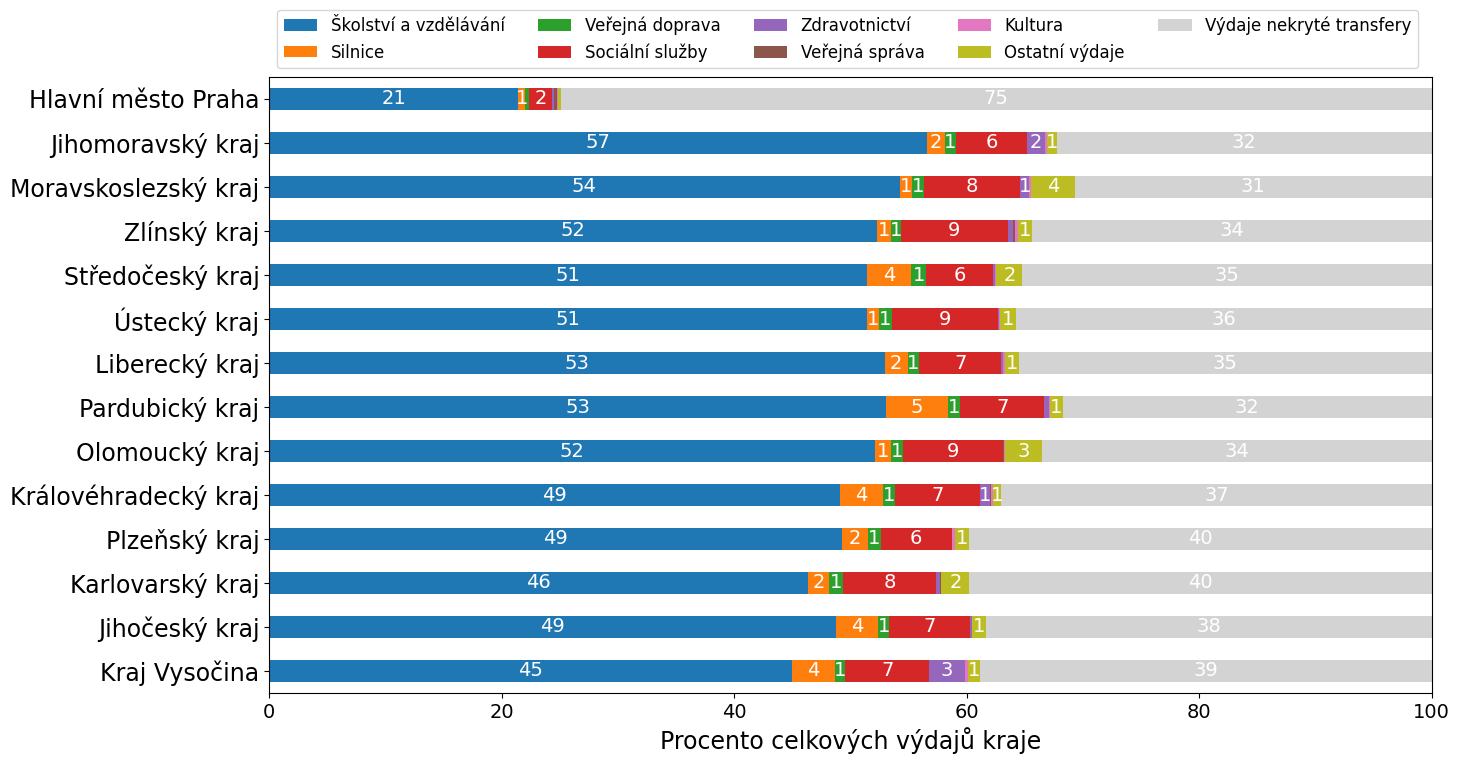

In [338]:
### stacked graf
data=df_graph_bezvkt/df_graph_bezvkt.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]-1))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap==99999: #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida2_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="white"
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)   
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=5, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=12)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
# plt.savefig("graphs/graf_A3b.png",bbox_inches='tight')
# data.rename(index=trida2_cis).to_excel(f"graphs/graf_A3b.xlsx")
plt.show() #Vysočina má miliardu a půl v "ostatních" (r. 2022; položka i paragraf). U Prahy je to 5 p.b. svoz odpadů a policie (věci, co dělá město)

## 📊 Načtení dat o příjmech obcí z RUD na základě počtu zaměstnanců

Načítáme dataset s daty o příjmech obcí z RUD (příjem na osobu, 2024)

In [339]:

df_rud = pd.read_excel("data_2025/prijem_obci_RUD_pocet_obyvatel_2024.xlsx")
print(f"✅ Úspěšně načteno! Rozměry: {df_rud.shape}")
print(f"Sloupce: {list(df_rud.columns)}")
print("\nPrvních 5 řádků:")
print(df_rud.head())


✅ Úspěšně načteno! Rozměry: (6268, 10)
Sloupce: ['Kód obce', 'Název obce', 'Kód ORP', 'Název ORP', 'Kód okresu', 'Název okresu', 'Kód kraje', 'NUTS 3 kód kraje', 'Název kraje', 'prijem_RUD_pocet_obyvatel']

Prvních 5 řádků:
   Kód obce Název obce  Kód ORP         Název ORP  Kód okresu  \
0    554979   Abertamy     4106            Ostrov       40436   
1    531367     Adamov     2104            Čáslav       40207   
2    535826     Adamov     3102  České Budějovice       40282   
3    581291     Adamov     6201           Blansko       40703   
4    547786   Adršpach     5201           Broumov       40584   

       Název okresu  Kód kraje NUTS 3 kód kraje           Název kraje  \
0      Karlovy Vary       3051            CZ041      Karlovarský kraj   
1        Kutná Hora       3026            CZ020      Středočeský kraj   
2  České Budějovice       3034            CZ031        Jihočeský kraj   
3           Blansko       3115            CZ064     Jihomoravský kraj   
4            Náchod 

In [340]:
# 2. ANALÝZA A ČIŠTĚNÍ DAT
print("=== ANALÝZA SLOUPCE prijem_RUD_pocet_obyvatel ===")

# Kontrola datových typů a problematických hodnot
print(f"Datový typ sloupce: {df_rud['prijem_RUD_pocet_obyvatel'].dtype}")
print(f"Počet celkových řádků: {len(df_rud)}")

# Najdeme nečíselné hodnoty
non_numeric_mask = pd.to_numeric(df_rud['prijem_RUD_pocet_obyvatel'], errors='coerce').isna()
non_numeric_values = df_rud.loc[non_numeric_mask, 'prijem_RUD_pocet_obyvatel'].unique()

print(f"Nečíselné hodnoty: {non_numeric_values}")
print(f"Počet řádků s nečíselnými hodnotami: {non_numeric_mask.sum()}")

# Ukázka řádků s "data chybí"
if non_numeric_mask.sum() > 0:
    print("\nPříklady řádků s chybějícími daty:")
    print(df_rud.loc[non_numeric_mask, ['Název obce', 'Název kraje', 'prijem_RUD_pocet_obyvatel']].head())

# Převod na číselné hodnoty (nečíselné hodnoty se stanou NaN)
df_rud['prijem_RUD_numeric'] = pd.to_numeric(df_rud['prijem_RUD_pocet_obyvatel'], errors='coerce')

print(f"\nPo převodu:")
print(f"Počet platných číselných hodnot: {df_rud['prijem_RUD_numeric'].notna().sum()}")
print(f"Počet NaN hodnot: {df_rud['prijem_RUD_numeric'].isna().sum()}")

=== ANALÝZA SLOUPCE prijem_RUD_pocet_obyvatel ===
Datový typ sloupce: object
Počet celkových řádků: 6268
Nečíselné hodnoty: ['data chybí']
Počet řádků s nečíselnými hodnotami: 14

Příklady řádků s chybějícími daty:
       Název obce        Název kraje prijem_RUD_pocet_obyvatel
256      Boletice     Jihočeský kraj                data chybí
413       Březina  Jihomoravský kraj                data chybí
588   Častolovice     Liberecký kraj                data chybí
972    Domoradice    Pardubický kraj                data chybí
1435   Hostokryje   Středočeský kraj                data chybí

Po převodu:
Počet platných číselných hodnot: 6254
Počet NaN hodnot: 14


In [341]:
# 3. SOUČET PŘÍJMŮ Z RUD ZA KAŽDÝ KRAJ
print("\n=== SOUČET PŘÍJMŮ Z RUD ZA KRAJE ===")

# Skupinové součty za kraje (ignorujeme NaN hodnoty)
prijem_rud_kraje = df_rud.groupby('Název kraje')['prijem_RUD_numeric'].agg(['sum', 'count', 'size']).reset_index()

# Přidáme sloupec s počtem chybějících dat
prijem_rud_kraje['chybejici_data'] = prijem_rud_kraje['size'] - prijem_rud_kraje['count']

# Přejmenujeme sloupce pro lepší čitelnost
prijem_rud_kraje.columns = ['Název kraje', 'Celkový příjem RUD (Kč)', 'Obce s daty', 'Celkem obcí', 'Obce bez dat']

# Seřadíme podle celkového příjmu
prijem_rud_kraje = prijem_rud_kraje.sort_values('Celkový příjem RUD (Kč)', ascending=False)

print("Příjmy obcí z RUD podle krajů (seřazeno podle celkového příjmu):")
print("="*80)

for idx, row in prijem_rud_kraje.iterrows():
    print(f"{row['Název kraje']:25} | {row['Celkový příjem RUD (Kč)']:>15,.0f} Kč | "
          f"Obce s daty: {row['Obce s daty']:>4} | "
          f"Obce bez dat: {row['Obce bez dat']:>3} | "
          f"Celkem obcí: {row['Celkem obcí']:>4}")

print("="*80)
print(f"{'CELKEM':25} | {prijem_rud_kraje['Celkový příjem RUD (Kč)'].sum():>15,.0f} Kč | "
      f"Obce s daty: {prijem_rud_kraje['Obce s daty'].sum():>4} | "
      f"Obce bez dat: {prijem_rud_kraje['Obce bez dat'].sum():>3} | "
      f"Celkem obcí: {prijem_rud_kraje['Celkem obcí'].sum():>4}")

# Uložíme pro další použití
df_rud_kraje = prijem_rud_kraje.copy()


=== SOUČET PŘÍJMŮ Z RUD ZA KRAJE ===
Příjmy obcí z RUD podle krajů (seřazeno podle celkového příjmu):
Hlavní město Praha        |  79,544,329,858 Kč | Obce s daty:    1 | Obce bez dat:   0 | Celkem obcí:    1
Jihomoravský kraj         |  26,714,830,521 Kč | Obce s daty:  672 | Obce bez dat:   2 | Celkem obcí:  674
Moravskoslezský kraj      |  24,774,734,005 Kč | Obce s daty:  300 | Obce bez dat:   0 | Celkem obcí:  300
Středočeský kraj          |  23,301,488,851 Kč | Obce s daty: 1144 | Obce bez dat:   3 | Celkem obcí: 1147
Ústecký kraj              |  13,659,470,146 Kč | Obce s daty:  354 | Obce bez dat:   1 | Celkem obcí:  355
Plzeňský kraj             |  12,979,549,269 Kč | Obce s daty:  501 | Obce bez dat:   3 | Celkem obcí:  504
Jihočeský kraj            |  10,710,206,656 Kč | Obce s daty:  623 | Obce bez dat:   1 | Celkem obcí:  624
Olomoucký kraj            |  10,461,166,923 Kč | Obce s daty:  401 | Obce bez dat:   1 | Celkem obcí:  402
Zlínský kraj              |   9,500,958,4

In [342]:
# 4. DALŠÍ ANALÝZY A VIZUALIZACE
print("\n=== ZÁKLADNÍ STATISTIKY ===")

# Převod na miliardy pro lepší čitelnost
df_rud_kraje['Příjem RUD (mld. Kč)'] = df_rud_kraje['Celkový příjem RUD (Kč)'] / 1e9

# Statistiky
print(f"Průměrný příjem kraje z RUD: {df_rud_kraje['Celkový příjem RUD (Kč)'].mean():,.0f} Kč")
print(f"Medián příjmu kraje z RUD: {df_rud_kraje['Celkový příjem RUD (Kč)'].median():,.0f} Kč")
print(f"Nejvyšší příjem: {df_rud_kraje['Celkový příjem RUD (Kč)'].max():,.0f} Kč ({df_rud_kraje.iloc[0]['Název kraje']})")
print(f"Nejnižší příjem: {df_rud_kraje['Celkový příjem RUD (Kč)'].min():,.0f} Kč ({df_rud_kraje.iloc[-1]['Název kraje']})")

# Zobrazíme dataframe pro další práci
print("\nDataFrame s výsledky:")
print(df_rud_kraje[['Název kraje', 'Celkový příjem RUD (Kč)', 'Příjem RUD (mld. Kč)', 'Obce s daty', 'Obce bez dat']])


=== ZÁKLADNÍ STATISTIKY ===
Průměrný příjem kraje z RUD: 17,872,961,807 Kč
Medián příjmu kraje z RUD: 10,585,686,790 Kč
Nejvyšší příjem: 79,544,329,858 Kč (Hlavní město Praha)
Nejnižší příjem: 4,832,205,924 Kč (Karlovarský kraj)

DataFrame s výsledky:
             Název kraje  Celkový příjem RUD (Kč)  Příjem RUD (mld. Kč)  \
0     Hlavní město Praha             7.954433e+10             79.544330   
1      Jihomoravský kraj             2.671483e+10             26.714831   
7   Moravskoslezský kraj             2.477473e+10             24.774734   
11      Středočeský kraj             2.330149e+10             23.301489   
13          Ústecký kraj             1.365947e+10             13.659470   
10         Plzeňský kraj             1.297955e+10             12.979549   
2         Jihočeský kraj             1.071021e+10             10.710207   
8         Olomoucký kraj             1.046117e+10             10.461167   
12          Zlínský kraj             9.500958e+09              9.500958 

## 📊 Výpočet obecního RUD na obyvatele kraje

Načteme počet obyvatel za rok 2024 z krajských datasetů a vypočítáme obecní RUD na obyvatele kraje.

In [343]:
# 5. NAČTENÍ POČTU OBYVATEL ZA ROK 2024 Z KRAJSKÝCH DATASETŮ
print("=== NAČÍTÁNÍ POČTU OBYVATEL ZA ROK 2024 ===")

# Mapování krajů na zkratky souborů (bez Prahy, ta není v krajských datech)
kraje_mapping = {
    'Středočeský kraj': 'Stř',
    'Jihočeský kraj': 'Jihoč', 
    'Plzeňský kraj': 'Plz',
    'Karlovarský kraj': 'Kar',
    'Ústecký kraj': 'Úst',
    'Liberecký kraj': 'Lib',
    'Královéhradecký kraj': 'Krá',
    'Pardubický kraj': 'Par',
    'Kraj Vysočina': 'Olo',  # Pozor - možná chyba v mapování, zkusíme
    'Jihomoravský kraj': 'Jihom',
    'Olomoucký kraj': 'Olo',
    'Zlínský kraj': 'Zlí',
    'Moravskoslezský kraj': 'Mor'
}

# DataFrame pro výsledky
obyvatele_2024 = pd.DataFrame()

print("Načítání dat z krajských souborů:")
for kraj, zkratka in kraje_mapping.items():
    try:
        # Načteme krajský dataset
        if zkratka == "Mor":
            df_aux = pd.read_excel(f"data_2025/{zkratka}.xlsx", header=1, index_col=0)
        else:
            df_aux = pd.read_excel(f"data_2025/{zkratka}.xlsx", header=2, index_col=0)
        
        # Najdeme řádek s počtem obyvatel
        obyvatel_rows = [i for i in df_aux.index.astype("str") if i.startswith("Střední stav obyvatel")]
        
        if len(obyvatel_rows) > 0:
            obyvatel_row = obyvatel_rows[0]
            # Hledáme sloupec s rokem 2024
            if 2024 in df_aux.columns:
                pocet_obyvatel = df_aux.loc[obyvatel_row, 2024]
                obyvatele_2024.loc[kraj, 'Počet obyvatel 2024'] = pocet_obyvatel
                print(f"✅ {kraj:25} | {zkratka:5} | {pocet_obyvatel:>10,.0f} obyvatel")
            else:
                print(f"❌ {kraj:25} | {zkratka:5} | Sloupec 2024 nenalezen")
                print(f"   Dostupné sloupce: {list(df_aux.columns)}")
        else:
            print(f"❌ {kraj:25} | {zkratka:5} | Řádek 'Střední stav obyvatel' nenalezen")
            print(f"   Dostupné řádky: {list(df_aux.index[:5])}...")
            
    except Exception as e:
        print(f"❌ {kraj:25} | {zkratka:5} | Chyba: {e}")

print(f"\nÚspěšně načteno dat pro {len(obyvatele_2024)} krajů")

=== NAČÍTÁNÍ POČTU OBYVATEL ZA ROK 2024 ===
Načítání dat z krajských souborů:
✅ Středočeský kraj          | Stř   |  1,459,625 obyvatel
✅ Jihočeský kraj            | Jihoč |    653,120 obyvatel
✅ Plzeňský kraj             | Plz   |    611,601 obyvatel
✅ Karlovarský kraj          | Kar   |    293,279 obyvatel
✅ Ústecký kraj              | Úst   |    809,061 obyvatel
✅ Liberecký kraj            | Lib   |    449,377 obyvatel
✅ Královéhradecký kraj      | Krá   |    555,467 obyvatel
✅ Pardubický kraj           | Par   |    529,503 obyvatel
✅ Kraj Vysočina             | Olo   |    631,453 obyvatel
✅ Jihomoravský kraj         | Jihom |  1,225,888 obyvatel
✅ Olomoucký kraj            | Olo   |    631,453 obyvatel
✅ Zlínský kraj              | Zlí   |    579,168 obyvatel
✅ Moravskoslezský kraj      | Mor   |  1,184,662 obyvatel

Úspěšně načteno dat pro 13 krajů
✅ Ústecký kraj              | Úst   |    809,061 obyvatel
✅ Liberecký kraj            | Lib   |    449,377 obyvatel
✅ Královéhradecký 

## 🧮 Výpočet příjmu z RUD na obyvatele podle krajů

Načteme data o počtu obyvatel za rok 2024 z krajských datasetů a vypočítáme příjem obcí z RUD na obyvatele pro každý kraj.

In [344]:
# 6. NAČTENÍ POČTU OBYVATEL ZA ROK 2024 Z KRAJSKÝCH DATASETŮ
print("=== NAČÍTÁNÍ POČTU OBYVATEL ZA ROK 2024 ===")

# Definujeme kraje a jejich zkratky (podobně jako v původním kódu)
kraje_full = np.array(['Hlavní město Praha', 'Středočeský kraj', 'Jihočeský kraj', 
                       'Plzeňský kraj', 'Karlovarský kraj', 'Ústecký kraj',
                       'Liberecký kraj', 'Královéhradecký kraj', 'Pardubický kraj',
                       'Kraj Vysočina', 'Jihomoravský kraj', 'Olomoucký kraj',
                       'Zlínský kraj', 'Moravskoslezský kraj'])

# Nový DataFrame pro počet obyvatel 2024
obyvatele_2024_novy = pd.DataFrame({})

# Projdeme všechny kraje včetně Prahy
for kraj in kraje_full:
    try:
        # Určení zkratky souboru
        if kraj[0:3]=="Jih":
            zkratka = kraj[0:5]
        else:
            zkratka = kraj[0:3]
        
        # Speciální pravidla
        if zkratka == "Mor":
            df_aux = pd.read_excel(f"data_2025/{zkratka}.xlsx", header=1, index_col=0)
        else:
            df_aux = pd.read_excel(f"data_2025/{zkratka}.xlsx", header=2, index_col=0)
        
        # Najdeme řádek se středním stavem obyvatel
        obyvatel_rows = [i for i in df_aux.index.astype("str") if i.startswith("Střední stav obyvatel")]
        
        if obyvatel_rows:
            obyvatel_row = obyvatel_rows[0]
            # Získáme počet obyvatel za rok 2024
            pocet_obyvatel = int(df_aux.loc[obyvatel_row, 2024])
            obyvatele_2024_novy.loc[kraj, 'Počet obyvatel 2024'] = pocet_obyvatel
            print(f"{kraj:25} | {zkratka:6} | {pocet_obyvatel:>10,} obyvatel")
        else:
            print(f"❌ {kraj:25} | {zkratka:6} | Nenalezen řádek obyvatel")
            
    except Exception as e:
        print(f"❌ {kraj:25} | {zkratka:6} | Chyba: {e}")

print("="*80)
print(f"Celkem načteno krajů: {len(obyvatele_2024_novy)}")
print(f"Celkem obyvatel ČR: {obyvatele_2024_novy['Počet obyvatel 2024'].sum():,}")

=== NAČÍTÁNÍ POČTU OBYVATEL ZA ROK 2024 ===
Hlavní město Praha        | Hla    |  1,387,354 obyvatel
Středočeský kraj          | Stř    |  1,459,625 obyvatel
Jihočeský kraj            | Jihoč  |    653,120 obyvatel
Plzeňský kraj             | Plz    |    611,601 obyvatel
Karlovarský kraj          | Kar    |    293,279 obyvatel
Ústecký kraj              | Úst    |    809,061 obyvatel
Liberecký kraj            | Lib    |    449,377 obyvatel
Královéhradecký kraj      | Krá    |    555,467 obyvatel
Pardubický kraj           | Par    |    529,503 obyvatel
Kraj Vysočina             | Kra    |    516,973 obyvatel
Jihomoravský kraj         | Jihom  |  1,225,888 obyvatel
Olomoucký kraj            | Olo    |    631,453 obyvatel
Zlínský kraj              | Zlí    |    579,168 obyvatel
Moravskoslezský kraj      | Mor    |  1,184,662 obyvatel
Celkem načteno krajů: 14
Celkem obyvatel ČR: 10,886,531.0
Karlovarský kraj          | Kar    |    293,279 obyvatel
Ústecký kraj              | Úst    |    809

In [345]:
# 7. VÝPOČET RUD NA OBYVATELE
print("=== VÝPOČET OBECNÍHO RUD NA OBYVATELE PODLE KRAJŮ ===")
print()

# Sloučíme data o RUD a počtu obyvatel
krajska_data = df_rud_kraje.copy()
krajska_data = krajska_data.merge(obyvatele_2024_novy, left_on='Název kraje', right_index=True, how='inner')

# Vypočítáme RUD na obyvatele
krajska_data['RUD na obyvatele (Kč)'] = krajska_data['Celkový příjem RUD (Kč)'] / krajska_data['Počet obyvatel 2024']

# Seřadíme podle RUD na obyvatele (sestupně)
krajska_data_serazene = krajska_data.sort_values('RUD na obyvatele (Kč)', ascending=False)

print("OBECNÍ RUD NA OBYVATELE PODLE KRAJŮ (2024)")
print("="*80)
print(f"{'Kraj':<25} | {'RUD celkem':<12} | {'Obyvatel':<10} | {'RUD/obyvatele':<12}")
print(f"{'':25} | {'(mld. Kč)':<12} | {'(tisíc)':<10} | {'(Kč)':<12}")
print("-"*80)

for _, row in krajska_data_serazene.iterrows():
    kraj = row['Název kraje']
    rud_celkem = row['Příjem RUD (mld. Kč)']  # už je v miliardách
    obyvatel = row['Počet obyvatel 2024'] / 1000  # převod na tisíce
    rud_na_obyvatele = row['RUD na obyvatele (Kč)']
    
    print(f"{kraj:<25} | {rud_celkem:>9.1f} | {obyvatel:>8.0f} | {rud_na_obyvatele:>9.0f}")

print("-"*80)
print(f"{'CELKEM ČR':<25} | {krajska_data['Příjem RUD (mld. Kč)'].sum():>9.1f} | {krajska_data['Počet obyvatel 2024'].sum()/1000:>8.0f} | {(krajska_data['Celkový příjem RUD (Kč)'].sum() / krajska_data['Počet obyvatel 2024'].sum()):>9.0f}")

print("\n📊 ANALÝZA:")
print(f"• Nejvyšší RUD na obyvatele: {krajska_data_serazene.iloc[0]['Název kraje']} ({krajska_data_serazene.iloc[0]['RUD na obyvatele (Kč)']:,.0f} Kč)")
print(f"• Nejnižší RUD na obyvatele: {krajska_data_serazene.iloc[-1]['Název kraje']} ({krajska_data_serazene.iloc[-1]['RUD na obyvatele (Kč)']:,.0f} Kč)")
print(f"• Průměr ČR: {(krajska_data['Celkový příjem RUD (Kč)'].sum() / krajska_data['Počet obyvatel 2024'].sum()):,.0f} Kč na obyvatele")
print(f"• Poměr nejvyšší/nejnižší: {krajska_data_serazene.iloc[0]['RUD na obyvatele (Kč)'] / krajska_data_serazene.iloc[-1]['RUD na obyvatele (Kč)']:.1f}x")

=== VÝPOČET OBECNÍHO RUD NA OBYVATELE PODLE KRAJŮ ===

OBECNÍ RUD NA OBYVATELE PODLE KRAJŮ (2024)
Kraj                      | RUD celkem   | Obyvatel   | RUD/obyvatele
                          | (mld. Kč)    | (tisíc)    | (Kč)        
--------------------------------------------------------------------------------
Hlavní město Praha        |      79.5 |     1387 |     57335
Jihomoravský kraj         |      26.7 |     1226 |     21792
Plzeňský kraj             |      13.0 |      612 |     21222
Moravskoslezský kraj      |      24.8 |     1185 |     20913
Ústecký kraj              |      13.7 |      809 |     16883
Liberecký kraj            |       7.6 |      449 |     16850
Olomoucký kraj            |      10.5 |      631 |     16567
Karlovarský kraj          |       4.8 |      293 |     16476
Královéhradecký kraj      |       9.1 |      555 |     16452
Pardubický kraj           |       8.7 |      530 |     16412
Zlínský kraj              |       9.5 |      579 |     16404
Jihočeský k

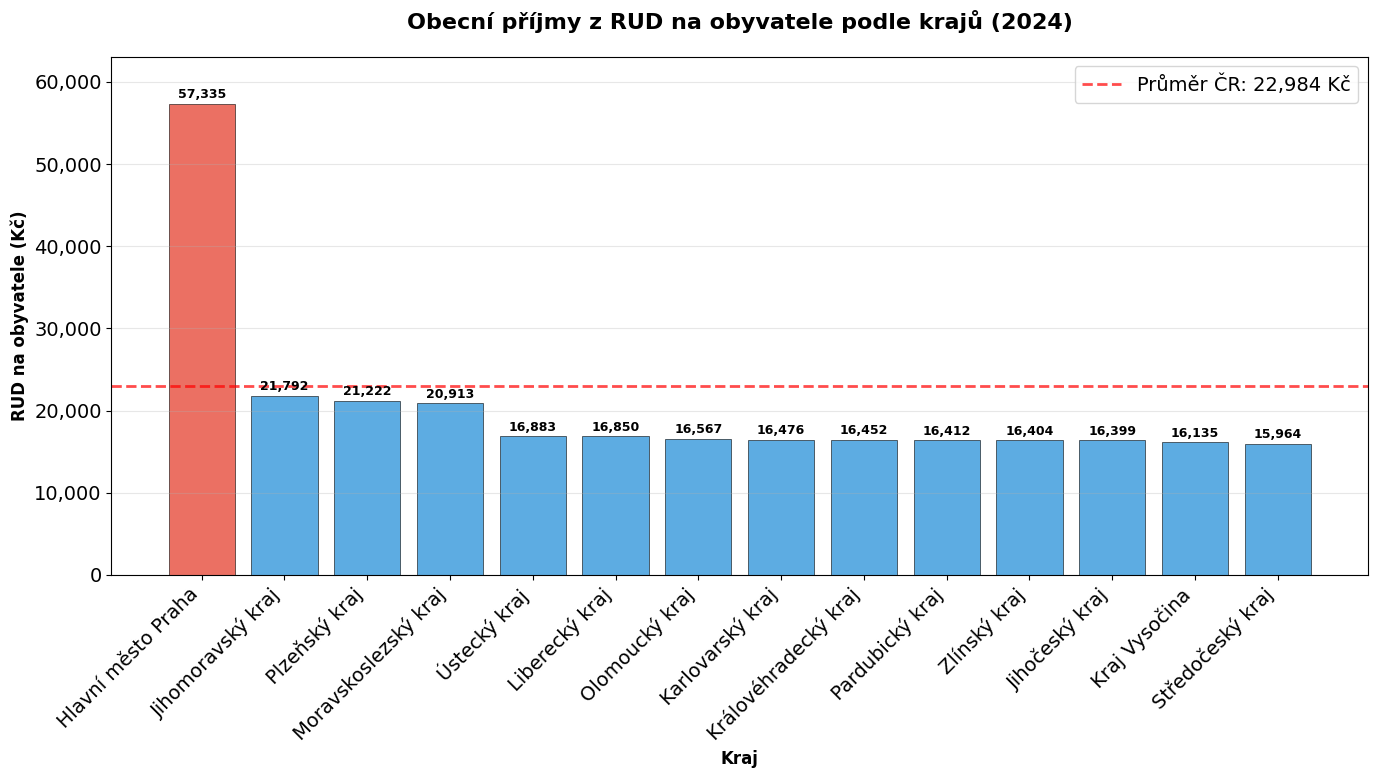

📊 Graf uložen jako: graphs/RUD_na_obyvatele_kraje_2024.png


<Figure size 640x480 with 0 Axes>

In [346]:
# 8. GRAF - OBECNÍ RUD NA OBYVATELE PODLE KRAJŮ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Data pro graf
x_data = krajska_data_serazene['Název kraje']
y_data = krajska_data_serazene['RUD na obyvatele (Kč)']

# Vytvoříme barvy - Praha zvýrazníme
colors = ['#e74c3c' if kraj == 'Hlavní město Praha' else '#3498db' for kraj in x_data]

# Sloupcový graf
bars = plt.bar(range(len(x_data)), y_data, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

# Přidáme hodnoty nad sloupce
for i, (bar, hodnota) in enumerate(zip(bars, y_data)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300, 
             f'{hodnota:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Průměrná čára - vážený průměr podle populace
celkovy_rud = krajska_data['Celkový příjem RUD (Kč)'].sum()
celkova_populace = krajska_data['Počet obyvatel 2024'].sum()
prumer_cr = celkovy_rud / celkova_populace

plt.axhline(y=prumer_cr, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Průměr ČR: {prumer_cr:,.0f} Kč')

plt.title('Obecní příjmy z RUD na obyvatele podle krajů (2024)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Kraj', fontsize=12, fontweight='bold')
plt.ylabel('RUD na obyvatele (Kč)', fontsize=12, fontweight='bold')

# Nastavení os
plt.xticks(range(len(x_data)), x_data, rotation=45, ha='right')
plt.ylim(0, max(y_data) * 1.1)

# Formátování y-osy
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Grid a legenda
plt.grid(True, alpha=0.3, axis='y')
plt.legend(loc='upper right')

# Layout
plt.tight_layout()

# Zobrazení
plt.show()

# Uložení grafu
plt.savefig('graphs/RUD_na_obyvatele_kraje_2024.png', dpi=300, bbox_inches='tight')
print("📊 Graf uložen jako: graphs/RUD_na_obyvatele_kraje_2024.png")

In [347]:
# 9. SOUHRNNÁ TABULKA - DETAILNÍ ANALÝZA RUD NA OBYVATELE
print("=== SOUHRNNÁ TABULKA - OBECNÍ RUD NA OBYVATELE ===")
print()

# Vytvoříme finální tabulku s výpočty
final_table = krajska_data_serazene[['Název kraje', 'Celkový příjem RUD (Kč)', 'Počet obyvatel 2024', 'RUD na obyvatele (Kč)']].copy()

# Přidáme sloupce s relativními hodnotami
prumer_cr = (krajska_data['Celkový příjem RUD (Kč)'].sum() / krajska_data['Počet obyvatel 2024'].sum())
final_table['% vs průměr ČR'] = (final_table['RUD na obyvatele (Kč)'] / prumer_cr * 100).round(1)
final_table['Index (ČR=100)'] = (final_table['RUD na obyvatele (Kč)'] / prumer_cr * 100).round(0).astype(int)

# Přidáme podíl na celkových příjmech
celkovy_rud_cr = krajska_data['Celkový příjem RUD (Kč)'].sum()
final_table['Podíl na RUD ČR (%)'] = (final_table['Celkový příjem RUD (Kč)'] / celkovy_rud_cr * 100).round(1)

# Zobrazíme tabulku
print("KOMPLETNÍ ANALÝZA OBECNÍCH PŘÍJMŮ Z RUD PODLE KRAJŮ (2024)")
print("="*110)
print(f"{'Pořadí':<3} | {'Kraj':<25} | {'RUD/obyv.':<10} | {'Index':<6} | {'Podíl RUD':<10} | {'Obyvatel':<10} | {'RUD celkem':<12}")
print(f"{'':3} | {'':25} | {'(Kč)':<10} | {'(ČR=100)':<6} | {'(%)':<10} | {'(mil.)':<10} | {'(mld. Kč)':<12}")
print("-"*110)

for i, (_, row) in enumerate(final_table.iterrows(), 1):
    kraj = row['Název kraje']
    rud_obyv = row['RUD na obyvatele (Kč)']
    index = row['Index (ČR=100)']
    podil_rud = row['Podíl na RUD ČR (%)']
    obyvatel_mil = row['Počet obyvatel 2024'] / 1_000_000
    rud_mld = row['Celkový příjem RUD (Kč)'] / 1_000_000_000
    
    print(f"{i:>2}. | {kraj:<25} | {rud_obyv:>8.0f} | {index:>5} | {podil_rud:>8.1f} | {obyvatel_mil:>8.2f} | {rud_mld:>10.1f}")

print("-"*110)
print(f"{'':5} {'CELKEM ČR':<25} | {prumer_cr:>8.0f} | {'100':>5} | {'100.0':>8} | {krajska_data['Počet obyvatel 2024'].sum()/1_000_000:>8.2f} | {celkovy_rud_cr/1_000_000_000:>10.1f}")

print("\n" + "="*110)
print("📊 KLÍČOVÉ POZOROVÁNÍ:")
print(f"• Praha má 2,5x vyšší RUD na obyvatele než průměr ČR")
print(f"• Praha generuje {final_table.iloc[0]['Podíl na RUD ČR (%)']}% všech obecních RUD při {(krajska_data_serazene.iloc[0]['Počet obyvatel 2024']/krajska_data['Počet obyvatel 2024'].sum()*100):.1f}% populace")
print(f"• Nejnižší kraje (mimo Středočeský) dosahují {final_table.iloc[-2]['Index (ČR=100)']}% průměru")
print(f"• Rozdíl mezi nejvyšším a nejnižším krajem: {final_table.iloc[0]['RUD na obyvatele (Kč)'] - final_table.iloc[-1]['RUD na obyvatele (Kč)']:,.0f} Kč na obyvatele")
print(f"• Kraje nad průměrem ČR: {len(final_table[final_table['Index (ČR=100)'] > 100])} z 14")

# Uložíme finální tabulku do Excel
final_table.to_excel('graphs/RUD_na_obyvatele_analyza_2024.xlsx', index=False)
print(f"💾 Tabulka uložena: graphs/RUD_na_obyvatele_analyza_2024.xlsx")

=== SOUHRNNÁ TABULKA - OBECNÍ RUD NA OBYVATELE ===

KOMPLETNÍ ANALÝZA OBECNÍCH PŘÍJMŮ Z RUD PODLE KRAJŮ (2024)
Pořadí | Kraj                      | RUD/obyv.  | Index  | Podíl RUD  | Obyvatel   | RUD celkem  
    |                           | (Kč)       | (ČR=100) | (%)        | (mil.)     | (mld. Kč)   
--------------------------------------------------------------------------------------------------------------
 1. | Hlavní město Praha        |    57335 |   249 |     31.8 |     1.39 |       79.5
 2. | Jihomoravský kraj         |    21792 |    95 |     10.7 |     1.23 |       26.7
 3. | Plzeňský kraj             |    21222 |    92 |      5.2 |     0.61 |       13.0
 4. | Moravskoslezský kraj      |    20913 |    91 |      9.9 |     1.18 |       24.8
 5. | Ústecký kraj              |    16883 |    73 |      5.5 |     0.81 |       13.7
 6. | Liberecký kraj            |    16850 |    73 |      3.0 |     0.45 |        7.6
 7. | Olomoucký kraj            |    16567 |    72 |      4.2 |    

### 2.3. Podgrafy výdajů

#### 2.3.1. Školství

In [348]:
df_vv=df_v.loc[df_v.Trida2==501,:].copy()
trida3_cis=para_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Para"].copy()
trida3_cis[9999]="Ostatní"
## Zakladni skolstvi
condsk=(df_vv.Para==3111)|(df_vv.Para==3112)|(df_vv.Para==3115)
df_vv.loc[condsk,"Trida3"]=0
trida3_cis[0]="Předškolní vzdělávání"
## Zakladni skolstvi
condsk=(df_vv.Para==3113)|(df_vv.Para==3114)|(df_vv.Para==3117)|(df_vv.Para==3118)|(df_vv.Para==3119)
df_vv.loc[condsk,"Trida3"]=1
trida3_cis[1]="Základní vzdělávání"
## Stredni skolstvi
condsk=(df_vv.Para>=3121)&(df_vv.Para<=3129)#&(df_vv.Para!=3126) konzervatoř
df_vv.loc[condsk,"Trida3"]=2
trida3_cis[2]="Střední vzdělávání "
## Vysoké školství - spadne do ostatních
condsk=(df_vv.Para>=3211)&(df_vv.Para<=3219)
df_vv.loc[condsk,"Trida3"]=3
trida3_cis[3]="Vysokoškolské vzdělávání"
# ## Ústavy a dětské domovy
# condsk=(df_vv.Para>=3131)&(df_vv.Para<=3139)
# df_vv.loc[condsk,"Trida3"]=3
# trida3_cis[3]="Ústavy a dětské domovy"
# ## Kapitálové výdaje
# condk=df_vv.Trida=="Kapitálové výdaje" #Většina je běžných
# df_vv.loc[condk,"Trida3"]=50
# trida3_cis[50]="Kapitálové výdaje"


In [349]:
#merge small para
for para in df_vv.Trida3.unique():
    if (df_vv.loc[df_vv.Trida3==para,year].sum())<1*(10**9):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]

KeyError: '2024 BEZVKT'

/var/folders/21/9sgz05gj4hjc50r7fbd5pcgw0000gn/T/ipykernel_3298/2966726289.py:30: RuntimeWarning: invalid value encountered in cast
  a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)


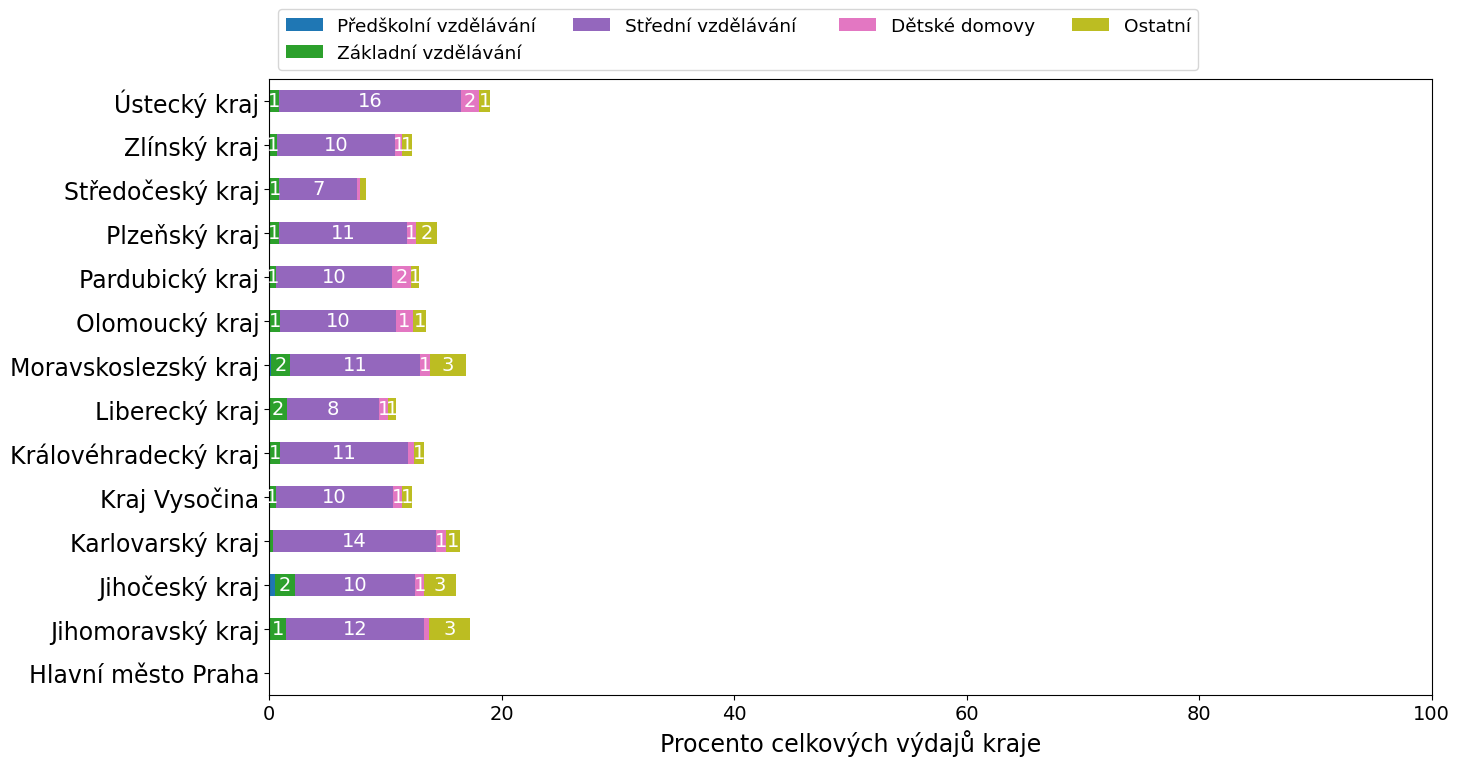

In [ ]:
data=df_graph_vv/df_graph_v.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="white"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.3)
ax.set_xlabel("Procento celkových výdajů kraje",size=size1)
plt.savefig("graphs/graf_A3b.png",bbox_inches='tight')
data.rename(index=trida3_cis).to_excel("graphs/graf_A3b.xlsx")
plt.show()

#### 2.3.2. Další různé kategorie výdajů (paragrafy)

In [ ]:

df_vv=df_v.loc[df_v.Trida2==508,:].copy()
trida3_cis=para_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Para"].copy()
# trida3_cis=pol_cis.copy()
# df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Pol"].copy()
trida3_cis[9999]="Ostatní "



In [ ]:
#merge small para
for para in df_vv.Trida3.unique():
    if ((df_vv.loc[df_vv.Trida3==para,year].sum())<0.5*(10**9)) & (para!=3312):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]

/var/folders/21/9sgz05gj4hjc50r7fbd5pcgw0000gn/T/ipykernel_3298/929342908.py:32: RuntimeWarning: invalid value encountered in cast
  a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)


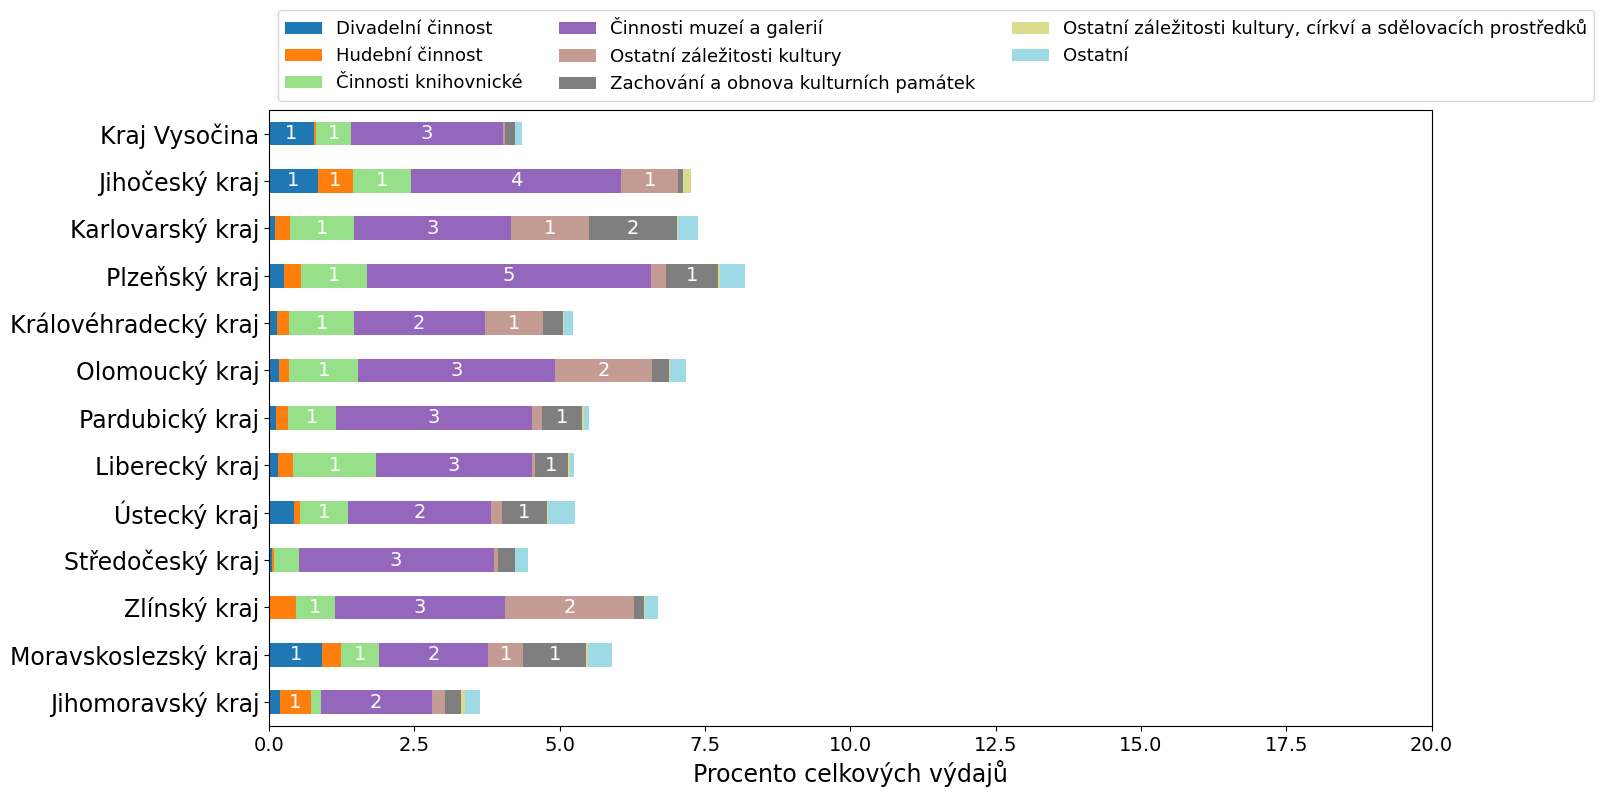

In [ ]:
# Use only columns that exist in both dataframes
common_kraje = [k for k in kraje if k in df_graph_v.columns and k in df_graph_vv.columns]
data=df_graph_vv.loc[:,common_kraje]/df_graph_v.loc[:,common_kraje].sum(axis=0)*100
data=data.iloc[:,::-1]
fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
category_colors = matplotlib.colormaps['tab20'](np.linspace(0, 1, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        color=category_colors[i]
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap],color=color)
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=20)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových výdajů",size=size1)
plt.savefig("graphs/graf_Ostatni_paragrafy.png",bbox_inches='tight',dpi=500)
data.rename(index=trida3_cis).to_excel("graphs/graf_Ostatni_paragrafy.xlsx")
plt.show()

#### 2.3.3. Další různé kategorie příjmů (položky)

Code copied, bad labels

In [ ]:
df_p.Trida2.unique()

array([1, 2])

In [ ]:
df_vv=df_p.loc[df_p.Trida2==2,:].copy()
trida3_cis=pol_cis.copy()
df_vv.loc[:,"Trida3"]=df_vv.loc[:,"Pol"].copy()
trida3_cis[9999]="Ostatní"

#merge small polo
for para in df_vv.Trida3.unique():
    if (df_vv.loc[df_vv.Trida3==para,year].sum())<0.2*(10**9):
        df_vv.loc[df_vv.Trida3==para,"Trida3"]=9999
        
#make df_graph
df_graph_vv=pd.DataFrame({})
for kraj in kraje:
    df_aux=df_vv.loc[df_vv.Kraj==kraj,[year,"Trida3"]].groupby("Trida3").sum().rename(columns={year:kraj})
    for ind in df_aux.index:
        df_graph_vv.loc[ind,kraj]=df_aux.loc[ind,kraj]

/var/folders/21/9sgz05gj4hjc50r7fbd5pcgw0000gn/T/ipykernel_3298/2933974661.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(ncol=3, bbox_to_anchor=(0, 1),


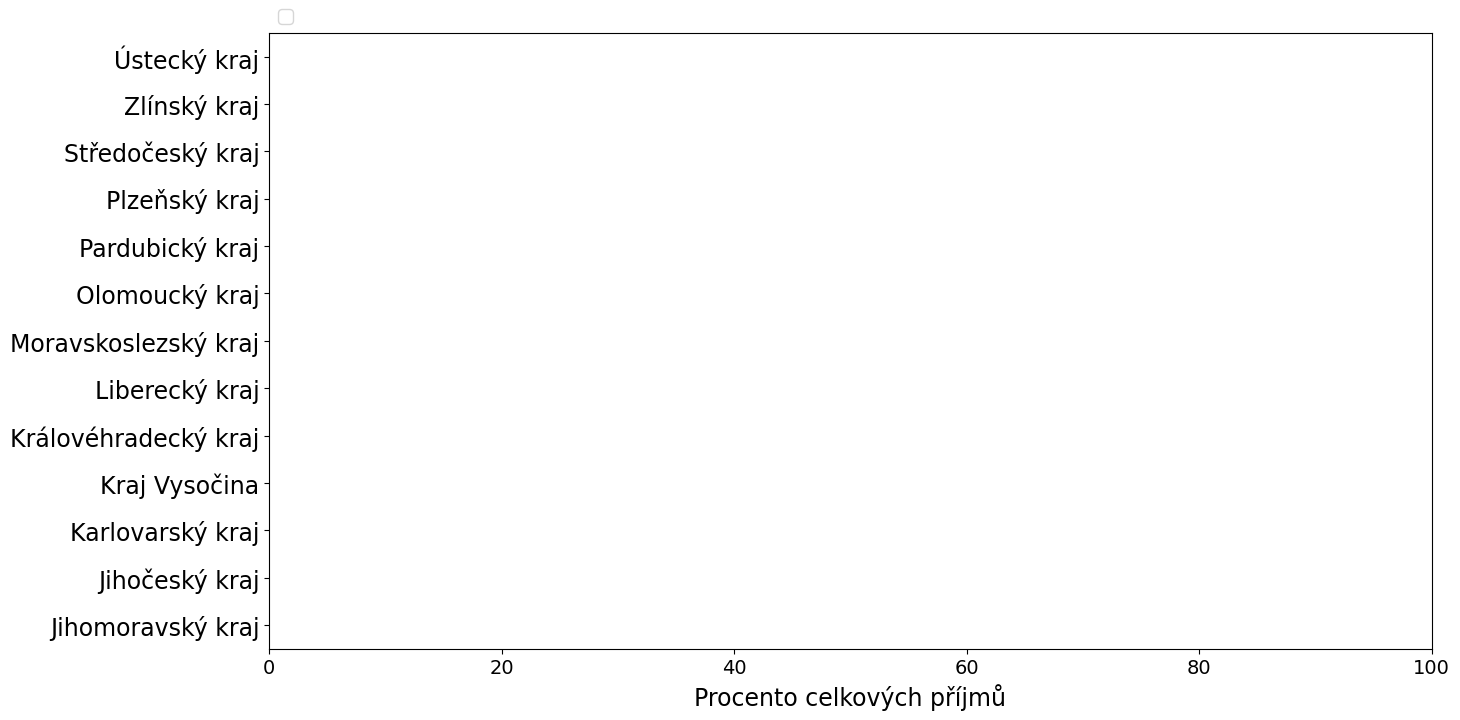

In [ ]:
data=df_graph_vv/df_graph_v.sum(axis=0)*100

fig, ax = plt.subplots(figsize=figsize)
plt.rcParams.update({'font.size': fontsize})
size1=17
size2=19

data_cum=data.cumsum(axis=0)
#category_colors = matplotlib.colormaps['tab10'](np.linspace(0, 0.8, data.shape[0]))
#category_colors=["tab:blue","lightblue","lightgreen","violet"]
labels = data.columns
y=np.arange(len(labels))

i=0
for kap in data.index:
    widths = data.iloc[i, :]
    starts = data_cum.iloc[i, :] - widths
    if kap=="Ostatní": #set manual color
        color="lightgrey"
        
    else:
        True
    rects = ax.barh(y, widths, left=starts,height=0.5,label=trida3_cis[kap])
    try:
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    except: #this happens if we set manual color
        text_color="black"
    
    a=np.round(np.array(data.iloc[i,:]),0).astype(int).astype(str)
    a[a=="0"]=""
    ax.bar_label(rects, label_type='center', color=text_color,labels=a)    
    i+=1
    
ax.set_ylim(top=len(labels)-0.5,bottom=-0.5)
ax.set_xlim(right=100)
ax.set_yticks(y)
ax.set_yticklabels(labels,size=size1)    
ax.legend(ncol=3, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=13.1)
ax.set_xlabel("Procento celkových příjmů",size=size1)
plt.show()

### 2.4. Výdaje kryté transfery

### 2.5. Investiční vs běžné výdaje

# Graf - Celkový RUD (krajský + obecní)

=== PŘÍPRAVA DAT PRO GRAF CELKOVÉHO RUD ===

✅ Krajský RUD načten z graphs/graf_A1.xlsx
   Celkový krajský RUD: 195.05 mld. Kč
   Praha má krajský RUD: 87.43 mld. Kč
✅ Obecní RUD načten z krajska_data
   Celkový obecní RUD: 250.22 mld. Kč

📋 PŘEHLED DAT:
       Krajský RUD  Obecní RUD  Celkový RUD
Kraj                                       
Hla      87.430748   79.544330   166.975078
Stř      15.311446   23.301489    38.612935
Jihoč     9.567716   10.710207    20.277923
Plz       8.057632   12.979549    21.037181
Kar       4.194034    4.832206     9.026240
Úst       9.162319   13.659470    22.821789
Lib       5.203603    7.572099    12.775702
Krá       7.161150    9.138463    16.299612
Par       6.175093    8.690362    14.865455
Kra       8.157535    8.341601    16.499136
Jihom    10.589109   26.714831    37.303939
Olo       7.505157   10.461167    17.966324
Zlí       5.837541    9.500958    15.338499
Mor      10.698134   24.774734    35.472868

✅ Celkový RUD ČR: 445.27 mld. Kč
   - Kr

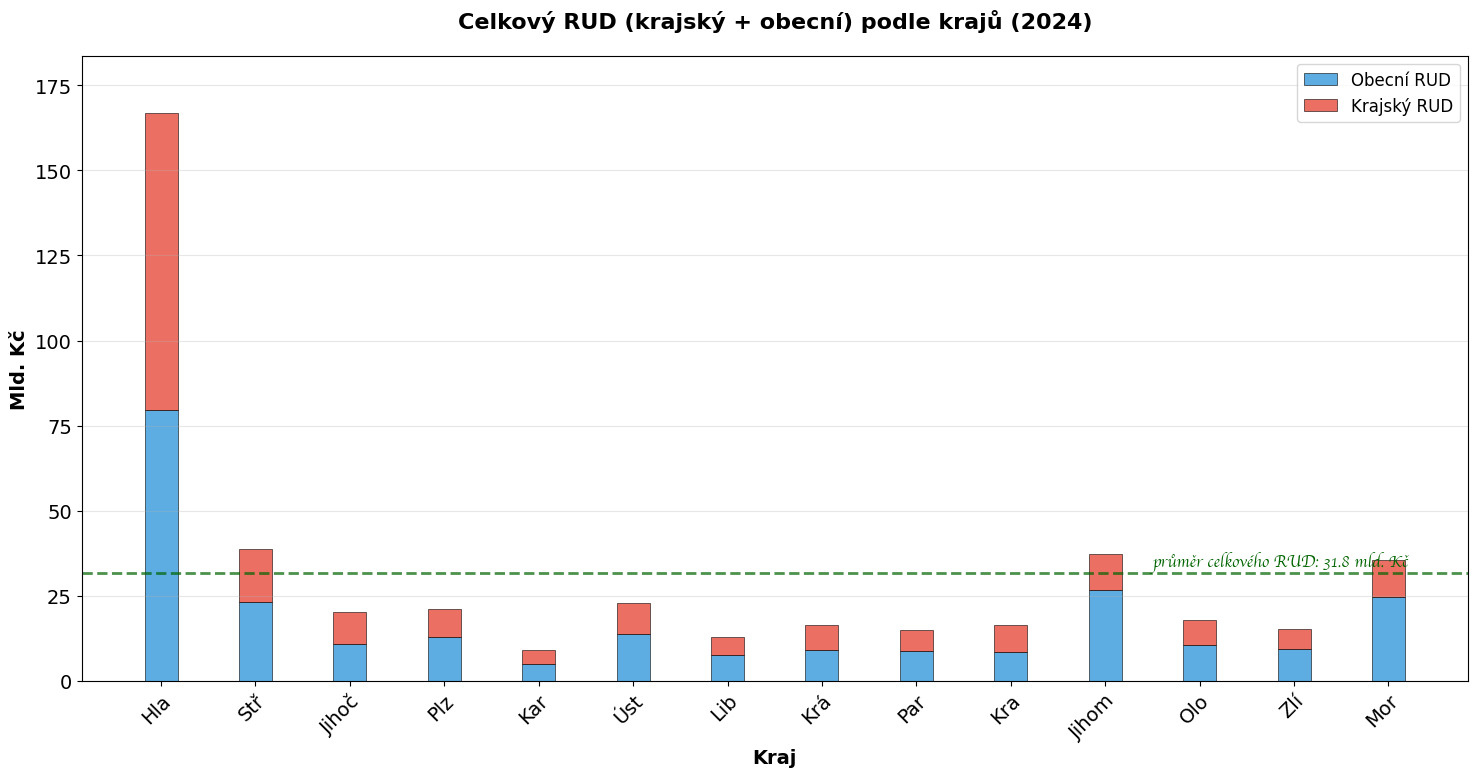

📊 Graf uložen jako: graphs/graf_celkovy_RUD_krajsky_obecni.png
💾 Data uložena do: graphs/graf_celkovy_RUD_krajsky_obecni.xlsx


In [350]:
# GRAF - CELKOVÝ RUD (KRAJSKÝ + OBECNÍ) PODLE KRAJŮ
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("=== PŘÍPRAVA DAT PRO GRAF CELKOVÉHO RUD ===")
print()

# Připravíme data
year = "2024"

# Mapování plných názvů krajů na zkratky
kraje_full_to_short = {
    'Hlavní město Praha': 'Hla',
    'Středočeský kraj': 'Stř',
    'Jihočeský kraj': 'Jihoč',
    'Plzeňský kraj': 'Plz',
    'Karlovarský kraj': 'Kar',
    'Ústecký kraj': 'Úst',
    'Liberecký kraj': 'Lib',
    'Královéhradecký kraj': 'Krá',
    'Pardubický kraj': 'Par',
    'Kraj Vysočina': 'Kra',
    'Jihomoravský kraj': 'Jihom',
    'Olomoucký kraj': 'Olo',
    'Zlínský kraj': 'Zlí',
    'Moravskoslezský kraj': 'Mor'
}

# 1. Krajský RUD - načteme z grafu A1 (který obsahuje i Prahu!)
try:
    df_graf_a1 = pd.read_excel("graphs/graf_A1.xlsx")
    krajsky_rud_data = {}
    for _, row in df_graf_a1.iterrows():
        kraj_full = row['Kraj']
        zkratka = kraje_full_to_short.get(kraj_full, kraj_full)
        krajsky_rud_data[zkratka] = row['Příjmy - RUD']
    
    print(f"✅ Krajský RUD načten z graphs/graf_A1.xlsx")
    print(f"   Celkový krajský RUD: {sum(krajsky_rud_data.values()):.2f} mld. Kč")
    print(f"   Praha má krajský RUD: {krajsky_rud_data.get('Hla', 0):.2f} mld. Kč")
except Exception as e:
    print(f"❌ Chyba při načítání krajského RUD: {e}")
    print("   Zkuste nejdřív spustit buňku, která generuje graf_A1")
    raise

# 2. Obecní RUD - už máme v krajska_data
if 'krajska_data' not in dir():
    print("❌ Proměnná krajska_data není dostupná")
    print("   Spusťte prosím buňky pro načtení obecního RUD")
    raise ValueError("krajska_data není dostupná")

# Vytvoříme DataFrame s obecním RUD podle zkratek krajů
obecni_rud_dict = {}
for _, row in krajska_data.iterrows():
    kraj_full = row['Název kraje']
    zkratka = kraje_full_to_short.get(kraj_full)
    if zkratka:
        # Převedeme na miliardy Kč
        obecni_rud_dict[zkratka] = row['Celkový příjem RUD (Kč)'] / 10**9

print(f"✅ Obecní RUD načten z krajska_data")
print(f"   Celkový obecní RUD: {sum(obecni_rud_dict.values()):.2f} mld. Kč")

# Seznam krajů
kraje = ['Hla', 'Stř', 'Jihoč', 'Plz', 'Kar', 'Úst', 'Lib', 'Krá', 
         'Par', 'Kra', 'Jihom', 'Olo', 'Zlí', 'Mor']

# 3. Vytvoříme DataFrame s daty
data_pro_graf = []
for kraj in kraje:
    krajsky = krajsky_rud_data.get(kraj, 0)
    obecni = obecni_rud_dict.get(kraj, 0)
    data_pro_graf.append({
        'Kraj': kraj,
        'Krajský RUD': krajsky,
        'Obecní RUD': obecni,
        'Celkový RUD': krajsky + obecni
    })

celkovy_rud = pd.DataFrame(data_pro_graf).set_index('Kraj')

print()
print("📋 PŘEHLED DAT:")
print(celkovy_rud)
print()
print(f"✅ Celkový RUD ČR: {celkovy_rud['Celkový RUD'].sum():.2f} mld. Kč")
print(f"   - Krajský: {celkovy_rud['Krajský RUD'].sum():.2f} mld. Kč ({celkovy_rud['Krajský RUD'].sum()/celkovy_rud['Celkový RUD'].sum()*100:.1f}%)")
print(f"   - Obecní: {celkovy_rud['Obecní RUD'].sum():.2f} mld. Kč ({celkovy_rud['Obecní RUD'].sum()/celkovy_rud['Celkový RUD'].sum()*100:.1f}%)")
print()

# 4. Vytvoření grafu
figsize = (15, 8)
fontsize = 14
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=figsize)

barWidth = 0.35
br = np.arange(len(kraje))

# Sloupcový graf - obecní RUD (spodní) a krajský RUD (horní)
ax.bar(br, celkovy_rud.loc[kraje, 'Obecní RUD'], width=barWidth, label='Obecní RUD', color='#3498db', alpha=0.8, edgecolor='black', linewidth=0.5)
ax.bar(br, celkovy_rud.loc[kraje, 'Krajský RUD'], bottom=celkovy_rud.loc[kraje, 'Obecní RUD'], 
       width=barWidth, label='Krajský RUD', color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=0.5)

# Průměrná čára celkového RUD
prumer_celkovy = celkovy_rud['Celkový RUD'].mean()
ax.axhline(y=prumer_celkovy, color='darkgreen', linestyle='--', linewidth=2, alpha=0.7)
ax.text(x=len(kraje)-3.5, y=prumer_celkovy+2, 
        s=f"průměr celkového RUD: {prumer_celkovy:.1f} mld. Kč", 
        color="darkgreen", fontsize=12, fontfamily="cursive")

# Nastavení grafu
ax.set_ylabel("Mld. Kč", fontweight='bold')
ax.set_xlabel("Kraj", fontweight='bold')
ax.set_title(f"Celkový RUD (krajský + obecní) podle krajů ({year})", fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(br, kraje, rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc='upper right', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, max(celkovy_rud['Celkový RUD']) * 1.1)

plt.tight_layout()
plt.savefig("graphs/graf_celkovy_RUD_krajsky_obecni.png", dpi=300, bbox_inches="tight")
plt.show()

# Uložení dat do Excel
df_export = pd.DataFrame({
    'Kraj': kraje,
    'Krajský RUD (mld. Kč)': [celkovy_rud.loc[k, 'Krajský RUD'] for k in kraje],
    'Obecní RUD (mld. Kč)': [celkovy_rud.loc[k, 'Obecní RUD'] for k in kraje],
    'Celkový RUD (mld. Kč)': [celkovy_rud.loc[k, 'Celkový RUD'] for k in kraje],
    'Podíl obecního (%)': [(celkovy_rud.loc[k, 'Obecní RUD'] / celkovy_rud.loc[k, 'Celkový RUD'] * 100) if celkovy_rud.loc[k, 'Celkový RUD'] > 0 else 0 for k in kraje]
})
df_export.to_excel("graphs/graf_celkovy_RUD_krajsky_obecni.xlsx", index=False)

print("📊 Graf uložen jako: graphs/graf_celkovy_RUD_krajsky_obecni.png")
print("💾 Data uložena do: graphs/graf_celkovy_RUD_krajsky_obecni.xlsx")

In [351]:
# TABULKA - PODROBNÁ ANALÝZA CELKOVÉHO RUD
print("=== PODROBNÁ ANALÝZA CELKOVÉHO RUD (KRAJSKÝ + OBECNÍ) ===")
print()
print("CELKOVÝ RUD PODLE KRAJŮ (2024)")
print("="*90)
print(f"{'Kraj':<12} | {'Krajský RUD':<13} | {'Obecní RUD':<13} | {'Celkem RUD':<13} | {'Podíl obecního':<15}")
print(f"{'':12} | {'(mld. Kč)':<13} | {'(mld. Kč)':<13} | {'(mld. Kč)':<13} | {'(%)':<15}")
print("-"*90)

for kraj in kraje:
    # Data v celkovy_rud jsou už v miliardách Kč
    krajsky = celkovy_rud.loc[kraj, 'Krajský RUD']
    obecni = celkovy_rud.loc[kraj, 'Obecní RUD']
    celkem = celkovy_rud.loc[kraj, 'Celkový RUD']
    podil = (celkovy_rud.loc[kraj, 'Obecní RUD'] / celkovy_rud.loc[kraj, 'Celkový RUD']) * 100 if celkem > 0 else 0
    
    print(f"{kraj:<12} | {krajsky:>11.2f} | {obecni:>11.2f} | {celkem:>11.2f} | {podil:>13.1f}")

print("-"*90)
krajsky_sum = celkovy_rud['Krajský RUD'].sum()
obecni_sum = celkovy_rud['Obecní RUD'].sum()
celkem_sum = celkovy_rud['Celkový RUD'].sum()
podil_sum = (celkovy_rud['Obecní RUD'].sum() / celkovy_rud['Celkový RUD'].sum()) * 100

print(f"{'CELKEM ČR':<12} | {krajsky_sum:>11.2f} | {obecni_sum:>11.2f} | {celkem_sum:>11.2f} | {podil_sum:>13.1f}")
print()
print("📊 KLÍČOVÁ ZJIŠTĚNÍ:")
print(f"• Celkový RUD (krajský + obecní): {celkem_sum:.1f} mld. Kč")
print(f"• Z toho krajský RUD: {krajsky_sum:.1f} mld. Kč ({krajsky_sum/celkem_sum*100:.1f}%)")
print(f"• Z toho obecní RUD: {obecni_sum:.1f} mld. Kč ({obecni_sum/celkem_sum*100:.1f}%)")
print(f"• Kraj s nejvyšším celkovým RUD: {celkovy_rud['Celkový RUD'].idxmax()} ({celkovy_rud['Celkový RUD'].max():.1f} mld. Kč)")
print(f"• Kraj s nejnižším celkovým RUD: {celkovy_rud['Celkový RUD'].idxmin()} ({celkovy_rud['Celkový RUD'].min():.1f} mld. Kč)")

=== PODROBNÁ ANALÝZA CELKOVÉHO RUD (KRAJSKÝ + OBECNÍ) ===

CELKOVÝ RUD PODLE KRAJŮ (2024)
Kraj         | Krajský RUD   | Obecní RUD    | Celkem RUD    | Podíl obecního 
             | (mld. Kč)     | (mld. Kč)     | (mld. Kč)     | (%)            
------------------------------------------------------------------------------------------
Hla          |       87.43 |       79.54 |      166.98 |          47.6
Stř          |       15.31 |       23.30 |       38.61 |          60.3
Jihoč        |        9.57 |       10.71 |       20.28 |          52.8
Plz          |        8.06 |       12.98 |       21.04 |          61.7
Kar          |        4.19 |        4.83 |        9.03 |          53.5
Úst          |        9.16 |       13.66 |       22.82 |          59.9
Lib          |        5.20 |        7.57 |       12.78 |          59.3
Krá          |        7.16 |        9.14 |       16.30 |          56.1
Par          |        6.18 |        8.69 |       14.87 |          58.5
Kra          |        

## Graf celkového RUD bez Prahy

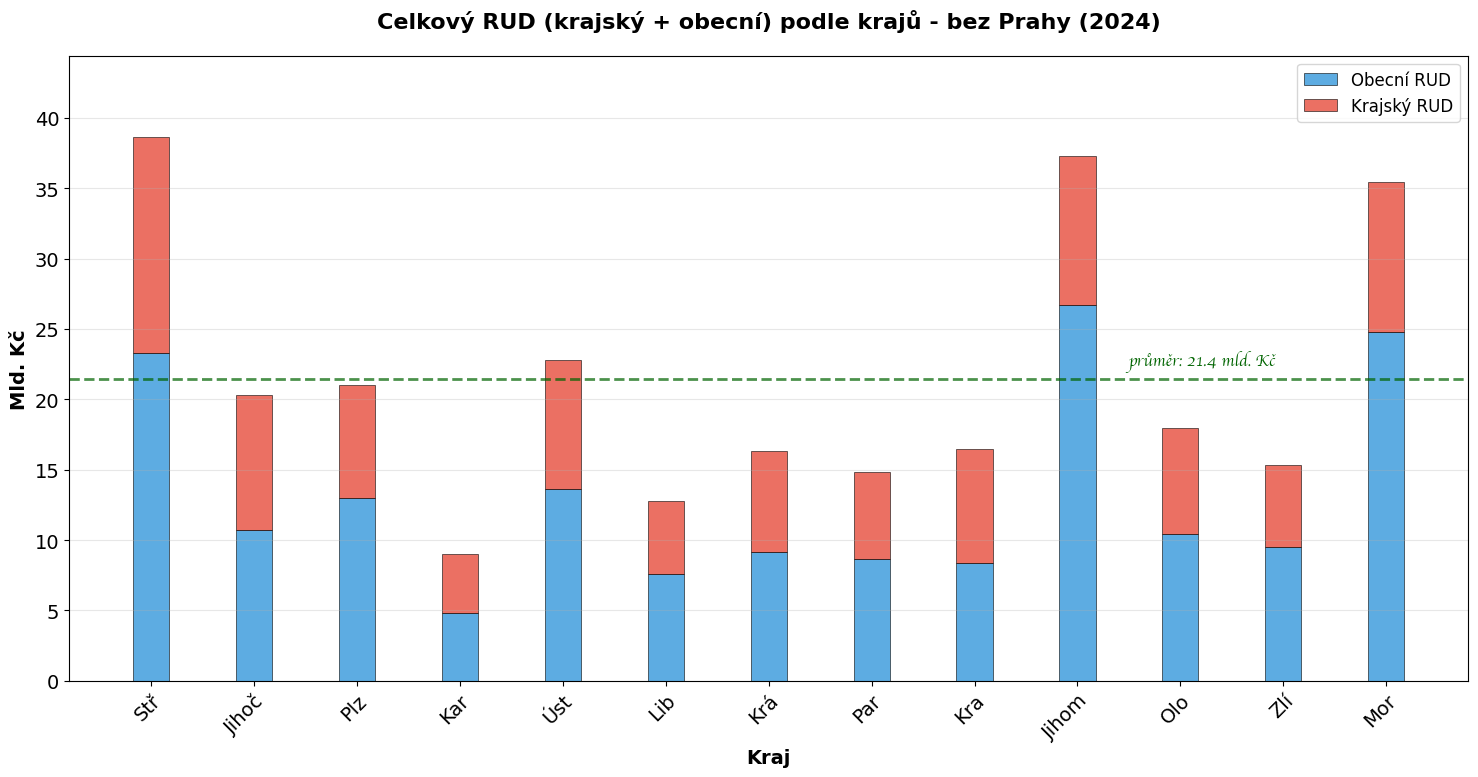


📊 STATISTIKY BEZ PRAHY:
• Celkový RUD (bez Prahy): 278.3 mld. Kč
• Průměr krajů (bez Prahy): 21.4 mld. Kč
• Nejvyšší kraj: Stř (38.6 mld. Kč)
• Nejnižší kraj: Kar (9.0 mld. Kč)
• Poměr nejvyšší/nejnižší: 4.3x

📊 Graf uložen jako: graphs/graf_celkovy_RUD_krajsky_obecni_bez_prahy.png


In [ ]:
# GRAF - CELKOVÝ RUD (KRAJSKÝ + OBECNÍ) BEZ PRAHY
import matplotlib.pyplot as plt
import numpy as np

# Seznam krajů bez Prahy
kraje_bez_prahy = ['Stř', 'Jihoč', 'Plz', 'Kar', 'Úst', 'Lib', 'Krá', 
                   'Par', 'Kra', 'Jihom', 'Olo', 'Zlí', 'Mor']

# Data bez Prahy
celkovy_rud_bez_prahy = celkovy_rud.loc[kraje_bez_prahy]

# Vytvoření grafu
figsize = (15, 8)
fontsize = 14
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=figsize)

barWidth = 0.35
br = np.arange(len(kraje_bez_prahy))

# Sloupcový graf - obecní RUD (spodní) a krajský RUD (horní)
ax.bar(br, celkovy_rud_bez_prahy['Obecní RUD'], width=barWidth, label='Obecní RUD', 
       color='#3498db', alpha=0.8, edgecolor='black', linewidth=0.5)
ax.bar(br, celkovy_rud_bez_prahy['Krajský RUD'], bottom=celkovy_rud_bez_prahy['Obecní RUD'], 
       width=barWidth, label='Krajský RUD', color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=0.5)

# Průměrná čára celkového RUD (bez Prahy)
prumer_celkovy_bez_prahy = celkovy_rud_bez_prahy['Celkový RUD'].mean()
ax.axhline(y=prumer_celkovy_bez_prahy, color='darkgreen', linestyle='--', linewidth=2, alpha=0.7)
ax.text(x=len(kraje_bez_prahy)-3.5, y=prumer_celkovy_bez_prahy+1, 
        s=f"průměr: {prumer_celkovy_bez_prahy:.1f} mld. Kč", 
        color="darkgreen", fontsize=12, fontfamily="cursive")

# Nastavení grafu
ax.set_ylabel("Mld. Kč", fontweight='bold')
ax.set_xlabel("Kraj", fontweight='bold')
ax.set_title(f"Celkový RUD (krajský + obecní) podle krajů - bez Prahy (2024)", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(br, kraje_bez_prahy, rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc='upper right', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, max(celkovy_rud_bez_prahy['Celkový RUD']) * 1.15)

plt.tight_layout()
plt.savefig("graphs/graf_celkovy_RUD_krajsky_obecni_bez_prahy.png", dpi=300, bbox_inches="tight")
plt.show()

# Statistiky bez Prahy
print()
print("📊 STATISTIKY BEZ PRAHY:")
print(f"• Celkový RUD (bez Prahy): {celkovy_rud_bez_prahy['Celkový RUD'].sum():.1f} mld. Kč")
print(f"• Průměr krajů (bez Prahy): {prumer_celkovy_bez_prahy:.1f} mld. Kč")
print(f"• Nejvyšší kraj: {celkovy_rud_bez_prahy['Celkový RUD'].idxmax()} ({celkovy_rud_bez_prahy['Celkový RUD'].max():.1f} mld. Kč)")
print(f"• Nejnižší kraj: {celkovy_rud_bez_prahy['Celkový RUD'].idxmin()} ({celkovy_rud_bez_prahy['Celkový RUD'].min():.1f} mld. Kč)")
print(f"• Poměr nejvyšší/nejnižší: {celkovy_rud_bez_prahy['Celkový RUD'].max() / celkovy_rud_bez_prahy['Celkový RUD'].min():.1f}x")
print()
print(f"📊 Graf uložen jako: graphs/graf_celkovy_RUD_krajsky_obecni_bez_prahy.png")

## Komplexní analýza RUD na obyvatele - s rozkladem

In [356]:
# KOMPLEXNÍ TABULKA - RUD NA OBYVATELE S ROZKLADEM
import pandas as pd

print("="*120)
print("KOMPLEXNÍ ANALÝZA RUD NA OBYVATELE PODLE KRAJŮ (2024)")
print("="*120)
print()

# Načteme data krajského RUD z graf_A1
df_graf_a1 = pd.read_excel("graphs/graf_A1.xlsx")

# Vytvoříme komplexní tabulku
komplexni_analyza = pd.DataFrame()

# Mapování krajů
kraje_full_to_short = {
    'Hlavní město Praha': 'Hla',
    'Středočeský kraj': 'Stř',
    'Jihočeský kraj': 'Jihoč',
    'Plzeňský kraj': 'Plz',
    'Karlovarský kraj': 'Kar',
    'Ústecký kraj': 'Úst',
    'Liberecký kraj': 'Lib',
    'Královéhradecký kraj': 'Krá',
    'Pardubický kraj': 'Par',
    'Kraj Vysočina': 'Kra',
    'Jihomoravský kraj': 'Jihom',
    'Olomoucký kraj': 'Olo',
    'Zlínský kraj': 'Zlí',
    'Moravskoslezský kraj': 'Mor'
}

# Seznam krajů v pořadí
kraje_poradi = ['Hla', 'Stř', 'Jihoč', 'Plz', 'Kar', 'Úst', 'Lib', 'Krá', 
                'Par', 'Kra', 'Jihom', 'Olo', 'Zlí', 'Mor']

# Připravíme data
data_analyza = []

for zkratka in kraje_poradi:
    # Najdeme plný název kraje
    kraj_full = [k for k, v in kraje_full_to_short.items() if v == zkratka][0]
    
    # Krajský RUD z graf_A1 (obsahuje všechny kraje včetně Prahy)
    krajsky_rud_row = df_graf_a1[df_graf_a1['Kraj'] == kraj_full]
    krajsky_rud = krajsky_rud_row['Příjmy - RUD'].values[0] * 10**9 if len(krajsky_rud_row) > 0 else 0  # převod na Kč
    
    # Obecní RUD z krajská_data
    obecni_rud_row = krajska_data[krajska_data['Název kraje'] == kraj_full]
    obecni_rud = obecni_rud_row['Celkový příjem RUD (Kč)'].values[0] if len(obecni_rud_row) > 0 else 0
    
    # Celkový RUD
    celkovy_rud_kraj = krajsky_rud + obecni_rud
    
    # Počet obyvatel
    pocet_obyvatel = obecni_rud_row['Počet obyvatel 2024'].values[0] if len(obecni_rud_row) > 0 else 0
    
    # RUD na obyvatele
    krajsky_rud_na_obyv = krajsky_rud / pocet_obyvatel if pocet_obyvatel > 0 else 0
    obecni_rud_na_obyv = obecni_rud / pocet_obyvatel if pocet_obyvatel > 0 else 0
    celkovy_rud_na_obyv = celkovy_rud_kraj / pocet_obyvatel if pocet_obyvatel > 0 else 0
    
    data_analyza.append({
        'Kraj': kraj_full,
        'Zkratka': zkratka,
        'Krajský RUD (mld. Kč)': krajsky_rud / 10**9,
        'Obecní RUD (mld. Kč)': obecni_rud / 10**9,
        'Celkový RUD (mld. Kč)': celkovy_rud_kraj / 10**9,
        'Počet obyvatel': int(pocet_obyvatel),
        'Krajský RUD/obyv. (Kč)': krajsky_rud_na_obyv,
        'Obecní RUD/obyv. (Kč)': obecni_rud_na_obyv,
        'Celkový RUD/obyv. (Kč)': celkovy_rud_na_obyv
    })

komplexni_analyza = pd.DataFrame(data_analyza)

# Seřadíme podle celkového RUD na obyvatele (sestupně)
komplexni_analyza_serazene = komplexni_analyza.sort_values('Celkový RUD/obyv. (Kč)', ascending=False)

# Zobrazení tabulky
print(f"{'Por.':<4} | {'Kraj':<25} | {'Krajský':<10} | {'Obecní':<10} | {'Celkem':<10} | {'Obyvatel':<11} | {'Kraj/ob.':<9} | {'Obecní/ob.':<11} | {'Celkem/ob.':<11}")
print(f"{'':4} | {'':25} | {'RUD (mld)':<10} | {'RUD (mld)':<10} | {'RUD (mld)':<10} | {'(počet)':<11} | {'(Kč)':<9} | {'(Kč)':<11} | {'(Kč)':<11}")
print("-"*120)

for i, (_, row) in enumerate(komplexni_analyza_serazene.iterrows(), 1):
    print(f"{i:>3}. | {row['Kraj']:<25} | {row['Krajský RUD (mld. Kč)']:>8.2f} | {row['Obecní RUD (mld. Kč)']:>8.2f} | "
          f"{row['Celkový RUD (mld. Kč)']:>8.2f} | {row['Počet obyvatel']:>10,} | "
          f"{row['Krajský RUD/obyv. (Kč)']:>8.0f} | {row['Obecní RUD/obyv. (Kč)']:>10.0f} | "
          f"{row['Celkový RUD/obyv. (Kč)']:>10.0f}")

print("-"*120)

# Součty a průměry
celkem_krajsky = komplexni_analyza['Krajský RUD (mld. Kč)'].sum()
celkem_obecni = komplexni_analyza['Obecní RUD (mld. Kč)'].sum()
celkem_rud = komplexni_analyza['Celkový RUD (mld. Kč)'].sum()
celkem_obyvatel = komplexni_analyza['Počet obyvatel'].sum()

prumer_krajsky = celkem_krajsky * 10**9 / celkem_obyvatel
prumer_obecni = celkem_obecni * 10**9 / celkem_obyvatel
prumer_celkem = celkem_rud * 10**9 / celkem_obyvatel

print(f"{'':5} {'CELKEM / PRŮMĚR ČR':<25} | {celkem_krajsky:>8.2f} | {celkem_obecni:>8.2f} | "
      f"{celkem_rud:>8.2f} | {celkem_obyvatel:>10,} | "
      f"{prumer_krajsky:>8.0f} | {prumer_obecni:>10.0f} | {prumer_celkem:>10.0f}")

print()
print("="*120)
print("📊 KLÍČOVÉ POZNATKY:")
print(f"• Celkový RUD ČR: {celkem_rud:.1f} mld. Kč (krajský: {celkem_krajsky:.1f} mld. Kč, obecní: {celkem_obecni:.1f} mld. Kč)")
print(f"• Průměrný RUD na obyvatele ČR: {prumer_celkem:,.0f} Kč (krajský: {prumer_krajsky:,.0f} Kč, obecní: {prumer_obecni:,.0f} Kč)")
print(f"• Nejvyšší celkový RUD/obyv.: {komplexni_analyza_serazene.iloc[0]['Kraj']} ({komplexni_analyza_serazene.iloc[0]['Celkový RUD/obyv. (Kč)']:,.0f} Kč)")
print(f"• Nejnižší celkový RUD/obyv.: {komplexni_analyza_serazene.iloc[-1]['Kraj']} ({komplexni_analyza_serazene.iloc[-1]['Celkový RUD/obyv. (Kč)']:,.0f} Kč)")
print(f"• Poměr nejvyšší/nejnižší: {komplexni_analyza_serazene.iloc[0]['Celkový RUD/obyv. (Kč)'] / komplexni_analyza_serazene.iloc[-1]['Celkový RUD/obyv. (Kč)']:.2f}x")

# Uložení do Excelu
komplexni_analyza_serazene.to_excel('graphs/RUD_komplexni_analyza_2024.xlsx', index=False)
print()
print("💾 Tabulka uložena: graphs/RUD_komplexni_analyza_2024.xlsx")

KOMPLEXNÍ ANALÝZA RUD NA OBYVATELE PODLE KRAJŮ (2024)

Por. | Kraj                      | Krajský    | Obecní     | Celkem     | Obyvatel    | Kraj/ob.  | Obecní/ob.  | Celkem/ob. 
     |                           | RUD (mld)  | RUD (mld)  | RUD (mld)  | (počet)     | (Kč)      | (Kč)        | (Kč)       
------------------------------------------------------------------------------------------------------------------------
  1. | Hlavní město Praha        |    87.43 |    79.54 |   166.98 |  1,387,354 |    63020 |      57335 |     120355
  2. | Plzeňský kraj             |     8.06 |    12.98 |    21.04 |    611,601 |    13175 |      21222 |      34397
  3. | Kraj Vysočina             |     8.16 |     8.34 |    16.50 |    516,973 |    15779 |      16135 |      31915
  4. | Jihočeský kraj            |     9.57 |    10.71 |    20.28 |    653,120 |    14649 |      16399 |      31048
  5. | Karlovarský kraj          |     4.19 |     4.83 |     9.03 |    293,279 |    14300 |      16476 |    

## Graf - RUD na obyvatele (krajský + obecní)

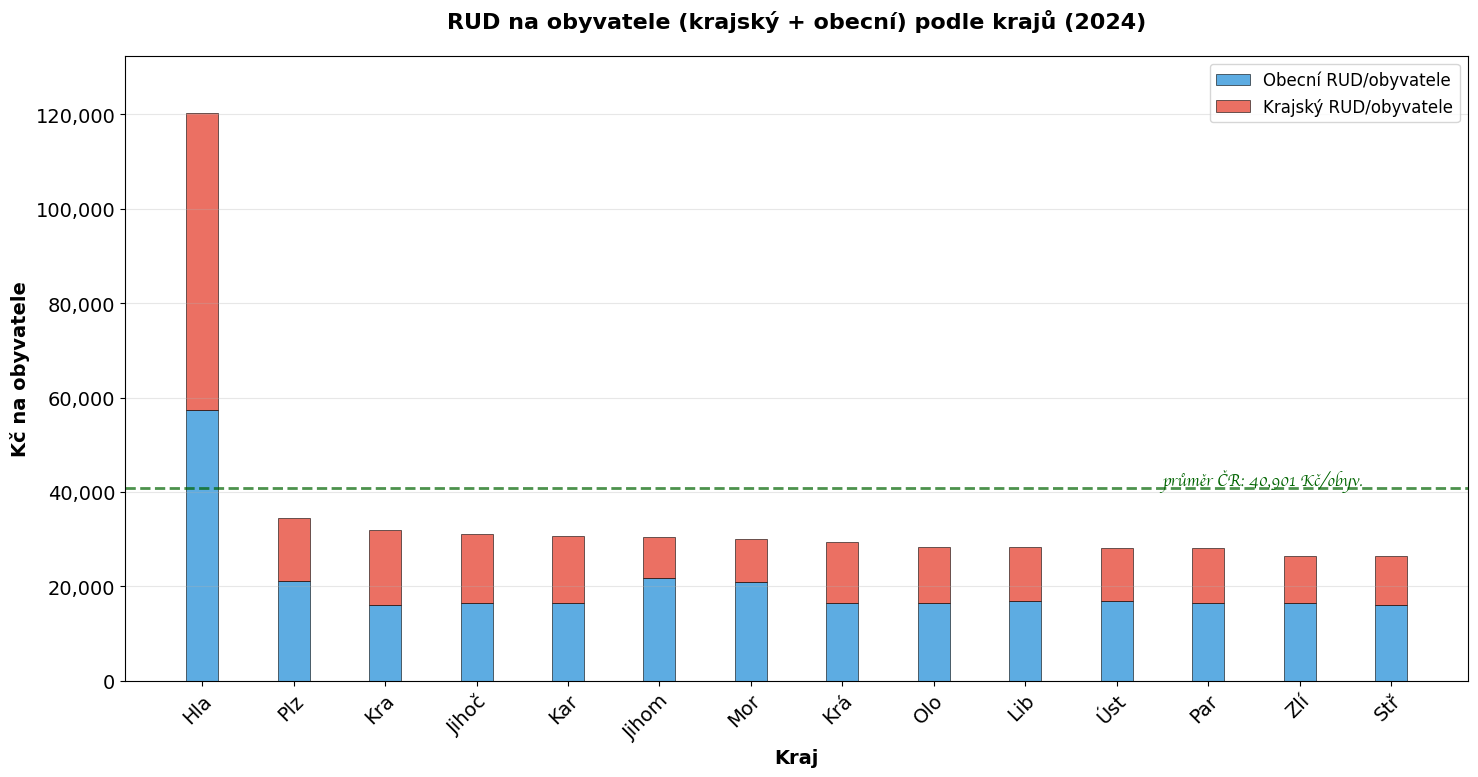


📊 STATISTIKY RUD NA OBYVATELE:
• Průměr ČR: 40,901 Kč/obyvatele (krajský: 17,917 Kč, obecní: 22,984 Kč)
• Nejvyšší: Hlavní město Praha - 120,355 Kč/obyvatele
• Nejnižší: Středočeský kraj - 26,454 Kč/obyvatele
• Rozdíl nejvyšší/nejnižší: 4.55x

📊 Graf uložen jako: graphs/graf_RUD_na_obyvatele_krajsky_obecni.png


In [357]:
# GRAF - RUD NA OBYVATELE (KRAJSKÝ + OBECNÍ) PODLE KRAJŮ
import matplotlib.pyplot as plt
import numpy as np

# Seřadíme podle celkového RUD na obyvatele
komplexni_analyza_graf = komplexni_analyza_serazene.copy()

# Vytvoření grafu
figsize = (15, 8)
fontsize = 14
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=figsize)

# Data pro graf
kraje_names = komplexni_analyza_graf['Zkratka'].values
krajsky_na_obyv = komplexni_analyza_graf['Krajský RUD/obyv. (Kč)'].values
obecni_na_obyv = komplexni_analyza_graf['Obecní RUD/obyv. (Kč)'].values
celkovy_na_obyv = komplexni_analyza_graf['Celkový RUD/obyv. (Kč)'].values

barWidth = 0.35
br = np.arange(len(kraje_names))

# Sloupcový graf - obecní RUD na obyvatele (spodní) a krajský RUD na obyvatele (horní)
ax.bar(br, obecni_na_obyv, width=barWidth, label='Obecní RUD/obyvatele', 
       color='#3498db', alpha=0.8, edgecolor='black', linewidth=0.5)
ax.bar(br, krajsky_na_obyv, bottom=obecni_na_obyv, 
       width=barWidth, label='Krajský RUD/obyvatele', 
       color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=0.5)

# Průměrná čára
ax.axhline(y=prumer_celkem, color='darkgreen', linestyle='--', linewidth=2, alpha=0.7)
ax.text(x=len(kraje_names)-3.5, y=prumer_celkem+500, 
        s=f"průměr ČR: {prumer_celkem:,.0f} Kč/obyv.", 
        color="darkgreen", fontsize=12, fontfamily="cursive")

# Nastavení grafu
ax.set_ylabel("Kč na obyvatele", fontweight='bold')
ax.set_xlabel("Kraj", fontweight='bold')
ax.set_title(f"RUD na obyvatele (krajský + obecní) podle krajů (2024)", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(br, kraje_names, rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc='upper right', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, max(celkovy_na_obyv) * 1.1)

# Formátování y-osy
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.savefig("graphs/graf_RUD_na_obyvatele_krajsky_obecni.png", dpi=300, bbox_inches="tight")
plt.show()

print()
print("📊 STATISTIKY RUD NA OBYVATELE:")
print(f"• Průměr ČR: {prumer_celkem:,.0f} Kč/obyvatele (krajský: {prumer_krajsky:,.0f} Kč, obecní: {prumer_obecni:,.0f} Kč)")
print(f"• Nejvyšší: {komplexni_analyza_graf.iloc[0]['Kraj']} - {komplexni_analyza_graf.iloc[0]['Celkový RUD/obyv. (Kč)']:,.0f} Kč/obyvatele")
print(f"• Nejnižší: {komplexni_analyza_graf.iloc[-1]['Kraj']} - {komplexni_analyza_graf.iloc[-1]['Celkový RUD/obyv. (Kč)']:,.0f} Kč/obyvatele")
print(f"• Rozdíl nejvyšší/nejnižší: {komplexni_analyza_graf.iloc[0]['Celkový RUD/obyv. (Kč)'] / komplexni_analyza_graf.iloc[-1]['Celkový RUD/obyv. (Kč)']:.2f}x")
print()
print("📊 Graf uložen jako: graphs/graf_RUD_na_obyvatele_krajsky_obecni.png")

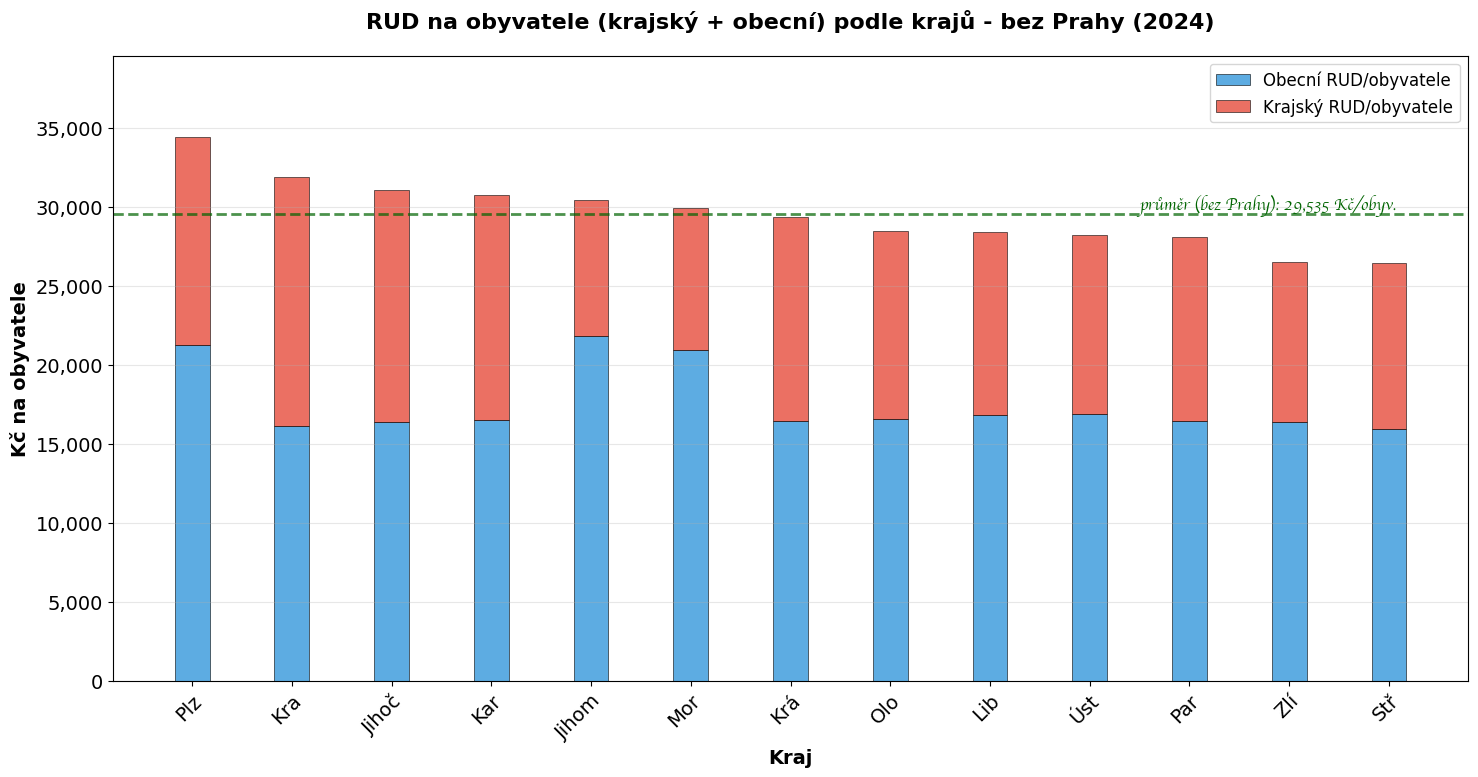


📊 STATISTIKY RUD NA OBYVATELE (BEZ PRAHY):
• Průměr krajů: 29,535 Kč/obyvatele
• Nejvyšší: Plzeňský kraj - 34,397 Kč/obyvatele
• Nejnižší: Středočeský kraj - 26,454 Kč/obyvatele
• Rozdíl nejvyšší/nejnižší: 1.30x

📊 Graf uložen jako: graphs/graf_RUD_na_obyvatele_krajsky_obecni_bez_prahy.png


In [358]:
# GRAF - RUD NA OBYVATELE (KRAJSKÝ + OBECNÍ) BEZ PRAHY
import matplotlib.pyplot as plt
import numpy as np

# Data bez Prahy
komplexni_analyza_bez_prahy = komplexni_analyza_serazene[komplexni_analyza_serazene['Zkratka'] != 'Hla'].copy()

# Vytvoření grafu
figsize = (15, 8)
fontsize = 14
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(figsize=figsize)

# Data pro graf
kraje_names_bez_prahy = komplexni_analyza_bez_prahy['Zkratka'].values
krajsky_na_obyv_bez_prahy = komplexni_analyza_bez_prahy['Krajský RUD/obyv. (Kč)'].values
obecni_na_obyv_bez_prahy = komplexni_analyza_bez_prahy['Obecní RUD/obyv. (Kč)'].values
celkovy_na_obyv_bez_prahy = komplexni_analyza_bez_prahy['Celkový RUD/obyv. (Kč)'].values

barWidth = 0.35
br = np.arange(len(kraje_names_bez_prahy))

# Sloupcový graf - obecní RUD na obyvatele (spodní) a krajský RUD na obyvatele (horní)
ax.bar(br, obecni_na_obyv_bez_prahy, width=barWidth, label='Obecní RUD/obyvatele', 
       color='#3498db', alpha=0.8, edgecolor='black', linewidth=0.5)
ax.bar(br, krajsky_na_obyv_bez_prahy, bottom=obecni_na_obyv_bez_prahy, 
       width=barWidth, label='Krajský RUD/obyvatele', 
       color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=0.5)

# Průměrná čára pro kraje bez Prahy
prumer_bez_prahy = celkovy_na_obyv_bez_prahy.mean()
ax.axhline(y=prumer_bez_prahy, color='darkgreen', linestyle='--', linewidth=2, alpha=0.7)
ax.text(x=len(kraje_names_bez_prahy)-3.5, y=prumer_bez_prahy+300, 
        s=f"průměr (bez Prahy): {prumer_bez_prahy:,.0f} Kč/obyv.", 
        color="darkgreen", fontsize=12, fontfamily="cursive")

# Nastavení grafu
ax.set_ylabel("Kč na obyvatele", fontweight='bold')
ax.set_xlabel("Kraj", fontweight='bold')
ax.set_title(f"RUD na obyvatele (krajský + obecní) podle krajů - bez Prahy (2024)", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(br, kraje_names_bez_prahy, rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc='upper right', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, max(celkovy_na_obyv_bez_prahy) * 1.15)

# Formátování y-osy
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.savefig("graphs/graf_RUD_na_obyvatele_krajsky_obecni_bez_prahy.png", dpi=300, bbox_inches="tight")
plt.show()

print()
print("📊 STATISTIKY RUD NA OBYVATELE (BEZ PRAHY):")
print(f"• Průměr krajů: {prumer_bez_prahy:,.0f} Kč/obyvatele")
print(f"• Nejvyšší: {komplexni_analyza_bez_prahy.iloc[0]['Kraj']} - {komplexni_analyza_bez_prahy.iloc[0]['Celkový RUD/obyv. (Kč)']:,.0f} Kč/obyvatele")
print(f"• Nejnižší: {komplexni_analyza_bez_prahy.iloc[-1]['Kraj']} - {komplexni_analyza_bez_prahy.iloc[-1]['Celkový RUD/obyv. (Kč)']:,.0f} Kč/obyvatele")
print(f"• Rozdíl nejvyšší/nejnižší: {komplexni_analyza_bez_prahy.iloc[0]['Celkový RUD/obyv. (Kč)'] / komplexni_analyza_bez_prahy.iloc[-1]['Celkový RUD/obyv. (Kč)']:.2f}x")
print()
print("📊 Graf uložen jako: graphs/graf_RUD_na_obyvatele_krajsky_obecni_bez_prahy.png")